# 기본 설정

## 기본 설정

# 1. 더본코리아 매장 정보 크롤링

# 2. 매장의 경도, 위도 크롤링

# 3. 지도시각화
 - 한신포차, 홍콩반점, 돌비개집, 리춘시장, 롤링파스타 분포 비교
 - 한신포차
 - 홍콩반점
 - 돌배기집
 
# 4. 부동산 정보 크롤링
 - 3지역 크롤링 concat 하고 지역 인구정보 없는 애들 다시 천천히 크롤링하기
 
# 5. 대학 위치 크롤링

# 6. 모든 excel 파일 전부 합치기

# 7. 이제 본격적으로 전처리

# 8. Clustering 하기
 - 1st Clustering
 - 2nd Clustering
 - 각 클러스터별 column 특징

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
from tqdm import tqdm
import json
from zeep import Client
import folium
from selenium import webdriver

import dateutil
from dateutil.parser import parse
import datetime

import os

import sqlite3

import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  #%matplotlib 뒤에 써주면 그래프를 더 높은 해상도로 보여줌

pd.set_option('display.max_columns', 500)    # 보이는 column 개수 정하기
pd.set_option('display.max_rows', 500)    # 보이는 row 개수 정하기

# 1. 더본코리아 매장 정보 크롤링

In [2]:
path = r"C:\현우에 의한, 현우를 위한, 현우의\폴더명 추천 받음\공부공부공부공부\대학 이후\대학 관련\연세대학교\학회 관련\Ybigta\We are Team Design\미니 컨퍼런스\chromedriver.exe"

In [3]:
driver = webdriver.Chrome(path)

In [4]:
# 더본코리아 매장정보 페이지 들어가기
driver.get('http://www.theborn.co.kr/store/domestic-store/')

In [130]:
storelists = driver.find_elements_by_css_selector('.map_body > div')

In [131]:
storelists

[<selenium.webdriver.remote.webelement.WebElement (session="f8c1cdc9fc01821c9e2059ec3520caa3", element="faeffa72-3b8d-4bde-a669-704691c9adc5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f8c1cdc9fc01821c9e2059ec3520caa3", element="d4e5fdfb-d70b-4f4a-89a9-a86f0e60c54d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f8c1cdc9fc01821c9e2059ec3520caa3", element="6c4cc682-0765-40c2-ac9d-0413b1e419c0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f8c1cdc9fc01821c9e2059ec3520caa3", element="9246a412-7f6b-4bbc-8738-bc34a91630b2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f8c1cdc9fc01821c9e2059ec3520caa3", element="afde47d3-18f4-4cb8-9f26-6f0f598f30e9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f8c1cdc9fc01821c9e2059ec3520caa3", element="f4c5fbbd-519d-4bc5-aee8-8b9049779545")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f8c1cdc9fc01821c9e2059ec3520caa3", element="2970fcb2-9eda-47d8-8657-00

In [132]:
storelists[0].find_element_by_css_selector('ul.map_more2').text

'빽다방 전라남도 순천대점 전남 순천시 삼산2길 33 061-754-9286 자세히보기'

In [ ]:
storelists = driver.find_elements_by_css_selector('.map_body > div')
brand = []
region = []
store_name = []
addr= []
colnames = ['브랜드','지역','매장명', '주소', '주소+']

for div in tqdm(storelists):
    temp = div.find_element_by_css_selector('ul.map_more2').text.split()
    brand.append(temp[0])
    region.append(temp[1])
    store_name.append(temp[2])
    addr.append((' '.join(temp[3:-2])))
    
driver.find_element_by_xpath('//*[@id="pagination"]/li[6]').click()
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')

for div in tqdm(storelists):
    temp = div.find_element_by_css_selector('ul.map_more2').text.split()
    brand.append(temp[0])
    region.append(temp[1])
    store_name.append(temp[2])
    addr.append((' '.join(temp[3:-2])))

driver.find_element_by_xpath('//*[@id="pagination"]/li[7]').click()
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')


for i in tqdm(range(142)):
    for div in storelists:
        temp = div.find_element_by_css_selector('ul.map_more2').text.split()
        brand.append(temp[0])
        region.append(temp[1])
        store_name.append(temp[2])
        addr.append((' '.join(temp[3:-2])))
    driver.find_element_by_xpath('//*[@id="pagination"]/li[8]').click()
    time.sleep(3)
    storelists = driver.find_elements_by_css_selector('.map_body > div')
    time.sleep(3)
    storelists = driver.find_elements_by_css_selector('.map_body > div')
    time.sleep(3)

time.sleep(3)

for div in tqdm(storelists):
    temp = div.find_element_by_css_selector('ul.map_more2').text.split()
    brand.append(temp[0])
    region.append(temp[1])
    store_name.append(temp[2])
    addr.append((' '.join(temp[3:-2])))


In [122]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [124]:
store_list_DF = pd.DataFrame([brand,region,addr,store_name]).T
store_list_DF.columns = colnames
store_list_DF

,브랜드,지역,매장명,주소
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점
...,...,...,...,...
1105,돌배기집,경기도,경기도 고양시 일산서구 일현로 37,일산탄현역점
1106,돌배기집,대전광역시,"대전시 서구 둔산중로46번길 30, 1층",대전시청점
1107,돌배기집,경기도,"경기도 평택시 관광특구로 11, 1층",평택송탄출장소점
1108,돌배기집,경기도,"경기도 부천시 부천로23번길 17, 1층",부천역점


In [125]:
store_list_DF.to_csv('1차 크롤링.csv', index=False)

In [126]:
df = pd.read_csv('1차 크롤링.csv')

In [127]:
df.head()

,브랜드,지역,매장명,주소
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점


In [133]:
storelists = driver.find_elements_by_css_selector('.map_body > div')
brand = []
region = []
store_name = []
addr= []
addr_etc = []
colnames = ['브랜드','지역','매장명', '주소', '주소+']

for div in tqdm(storelists):
    temp = div.find_element_by_css_selector('ul.map_more2').text.split()
    brand.append(temp[0])
    region.append(temp[1])
    store_name.append(temp[2])
    addr.append((' '.join(temp[3:-2])))
    addr_etc.append((' '.join(temp[3:])))
    
driver.find_element_by_xpath('//*[@id="pagination"]/li[6]').click()
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')

for div in tqdm(storelists):
    temp = div.find_element_by_css_selector('ul.map_more2').text.split()
    brand.append(temp[0])
    region.append(temp[1])
    store_name.append(temp[2])
    addr.append((' '.join(temp[3:-2])))
    addr_etc.append((' '.join(temp[3:])))

driver.find_element_by_xpath('//*[@id="pagination"]/li[7]').click()
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')
time.sleep(3)
storelists = driver.find_elements_by_css_selector('.map_body > div')


for i in tqdm(range(142)):
    for div in storelists:
        temp = div.find_element_by_css_selector('ul.map_more2').text.split()
        brand.append(temp[0])
        region.append(temp[1])
        store_name.append(temp[2])
        addr.append((' '.join(temp[3:-2])))
        addr_etc.append((' '.join(temp[3:])))
    driver.find_element_by_xpath('//*[@id="pagination"]/li[8]').click()
    time.sleep(3)
    storelists = driver.find_elements_by_css_selector('.map_body > div')
    time.sleep(3)
    storelists = driver.find_elements_by_css_selector('.map_body > div')
    time.sleep(3)

time.sleep(3)

for div in tqdm(storelists):
    temp = div.find_element_by_css_selector('ul.map_more2').text.split()
    brand.append(temp[0])
    region.append(temp[1])
    store_name.append(temp[2])
    addr.append((' '.join(temp[3:-2])))
    addr_etc.append((' '.join(temp[3:])))


 87%|█████████████████████████████████████████████████████████████████████▎          | 123/142 [19:47<03:03,  9.67s/it]


 99%|███████████████████████████████████████████████████████████████████████████████▍| 141/142 [22:41<00:09,  9.68s/it]

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="pagination"]/li[8]"}
  (Session info: chrome=77.0.3865.90)


In [136]:
store_list_DF = pd.DataFrame([brand,region, store_name, addr, addr_etc]).T
store_list_DF.columns = colnames
store_list_DF

,브랜드,지역,매장명,주소,주소+
0,빽다방,전라남도,순천대점,전남 순천시 삼산2길 33,전남 순천시 삼산2길 33 061-754-9286 자세히보기
1,백스비어,부산광역시,부산하단역점,부산 사하구 하단동 527-23,부산 사하구 하단동 527-23 051-206-8311 자세히보기
2,롤링파스타,경기도,안산중앙점,경기도 안산시 단원구 예술대학로 17 안산노블레스 (2층),경기도 안산시 단원구 예술대학로 17 안산노블레스 (2층) 031-410-6392 ...
3,롤링파스타,서울특별시,건대지점,"서울특별시 광진구 능동로 127, 2층","서울특별시 광진구 능동로 127, 2층 02-3443-3864 자세히보기"
4,역전우동0410,대전광역시,대전터미널점,대전 동구 동서대로 1689 복합터미널 1층 (서관),대전 동구 동서대로 1689 복합터미널 1층 (서관) 042-633-0410 자세히보기
...,...,...,...,...,...
1435,돌배기집,경기도,일산탄현역점,경기도 고양시 일산서구 일현로 37,경기도 고양시 일산서구 일현로 37 031-923-9092 자세히보기
1436,돌배기집,대전광역시,대전시청점,"대전시 서구 둔산중로46번길 30, 1층","대전시 서구 둔산중로46번길 30, 1층 042-477-7558 자세히보기"
1437,돌배기집,경기도,평택송탄출장소점,"경기도 평택시 관광특구로 11, 1층","경기도 평택시 관광특구로 11, 1층 031-611-5595 자세히보기"
1438,돌배기집,경기도,부천역점,"경기도 부천시 부천로23번길 17, 1층","경기도 부천시 부천로23번길 17, 1층 032-663-5777 자세히보기"


In [137]:
store_list_DF.to_csv('2차 크롤링.csv', index=False)

In [138]:
df = pd.read_csv('2차 크롤링.csv')

In [140]:
df.head(50)

,브랜드,지역,매장명,주소,주소+
0,빽다방,전라남도,순천대점,전남 순천시 삼산2길 33,전남 순천시 삼산2길 33 061-754-9286 자세히보기
1,백스비어,부산광역시,부산하단역점,부산 사하구 하단동 527-23,부산 사하구 하단동 527-23 051-206-8311 자세히보기
2,롤링파스타,경기도,안산중앙점,경기도 안산시 단원구 예술대학로 17 안산노블레스 (2층),경기도 안산시 단원구 예술대학로 17 안산노블레스 (2층) 031-410-6392 ...
3,롤링파스타,서울특별시,건대지점,"서울특별시 광진구 능동로 127, 2층","서울특별시 광진구 능동로 127, 2층 02-3443-3864 자세히보기"
4,역전우동0410,대전광역시,대전터미널점,대전 동구 동서대로 1689 복합터미널 1층 (서관),대전 동구 동서대로 1689 복합터미널 1층 (서관) 042-633-0410 자세히보기
5,본가,서울특별시,논현지점,서울특별시 강남구 강남대로 494 (논현동 165-7 1층),서울특별시 강남구 강남대로 494 (논현동 165-7 1층) 02-542-0410 ...
6,미정국수0410,경기도,안산법원점,경기도 안산시 단원구 광덕서로 86(안산법조타운) 111호,경기도 안산시 단원구 광덕서로 86(안산법조타운) 111호 031-402-4302 ...
7,인생설렁탕,서울특별시,경희대점,"서울시 동대문구 경희대로 9-1, 1층","서울시 동대문구 경희대로 9-1, 1층 02-969-7771 자세히보기"
8,한신포차,서울특별시,발산역점,"서울시 강서구 마곡중앙6로 93, 201호","서울시 강서구 마곡중앙6로 93, 201호 02-3661-9275 자세히보기"
9,빽다방,인천광역시,인천원당점,인천광역시 서구 고산후로95번안길 21,인천광역시 서구 고산후로95번안길 21 032-566-6950 자세히보기


# 2. 매장의 경도, 위도 크롤링

In [2]:
df = pd.read_csv('1차 크롤링.csv')
df = df.drop(columns=['브랜드','지역','주소'])

In [3]:
df.head()

,매장명
0,서울특별시 중랑구 면목로 330-1 1층
1,전라북도 정읍시 중앙로 41
2,경기도 김포시 통진읍 조강로 39
3,인천광역시 계양구 장제로 885-1
4,서울시 송파구 송파대로 111 파크하비오 202동 131호


In [4]:
df = df.rename(columns = {'매장명': '주소'})

In [7]:
df

,주소
0,서울특별시 중랑구 면목로 330-1 1층
1,전라북도 정읍시 중앙로 41
2,경기도 김포시 통진읍 조강로 39
3,인천광역시 계양구 장제로 885-1
4,서울시 송파구 송파대로 111 파크하비오 202동 131호
...,...
1105,경기도 고양시 일산서구 일현로 37
1106,"대전시 서구 둔산중로46번길 30, 1층"
1107,"경기도 평택시 관광특구로 11, 1층"
1108,"경기도 부천시 부천로23번길 17, 1층"


In [8]:
df_list = df.values.tolist()

In [6]:
df_list

[['서울특별시 중랑구 면목로 330-1 1층'],
 ['전라북도 정읍시 중앙로 41'],
 ['경기도 김포시 통진읍 조강로 39'],
 ['인천광역시 계양구 장제로 885-1'],
 ['서울시 송파구 송파대로 111 파크하비오 202동 131호'],
 ['강원도 춘천시 중앙로 67번길 9, 1층'],
 ['부산광역시 북구 덕천동 401-7'],
 ['서울특별시 중구 다산로 131'],
 ['전라남도 무안군 삼향읍 남악3로 82번길 14 107호'],
 ['인천광역시 서구 청라라임로 57 영화블렌하임 B5,6,7,8호'],
 ['부산광역시 남구 용소로 8번길 14 1층'],
 ['서울특별시 강남구 테헤란로 10길 25, 104호'],
 ['대전광역시 유성구 원내로38 원내코아 108호'],
 ['경기도 수원시 팔달구 향교로 29'],
 ['경기도 용인시 수지구 수지로 296번길 47 수석프라자 1층'],
 ['제주점 제주특별자치도 서귀포시 색달동 2138번지'],
 ['인천광역시 남동구 논현남로 30길 11'],
 ['인천광역시 남구 미추홀대로718 (주안동)'],
 ['경기도 안양시 동안구 홍안대로 512, 1층'],
 ['서울 동작구 동작대로27다길 26'],
 ['대구광역시 동구 이노밸리로 322, 대구혁신도시 비젼스퀘어2'],
 ['경기도 남양주시 별내중앙로57번길 22, 1층'],
 ['서울시 은평구 진관동 87-3 웅신미켈란의아침 101호'],
 ['전라남도 광양시 공영로 67, 1층'],
 ['충청남도 천안시 서북구 두정로 271, 1층'],
 ['경기도 고양시 덕양구 삼송로 12, 반도유스퀘어 106호'],
 ['서울특별시 동대문구 왕산로 20'],
 ['인천광역시 연수구 청능대로 103, 1층'],
 ['인천시 부평구 시장로20번길 16, 1층 032 - 512 -'],
 ['경기도 광명시 오리로 985번길 1'],
 ['인천 부평구 시장로 12번길 6, 1층'],
 ['서울특별시 송파구 송파대로 167, 테라타워 A동 207호'],
 ['전라

In [2]:
from urllib.request import urlopen
import pandas as pd
from tqdm import tqdm
import json

In [158]:
def get_lat_lng(apiKey, address):
    import requests
    url = ('https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}'
           .format(address.replace(' ','+'), apiKey))
    try:
        response = requests.get(url)
        resp_json_payload = response.json()
        lat = resp_json_payload['results'][0]['geometry']['location']['lat']
        lng = resp_json_payload['results'][0]['geometry']['location']['lng']
    except:
        print('ERROR: {}'.format(address))
        lat = 0
        lng = 0
    return lat, lng

In [159]:
if __name__ == '__main__':
    # get key
    fname = 'Google Maps Platform API Key.txt'
    file  = open(fname, 'r')
    apiKey = file.read()

    result = []
for store in tqdm(df_list):
    address = store[0]
    lat, lng = get_lat_lng(apiKey, address)
    store.extend([lat, lng])
    result.append(store)
result



  0%|                                                                                         | 0/1110 [00:00<?, ?it/s]

  0%|                                                                                 | 1/1110 [00:00<11:13,  1.65it/s]

  0%|▏                                                                                | 2/1110 [00:01<10:29,  1.76it/s]

  0%|▏                                                                                | 3/1110 [00:01<09:49,  1.88it/s]

  0%|▎                                                                                | 4/1110 [00:02<09:34,  1.93it/s]

  0%|▎                                                                                | 5/1110 [00:02<10:49,  1.70it/s]

  1%|▍                                                                                | 6/1110 [00:03<10:55,  1.69it/s]

  1%|▌                                                                                | 7/1110 [00:04<11:21,  1.62it/s]

  1%|▌                        

 12%|█████████▌                                                                     | 134/1110 [01:20<11:23,  1.43it/s]

 12%|█████████▌                                                                     | 135/1110 [01:20<11:39,  1.39it/s]

 12%|█████████▋                                                                     | 136/1110 [01:22<14:08,  1.15it/s]

 12%|█████████▊                                                                     | 137/1110 [01:22<12:52,  1.26it/s]

 12%|█████████▊                                                                     | 138/1110 [01:23<12:12,  1.33it/s]

 13%|█████████▉                                                                     | 139/1110 [01:23<10:47,  1.50it/s]

 13%|█████████▉                                                                     | 140/1110 [01:24<09:52,  1.64it/s]

 13%|██████████                                                                     | 141/1110 [01:24<09:53,  1.63it/s]

 13%|██████████                 

ERROR: 서울시 동대문구 휘경로 17( 외대앞역 1번출구 직선방향 70m)




 21%|████████████████▊                                                              | 236/1110 [02:17<08:00,  1.82it/s]

 21%|████████████████▊                                                              | 237/1110 [02:18<09:52,  1.47it/s]

 21%|████████████████▉                                                              | 238/1110 [02:19<09:35,  1.51it/s]

 22%|█████████████████                                                              | 239/1110 [02:20<08:42,  1.67it/s]

 22%|█████████████████                                                              | 240/1110 [02:20<08:03,  1.80it/s]

 22%|█████████████████▏                                                             | 241/1110 [02:21<08:57,  1.62it/s]

 22%|█████████████████▏                                                             | 242/1110 [02:22<09:53,  1.46it/s]

 22%|█████████████████▎                                                             | 243/1110 [02:22<08:48,  1.64it/s]

ERROR: 경상남도 양산시 물금읍 백호로 70




 22%|█████████████████▎                                                             | 244/1110 [02:23<08:48,  1.64it/s]

 22%|█████████████████▍                                                             | 245/1110 [02:24<11:05,  1.30it/s]

 22%|█████████████████▌                                                             | 246/1110 [02:24<09:43,  1.48it/s]

 22%|█████████████████▌                                                             | 247/1110 [02:25<08:55,  1.61it/s]

 22%|█████████████████▋                                                             | 248/1110 [02:25<08:18,  1.73it/s]

 22%|█████████████████▋                                                             | 249/1110 [02:26<07:54,  1.82it/s]

 23%|█████████████████▊                                                             | 250/1110 [02:26<08:20,  1.72it/s]

 23%|█████████████████▊                                                             | 251/1110 [02:27<07:52,  1.82it/s]

 23%|█████████████████▉       

 34%|██████████████████████████▉                                                    | 378/1110 [03:35<05:34,  2.19it/s]

 34%|██████████████████████████▉                                                    | 379/1110 [03:35<05:32,  2.20it/s]

 34%|███████████████████████████                                                    | 380/1110 [03:36<05:42,  2.13it/s]

 34%|███████████████████████████                                                    | 381/1110 [03:36<05:52,  2.07it/s]

 34%|███████████████████████████▏                                                   | 382/1110 [03:37<06:48,  1.78it/s]

 35%|███████████████████████████▎                                                   | 383/1110 [03:38<07:11,  1.69it/s]

 35%|███████████████████████████▎                                                   | 384/1110 [03:38<06:53,  1.75it/s]

 35%|███████████████████████████▍                                                   | 385/1110 [03:39<07:35,  1.59it/s]

 35%|███████████████████████████

 46%|████████████████████████████████████▍                                          | 512/1110 [04:52<05:24,  1.84it/s]

 46%|████████████████████████████████████▌                                          | 513/1110 [04:52<05:12,  1.91it/s]

 46%|████████████████████████████████████▌                                          | 514/1110 [04:53<05:20,  1.86it/s]

 46%|████████████████████████████████████▋                                          | 515/1110 [04:53<05:00,  1.98it/s]

 46%|████████████████████████████████████▋                                          | 516/1110 [04:54<05:20,  1.85it/s]

 47%|████████████████████████████████████▊                                          | 517/1110 [04:55<05:08,  1.92it/s]

 47%|████████████████████████████████████▊                                          | 518/1110 [04:55<05:02,  1.96it/s]

 47%|████████████████████████████████████▉                                          | 519/1110 [04:56<04:59,  1.98it/s]

 47%|███████████████████████████

 58%|█████████████████████████████████████████████▉                                 | 646/1110 [06:05<04:12,  1.84it/s]

 58%|██████████████████████████████████████████████                                 | 647/1110 [06:05<04:20,  1.78it/s]

 58%|██████████████████████████████████████████████                                 | 648/1110 [06:06<04:21,  1.76it/s]

 58%|██████████████████████████████████████████████▏                                | 649/1110 [06:06<04:23,  1.75it/s]

 59%|██████████████████████████████████████████████▎                                | 650/1110 [06:07<04:39,  1.65it/s]

 59%|██████████████████████████████████████████████▎                                | 651/1110 [06:08<04:23,  1.74it/s]

 59%|██████████████████████████████████████████████▍                                | 652/1110 [06:08<04:04,  1.87it/s]

 59%|██████████████████████████████████████████████▍                                | 653/1110 [06:09<04:04,  1.87it/s]

 59%|███████████████████████████

ERROR: 세종특별자치시 종촌동 151-87 메디케어빌딩 빌딩 1층 108호




 68%|█████████████████████████████████████████████████████▋                         | 755/1110 [07:07<03:45,  1.58it/s]

ERROR: 세종시 한누리대로 583, 도담센트럴프라자 105호




 68%|█████████████████████████████████████████████████████▊                         | 756/1110 [07:07<03:35,  1.64it/s]

 68%|█████████████████████████████████████████████████████▉                         | 757/1110 [07:08<03:21,  1.75it/s]

 68%|█████████████████████████████████████████████████████▉                         | 758/1110 [07:08<03:12,  1.83it/s]

 68%|██████████████████████████████████████████████████████                         | 759/1110 [07:09<03:16,  1.78it/s]

 68%|██████████████████████████████████████████████████████                         | 760/1110 [07:09<03:06,  1.87it/s]

 69%|██████████████████████████████████████████████████████▏                        | 761/1110 [07:10<03:12,  1.81it/s]

 69%|██████████████████████████████████████████████████████▏                        | 762/1110 [07:10<03:04,  1.89it/s]

 69%|██████████████████████████████████████████████████████▎                        | 763/1110 [07:11<03:11,  1.81it/s]

 69%|█████████████████████████

ERROR: 경기도 안산시 단원구 광덕대로 145, 강희그랜드오피스텔 106호




 71%|████████████████████████████████████████████████████████▎                      | 792/1110 [07:28<03:19,  1.60it/s]

 71%|████████████████████████████████████████████████████████▍                      | 793/1110 [07:29<03:06,  1.70it/s]

 72%|████████████████████████████████████████████████████████▌                      | 794/1110 [07:29<02:55,  1.80it/s]

 72%|████████████████████████████████████████████████████████▌                      | 795/1110 [07:30<02:45,  1.91it/s]

 72%|████████████████████████████████████████████████████████▋                      | 796/1110 [07:30<02:40,  1.96it/s]

 72%|████████████████████████████████████████████████████████▋                      | 797/1110 [07:31<02:56,  1.78it/s]

 72%|████████████████████████████████████████████████████████▊                      | 798/1110 [07:31<02:43,  1.91it/s]

 72%|████████████████████████████████████████████████████████▊                      | 799/1110 [07:32<02:38,  1.96it/s]

 72%|█████████████████████████

 83%|█████████████████████████████████████████████████████████████████▉             | 926/1110 [08:43<01:46,  1.73it/s]

 84%|█████████████████████████████████████████████████████████████████▉             | 927/1110 [08:43<01:55,  1.58it/s]

 84%|██████████████████████████████████████████████████████████████████             | 928/1110 [08:44<01:44,  1.74it/s]

 84%|██████████████████████████████████████████████████████████████████             | 929/1110 [08:45<01:48,  1.67it/s]

 84%|██████████████████████████████████████████████████████████████████▏            | 930/1110 [08:45<01:58,  1.52it/s]

 84%|██████████████████████████████████████████████████████████████████▎            | 931/1110 [08:46<01:48,  1.66it/s]

 84%|██████████████████████████████████████████████████████████████████▎            | 932/1110 [08:47<01:51,  1.60it/s]

 84%|██████████████████████████████████████████████████████████████████▍            | 933/1110 [08:47<01:41,  1.75it/s]

 84%|███████████████████████████

ERROR: 세종특별자치시 도움8로 11-11




 88%|█████████████████████████████████████████████████████████████████████▊         | 981/1110 [09:13<01:04,  1.99it/s]

 88%|█████████████████████████████████████████████████████████████████████▉         | 982/1110 [09:13<01:00,  2.11it/s]

 89%|█████████████████████████████████████████████████████████████████████▉         | 983/1110 [09:14<01:05,  1.93it/s]

 89%|██████████████████████████████████████████████████████████████████████         | 984/1110 [09:14<01:01,  2.04it/s]

 89%|██████████████████████████████████████████████████████████████████████         | 985/1110 [09:15<01:07,  1.86it/s]

 89%|██████████████████████████████████████████████████████████████████████▏        | 986/1110 [09:16<01:16,  1.63it/s]

 89%|██████████████████████████████████████████████████████████████████████▏        | 987/1110 [09:16<01:08,  1.79it/s]

 89%|██████████████████████████████████████████████████████████████████████▎        | 988/1110 [09:17<01:05,  1.87it/s]

 89%|█████████████████████████

[['서울특별시 중랑구 면목로 330-1 1층', 37.5814507, 127.0887598],
 ['전라북도 정읍시 중앙로 41', 35.5723672, 126.8464985],
 ['경기도 김포시 통진읍 조강로 39', 37.6896223, 126.6007558],
 ['인천광역시 계양구 장제로 885-1', 37.5459851, 126.7391716],
 ['서울시 송파구 송파대로 111 파크하비오 202동 131호', 37.482085, 127.123578],
 ['강원도 춘천시 중앙로 67번길 9, 1층', 37.8787744, 127.7271689],
 ['부산광역시 북구 덕천동 401-7', 35.2101695, 129.0077912],
 ['서울특별시 중구 다산로 131', 37.5556662, 127.010807],
 ['전라남도 무안군 삼향읍 남악3로 82번길 14 107호', 34.8130653, 126.4628892],
 ['인천광역시 서구 청라라임로 57 영화블렌하임 B5,6,7,8호', 37.5489758, 126.678194],
 ['부산광역시 남구 용소로 8번길 14 1층', 35.1364058, 129.0995716],
 ['서울특별시 강남구 테헤란로 10길 25, 104호', 37.4975512, 127.0329687],
 ['대전광역시 유성구 원내로38 원내코아 108호', 36.299634, 127.319826],
 ['경기도 수원시 팔달구 향교로 29', 37.2686413, 127.0041462],
 ['경기도 용인시 수지구 수지로 296번길 47 수석프라자 1층', 37.321789, 127.0940762],
 ['제주점 제주특별자치도 서귀포시 색달동 2138번지', 33.259574, 126.4060395],
 ['인천광역시 남동구 논현남로 30길 11', 37.4034281, 126.7234239],
 ['인천광역시 남구 미추홀대로718 (주안동)', 37.46152319999999, 126.6805251],
 ['

In [ ]:
Error : 5개

In [160]:
temp = pd.DataFrame(result, columns=['주소','위도', '경도'])
temp

,주소,위도,경도
0,서울특별시 중랑구 면목로 330-1 1층,37.581451,127.088760
1,전라북도 정읍시 중앙로 41,35.572367,126.846498
2,경기도 김포시 통진읍 조강로 39,37.689622,126.600756
3,인천광역시 계양구 장제로 885-1,37.545985,126.739172
4,서울시 송파구 송파대로 111 파크하비오 202동 131호,37.482085,127.123578
...,...,...,...
1105,경기도 고양시 일산서구 일현로 37,37.690619,126.762152
1106,"대전시 서구 둔산중로46번길 30, 1층",36.350566,127.388621
1107,"경기도 평택시 관광특구로 11, 1층",37.067292,127.060250
1108,"경기도 부천시 부천로23번길 17, 1층",37.486504,126.781577


In [169]:
df_all = pd.read_csv('1차 크롤링.csv')
df_all = df_all.rename(columns = {'매장명': '주소', '주소':'매장명'})
df_all.head()

,브랜드,지역,주소,매장명
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점


In [212]:
final = pd.merge(df_all, temp, on='주소')
final

,브랜드,지역,주소,매장명,위도,경도
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점,35.572367,126.846498
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578
...,...,...,...,...,...,...
1121,돌배기집,경기도,경기도 고양시 일산서구 일현로 37,일산탄현역점,37.690619,126.762152
1122,돌배기집,대전광역시,"대전시 서구 둔산중로46번길 30, 1층",대전시청점,36.350566,127.388621
1123,돌배기집,경기도,"경기도 평택시 관광특구로 11, 1층",평택송탄출장소점,37.067292,127.060250
1124,돌배기집,경기도,"경기도 부천시 부천로23번길 17, 1층",부천역점,37.486504,126.781577


In [213]:
final.to_csv('매장_위도경도.csv', index=False)

In [214]:
tryy = pd.read_csv('매장_위도경도.csv')
tryy.head()

,브랜드,지역,주소,매장명,위도,경도
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점,35.572367,126.846499
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578


# 3. 지도시각화

In [2]:
cst = pd.read_csv('매장_위도경도.csv')

In [3]:
korea = [36.39, 127.28]
map_korea = folium.Map(location=korea, zoom_start=7)

In [4]:
map_korea

In [5]:
## 데이터들을 담을 f 라는 그릇을 생성
f = folium.map.FeatureGroup()

## f에 데이터 포인트들을 담기
for lat, lon in zip(cst['위도'], cst['경도']):
    circle = folium.CircleMarker([lat, lon], 
                                            radius=3, # 원의 크기를 설정
                                            color='#991a1a', # stroke 색상
                                            fill_color=None, # 원 내부 색상
                                            fill_opacity=0.8 # 투명도
                                          )
    f.add_child(circle)

In [6]:
## 지도를 세팅해주고
map_korea = folium.Map(location=[36.39, 127.28], zoom_start=7, tiles='Stamen Terrain')

## 지도에 f(데이터를 담은 그릇)을 추가ㄱㄱ
map_korea_temp1 = map_korea.add_child(f)

In [7]:
map_korea_temp1

## 한신포차, 홍콩반점, 돌비개집, 리춘시장, 롤링파스타 분포 비교

In [108]:
cst = pd.read_csv('매장_위도경도.csv')

In [109]:
cst.head()

,브랜드,지역,주소,매장명,위도,경도
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점,35.572367,126.846499
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578


지역: 서울, 인천, 경기로 한정짓기

In [110]:
cst.지역.unique()

array(['서울특별시', '전라북도', '경기도', '인천광역시', '강원도', '부산광역시', '전라남도', '대전광역시',
       '제주도', '대구광역시', '충청남도', '경상남도', '충청북도', '광주광역시', '경상북도', '울산광역시',
       '세종특별자치시', '돈까스'], dtype=object)

In [111]:
location = ['서울특별시', '경기도', '인천광역시']
cst = cst[cst['지역'].isin(location)]

In [112]:
cst.지역.unique()

array(['서울특별시', '경기도', '인천광역시'], dtype=object)

In [195]:
map_korea = folium.Map(location=[36.39, 127.28], zoom_start=7, tiles='Stamen Terrain')

In [169]:
map_korea_깔끔

In [142]:
map_korea

## 한신포차

In [117]:
닭foot = cst[cst['브랜드'] == '한신포차']

In [118]:
닭foot

,브랜드,지역,주소,매장명,위도,경도
9,한신포차,인천광역시,"인천광역시 서구 청라라임로 57 영화블렌하임 B5,6,7,8호",인천청라점,37.548976,126.678194
16,한신포차,인천광역시,인천광역시 남동구 논현남로 30길 11,인천논현역점,37.403428,126.723424
33,한신포차,인천광역시,인천광역시 부평구 충선로209번길 13 (삼산동 sm프라자) 1층 113 - 116호,인천삼산점,37.507830,126.735604
53,한신포차,인천광역시,인천시 연수구 송도동 월드마크 8단지 22-22호 1층,인천송도점,37.392717,126.645701
91,한신포차,인천광역시,"인천시 서구 가정로 232, 1층",인천석남점,37.505315,126.672466
124,한신포차,경기도,"경기도 용인시 기흥구 죽전로 29, 2층",죽전점,37.320720,127.112087
125,한신포차,경기도,"경기도 수원시 영통구 청명남로34번길 12, 1층",수원영통점,37.252192,127.076145
133,한신포차,서울특별시,"서울시 강북구 도봉로8길 41, 1층",미아사거리역점,37.611967,127.032319
320,한신포차,서울특별시,서울특별시 강동구 진황도로 93,길동점,37.536080,127.136843
322,한신포차,서울특별시,서울특별시 광진구 자양로18길 25,구의역점,37.537867,127.084859


In [199]:
한신포차 = folium.map.FeatureGroup()

## f에 데이터 포인트들을 담기
for lat, lon in zip(닭foot['위도'], 닭foot['경도']):
    circle = folium.Marker([lat, lon],
                           popup='한신포차',
                           icon=folium.Icon(icon='cloud',
                                           color='blue',
                                           radius=1))
    한신포차.add_child(circle)
    
map_korea = map_korea.add_child(한신포차)

In [200]:
map_korea

In [188]:
map_korea.save('한신포차.html')

## 홍콩반점

In [35]:
짜장면 = cst[cst['브랜드'] == '홍콩반점0410+']

In [121]:
짜장면

,브랜드,지역,주소,매장명,위도,경도
21,홍콩반점0410+,경기도,"경기도 남양주시 별내중앙로57번길 22, 1층",남양주별내점,37.655711,127.120576
31,홍콩반점0410+,서울특별시,"서울특별시 송파구 송파대로 167, 테라타워 A동 207호",문정역테라점,37.485346,127.122218
34,홍콩반점0410+,서울특별시,서울특별시 관악구 남부순환로 1922,낙성대역점,37.477028,126.962628
47,홍콩반점0410+,서울특별시,"서울특별시 노원구 노해로 502, KT 노원지사 2층",노원역남부점,37.654381,127.063666
64,홍콩반점0410+,서울특별시,서울특별시 구로구 구로동로26길 125,구로시장점,37.489846,126.891050
65,홍콩반점0410+,경기도,"경기도 김포시 김포한강9로 80, 다온프라자 122호",김포구래점,37.642603,126.678774
109,홍콩반점0410+,서울특별시,"서울시 종로구 종로 344, 대우디오빌 2층 ( 동묘역점 4번출구 우측 대우디오빌 2층)",동묘역점,37.572674,127.016077
131,홍콩반점0410+,경기도,"경기도 성남시 중원구 둔촌대로 101, 월드팰리스 2층 201호 - 모란시장 사거리...",모란시장점,37.428655,127.127214
150,홍콩반점0410+,서울특별시,서울특별시 금천구 벚꽃로 298 (대륭포스트타워 6차 102호),가산대륭점,37.481324,126.883779
151,홍콩반점0410+,경기도,경기도 김포시 김포한강2로 23번길 50 더베니스2 1층,김포장기쌍용점,37.643240,126.670204


In [201]:
홍콩반점 = folium.map.FeatureGroup()

## f에 데이터 포인트들을 담기
for lat, lon in zip(짜장면['위도'], 짜장면['경도']):
    circle = folium.Marker([lat, lon],
                           popup='홍콩반점',
                           icon=folium.Icon(icon='cloud',
                                           color='red',
                                           radius=1))
    홍콩반점.add_child(circle)
    
map_korea = map_korea.add_child(홍콩반점)

In [202]:
map_korea

In [193]:
map_korea.save('홍콩반점.html')

## 돌배기집

In [127]:
소고기 = cst[cst['브랜드']=='돌배기집']

In [128]:
소고기

,브랜드,지역,주소,매장명,위도,경도
13,돌배기집,경기도,경기도 수원시 팔달구 향교로 29,수원역점,37.268641,127.004146
18,돌배기집,경기도,"경기도 안양시 동안구 홍안대로 512, 1층",인덕원역점,37.399558,126.977433
19,돌배기집,서울특별시,서울 동작구 동작대로27다길 26,이수역점,37.486275,126.980233
36,돌배기집,서울특별시,서울특별시 강서구 공항대로46길 47,강서구청점,37.553884,126.852158
42,돌배기집,서울특별시,"서울특별시 영등포구 양평로 53, 코트론빌딩 1층",당산역점,37.534287,126.900395
95,돌배기집,경기도,"경기도 파주시 금빛로 27, 1층",파주금릉역점,37.444550,127.168507
99,돌배기집,서울특별시,"서울시 송파구 올림픽로32길 18, 1층",송파방이점,37.514373,127.109110
100,돌배기집,인천광역시,"인천시 남구 미추홀대로 734번길 23, 1층",인천주안점,37.463072,126.681766
1105,돌배기집,서울특별시,서울시 마포구 도화길 29-1,마포가든점,37.540917,126.949207
1106,돌배기집,서울특별시,서울시 노원구 노해로81길 12-21,노원역점,37.655781,127.064165


In [196]:
돌배기집 = folium.map.FeatureGroup()

## f에 데이터 포인트들을 담기
for lat, lon in zip(소고기['위도'], 소고기['경도']):
    circle = folium.Marker([lat, lon],
                           popup='돌배기집',
                           icon=folium.Icon(icon='cloud',
                                           color='green',
                                           radius=1))
    돌배기집.add_child(circle)
    
map_korea = map_korea.add_child(돌배기집)

In [197]:
map_korea

In [166]:
map_korea.save('한신포차, 홍콩반점, 돌배기집.html')

# 4. 부동산 정보 크롤링

In [2]:
from selenium import webdriver
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [268]:
df = pd.read_csv('자료들 모음/매장_위도경도.csv')

In [269]:
df.head()

,브랜드,지역,주소,매장명,위도,경도
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점,35.572367,126.846499
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578


In [388]:
region_list = ['서울특별시','경기도', '인천광역시']

In [389]:
df_3region = df[df['지역'].isin(region_list)]

In [390]:
df_3region

,브랜드,지역,주소,매장명,위도,경도
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578
7,빽다방,서울특별시,서울특별시 중구 다산로 131,약수역점,37.555666,127.010807
...,...,...,...,...,...,...
1120,돌배기집,서울특별시,서울시 송파구 백제고분로7길 42,잠실신천점,37.510616,127.083498
1121,돌배기집,경기도,경기도 고양시 일산서구 일현로 37,일산탄현역점,37.690619,126.762152
1123,돌배기집,경기도,"경기도 평택시 관광특구로 11, 1층",평택송탄출장소점,37.067292,127.060250
1124,돌배기집,경기도,"경기도 부천시 부천로23번길 17, 1층",부천역점,37.486504,126.781577


In [408]:
df_3region.groupby('지역')[['지역']].count()

,지역
지역,
경기도,321
서울특별시,323
인천광역시,84


In [417]:
df_인천 = df[df['지역'] == '인천광역시']
df_서울 = df[df['지역'] == '서울특별시']
df_경기 = df[df['지역'] == '경기도']

In [416]:
df_인천.shape, df_서울특별시.shape, df_경기도.shape

((84, 6), (323, 6), (321, 6))

In [418]:
store_list_인천 = df_인천['주소'].tolist()
store_list_서울 = df_서울['주소'].tolist()
store_list_경기 = df_경기['주소'].tolist()

In [419]:
len(store_list_인천), len(store_list_서울), len(store_list_경기)

(84, 323, 321)

In [395]:
path = r"C:\현우에 의한, 현우를 위한, 현우의\폴더명 추천 받음\공부공부공부공부\대학 이후\대학 관련\연세대학교\학회 관련\Ybigta\We are Team Design\미니 컨퍼런스\chromedriver.exe"
# 일단 이동하고
driver = webdriver.Chrome(path)

In [476]:
driver.get('https://www.nemoapp.kr/Search/MarketRentPrice?ArticleType=1')

In [428]:
# 크롤링 시작하자 (1st 인천)
# column들 만들고
주거인구수 = []
일인_가구비율 = []
직장인_인구 = []
영살_9살 = []
열살_19살 = []
이십살_29살 = []
삼십살_39살 = []
사십살_49살 = []
오십살_59살 = []
육십세이상 = []
월요일_고객비율 = []
화요일_고객비율 = []
수요일_고객비율 = []
목요일_고객비율 = []
금요일_고객비율 = []
토요일_고객비율 = []
일요일_고객비율 = []
시간별_고객비율_06_09시 = []
시간별_고객비율_09_12시 = []
시간별_고객비율_12_15시 = []
시간별_고객비율_15_18시 = []
시간별_고객비율_18_21시 = []
시간별_고객비율_21_24시 = []
시간별_고객비율_24_03시 = []
면적당_임대료_20미만 = []
면적당_임대료_20_40 = []
면적당_임대료_40_60 = []
면적당_임대료_60_80 = []
면적당_임대료_80_100 = []
주소 = []

num = 0
# 검색창에 주소를 입력하고 
for i in tqdm(store_list_인천):
    elem = driver.find_element_by_css_selector('#keyword')
    num = num+1
    print("{}번째 크롤링 시작해유~".format(num))
    주소.append(i)
    # 주소 검색하고
    try:
        elem.clear()
        elem.send_keys(i)
        time.sleep(3)
        # 클릭하기
        driver.find_element_by_xpath('//*[@id="searchPlaceHolder"]/div/div[3]/div/form/div/div/ul/li[1]').click()
        time.sleep(7)
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 검색도 실패 ㅜ.ㅜ".format(num))
        continue
    
    
    # 인구특징 모으기
    try:
        location_1 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_1);
        population_특징 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2)')
        주거인구수.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(1) > p > span').text.split('\n')[0])
        일인_가구비율.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(2) > p > span').text.split('\n')[0])
        직장인_인구.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(3) > p > span').text.split('\n')[0])
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        print("{}번째는 인구특징이 없네!".format(num))
        pass

    # 인구비율 모으기
    try:
        영살_9살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(2)')[-1].text)
        열살_19살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(3)')[-1].text)
        이십살_29살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(4)')[-1].text)
        삼십살_39살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(8)')[-1].text)
        사십살_49살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(7)')[-1].text)
        오십살_59살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(6)')[-1].text)
        육십세이상.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(5)')[-1].text)
    except:
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        print("{}번째는 인구비율이 없네!".format(num))
        pass
        
    # 요일별 특징 모으기
    try:
        location_2 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_2);
    
        weekday_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byDay > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        weekday_proportion_list = weekday_proportion.text.split('\n')
        weekday_proportion_ratio_list = []
        for i in weekday_proportion_list:
            if i not in weekday_proportion_ratio_list:
                weekday_proportion_ratio_list.append(i)  
        월요일_고객비율.append(weekday_proportion_ratio_list[0])
        화요일_고객비율.append(weekday_proportion_ratio_list[1])
        수요일_고객비율.append(weekday_proportion_ratio_list[2])
        목요일_고객비율.append(weekday_proportion_ratio_list[3])
        금요일_고객비율.append(weekday_proportion_ratio_list[4])
        토요일_고객비율.append(weekday_proportion_ratio_list[5])
        일요일_고객비율.append(weekday_proportion_ratio_list[6])
    except:
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        print("{}번째는 요일 정보가 없네!".format(num))
        pass

    # 시간별 고객분포 모으기
    try:
        hour_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byTime > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        hour_proportion_list = hour_proportion.text.split('\n')
        시간별_고객비율_06_09시.append(hour_proportion_list[0])
        시간별_고객비율_09_12시.append(hour_proportion_list[1])
        시간별_고객비율_12_15시.append(hour_proportion_list[2])
        시간별_고객비율_15_18시.append(hour_proportion_list[3])
        시간별_고객비율_18_21시.append(hour_proportion_list[4])
        시간별_고객비율_21_24시.append(hour_proportion_list[5])
        시간별_고객비율_24_03시.append(hour_proportion_list[6])
    except:
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        print("{}번째는 시간별 고객정보가 없네!".format(num))
        pass

    # 임대료 정보 모으기
    try:
        location_3 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(1) > span')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_3);
        rent_fee = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div.chart-container > div:nth-child(2) > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        rent_fee_list = rent_fee.text.split('\n')
        rent_fee_final_list = []
        num_2 = 0
        for i in rent_fee_list:
            num_2 = num_2+1
            if num_2 % 2 == 0:
                rent_fee_final_list.append(i)
        면적당_임대료_20미만.append(rent_fee_final_list[0])
        면적당_임대료_20_40.append(rent_fee_final_list[1])
        면적당_임대료_40_60.append(rent_fee_final_list[2])
        면적당_임대료_60_80.append(rent_fee_final_list[3])
        면적당_임대료_80_100.append(rent_fee_final_list[4])        
    except:
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 임대료 정보가 없네!".format(num))
        pass
    print("{}번째는 크롤링 끝났어유~!".format(num))








  0%|                                                                                           | 0/84 [00:00<?, ?it/s]

1번째 크롤링 시작해유~
1번째는 요일 정보가 없네!
1번째는 임대료 정보가 없네!
1번째는 크롤링 끝났어유~!









  1%|▉                                                                                  | 1/84 [00:16<22:48, 16.49s/it]

2번째 크롤링 시작해유~
2번째는 인구비율이 없네!
2번째는 크롤링 끝났어유~!









  2%|█▉                                                                                 | 2/84 [00:31<21:48, 15.96s/it]

3번째 크롤링 시작해유~
3번째는 크롤링 끝났어유~!









  4%|██▉                                                                                | 3/84 [00:46<21:07, 15.64s/it]

4번째 크롤링 시작해유~
4번째는 인구비율이 없네!
4번째는 크롤링 끝났어유~!









  5%|███▉                                                                               | 4/84 [01:01<20:37, 15.47s/it]

5번째 크롤링 시작해유~
5번째는 임대료 정보가 없네!
5번째는 크롤링 끝났어유~!









  6%|████▉                                                                              | 5/84 [01:15<19:50, 15.07s/it]

6번째 크롤링 시작해유~
6번째는 크롤링 끝났어유~!









  7%|█████▉                                                                             | 6/84 [01:31<19:58, 15.37s/it]

7번째 크롤링 시작해유~
7번째는 크롤링 끝났어유~!









  8%|██████▉                                                                            | 7/84 [01:46<19:32, 15.22s/it]

8번째 크롤링 시작해유~
8번째는 크롤링 끝났어유~!









 10%|███████▉                                                                           | 8/84 [02:01<19:10, 15.14s/it]

9번째 크롤링 시작해유~
9번째는 크롤링 끝났어유~!









 11%|████████▉                                                                          | 9/84 [02:15<18:41, 14.96s/it]

10번째 크롤링 시작해유~
10번째는 크롤링 끝났어유~!









 12%|█████████▊                                                                        | 10/84 [02:30<18:17, 14.83s/it]

11번째 크롤링 시작해유~
11번째는 임대료 정보가 없네!
11번째는 크롤링 끝났어유~!









 13%|██████████▋                                                                       | 11/84 [02:44<17:50, 14.66s/it]

12번째 크롤링 시작해유~
12번째는 요일 정보가 없네!
12번째는 크롤링 끝났어유~!









 14%|███████████▋                                                                      | 12/84 [02:58<17:17, 14.40s/it]

13번째 크롤링 시작해유~
13번째는 요일 정보가 없네!
13번째는 크롤링 끝났어유~!









 15%|████████████▋                                                                     | 13/84 [03:12<17:04, 14.43s/it]

14번째 크롤링 시작해유~
14번째는 요일 정보가 없네!
14번째는 크롤링 끝났어유~!









 17%|█████████████▋                                                                    | 14/84 [03:27<16:44, 14.35s/it]

15번째 크롤링 시작해유~
15번째는 크롤링 끝났어유~!









 18%|██████████████▋                                                                   | 15/84 [03:40<16:18, 14.18s/it]

16번째 크롤링 시작해유~
16번째는 요일 정보가 없네!
16번째는 크롤링 끝났어유~!









 19%|███████████████▌                                                                  | 16/84 [03:55<16:17, 14.37s/it]

17번째 크롤링 시작해유~
17번째는 크롤링 끝났어유~!









 20%|████████████████▌                                                                 | 17/84 [04:10<16:18, 14.61s/it]

18번째 크롤링 시작해유~
18번째는 크롤링 끝났어유~!









 21%|█████████████████▌                                                                | 18/84 [04:25<15:57, 14.51s/it]

19번째 크롤링 시작해유~
19번째는 요일 정보가 없네!
19번째는 크롤링 끝났어유~!









 23%|██████████████████▌                                                               | 19/84 [04:39<15:44, 14.53s/it]

20번째 크롤링 시작해유~
20번째는 임대료 정보가 없네!
20번째는 크롤링 끝났어유~!









 24%|███████████████████▌                                                              | 20/84 [04:53<15:21, 14.40s/it]

21번째 크롤링 시작해유~
21번째는 임대료 정보가 없네!
21번째는 크롤링 끝났어유~!









 25%|████████████████████▌                                                             | 21/84 [05:09<15:26, 14.70s/it]

22번째 크롤링 시작해유~
22번째는 크롤링 끝났어유~!









 26%|█████████████████████▍                                                            | 22/84 [05:23<15:02, 14.56s/it]

23번째 크롤링 시작해유~
23번째는 크롤링 끝났어유~!









 27%|██████████████████████▍                                                           | 23/84 [05:37<14:46, 14.53s/it]

24번째 크롤링 시작해유~
24번째는 크롤링 끝났어유~!









 29%|███████████████████████▍                                                          | 24/84 [05:52<14:32, 14.54s/it]

25번째 크롤링 시작해유~
25번째는 크롤링 끝났어유~!









 30%|████████████████████████▍                                                         | 25/84 [06:08<14:37, 14.88s/it]

26번째 크롤링 시작해유~
26번째는 임대료 정보가 없네!
26번째는 크롤링 끝났어유~!









 31%|█████████████████████████▍                                                        | 26/84 [06:21<14:02, 14.53s/it]

27번째 크롤링 시작해유~
27번째는 요일 정보가 없네!
27번째는 크롤링 끝났어유~!









 32%|██████████████████████████▎                                                       | 27/84 [06:37<14:00, 14.75s/it]

28번째 크롤링 시작해유~
28번째는 임대료 정보가 없네!
28번째는 크롤링 끝났어유~!









 33%|███████████████████████████▎                                                      | 28/84 [06:51<13:45, 14.74s/it]

29번째 크롤링 시작해유~
29번째는 크롤링 끝났어유~!









 35%|████████████████████████████▎                                                     | 29/84 [07:06<13:37, 14.86s/it]

30번째 크롤링 시작해유~
30번째는 임대료 정보가 없네!
30번째는 크롤링 끝났어유~!









 36%|█████████████████████████████▎                                                    | 30/84 [07:20<13:09, 14.61s/it]

31번째 크롤링 시작해유~
31번째는 임대료 정보가 없네!
31번째는 크롤링 끝났어유~!









 37%|██████████████████████████████▎                                                   | 31/84 [07:35<12:57, 14.68s/it]

32번째 크롤링 시작해유~
32번째는 임대료 정보가 없네!
32번째는 크롤링 끝났어유~!









 38%|███████████████████████████████▏                                                  | 32/84 [07:49<12:33, 14.50s/it]

33번째 크롤링 시작해유~
33번째는 임대료 정보가 없네!
33번째는 크롤링 끝났어유~!









 39%|████████████████████████████████▏                                                 | 33/84 [08:03<12:13, 14.38s/it]

34번째 크롤링 시작해유~
34번째는 임대료 정보가 없네!
34번째는 크롤링 끝났어유~!









 40%|█████████████████████████████████▏                                                | 34/84 [08:18<11:54, 14.30s/it]

35번째 크롤링 시작해유~
35번째는 크롤링 끝났어유~!









 42%|██████████████████████████████████▏                                               | 35/84 [08:32<11:37, 14.23s/it]

36번째 크롤링 시작해유~
36번째는 임대료 정보가 없네!
36번째는 크롤링 끝났어유~!









 43%|███████████████████████████████████▏                                              | 36/84 [08:47<11:43, 14.66s/it]

37번째 크롤링 시작해유~
37번째는 임대료 정보가 없네!
37번째는 크롤링 끝났어유~!









 44%|████████████████████████████████████                                              | 37/84 [09:03<11:37, 14.84s/it]

38번째 크롤링 시작해유~
38번째는 크롤링 끝났어유~!









 45%|█████████████████████████████████████                                             | 38/84 [09:16<11:04, 14.44s/it]

39번째 크롤링 시작해유~
39번째는 크롤링 끝났어유~!









 46%|██████████████████████████████████████                                            | 39/84 [09:30<10:47, 14.38s/it]

40번째 크롤링 시작해유~
40번째는 인구비율이 없네!
40번째는 크롤링 끝났어유~!









 48%|███████████████████████████████████████                                           | 40/84 [09:44<10:22, 14.14s/it]

41번째 크롤링 시작해유~
41번째는 임대료 정보가 없네!
41번째는 크롤링 끝났어유~!









 49%|████████████████████████████████████████                                          | 41/84 [10:00<10:28, 14.62s/it]

42번째 크롤링 시작해유~
42번째는 크롤링 끝났어유~!









 50%|█████████████████████████████████████████                                         | 42/84 [10:15<10:18, 14.73s/it]

43번째 크롤링 시작해유~
43번째는 요일 정보가 없네!
43번째는 임대료 정보가 없네!
43번째는 크롤링 끝났어유~!









 51%|█████████████████████████████████████████▉                                        | 43/84 [10:30<10:15, 15.01s/it]

44번째 크롤링 시작해유~
44번째는 임대료 정보가 없네!
44번째는 크롤링 끝났어유~!









 52%|██████████████████████████████████████████▉                                       | 44/84 [10:45<10:00, 15.02s/it]

45번째 크롤링 시작해유~
45번째는 임대료 정보가 없네!
45번째는 크롤링 끝났어유~!









 54%|███████████████████████████████████████████▉                                      | 45/84 [11:00<09:42, 14.93s/it]

46번째 크롤링 시작해유~
46번째는 크롤링 끝났어유~!









 55%|████████████████████████████████████████████▉                                     | 46/84 [11:14<09:12, 14.53s/it]

47번째 크롤링 시작해유~
47번째는 크롤링 끝났어유~!









 56%|█████████████████████████████████████████████▉                                    | 47/84 [11:31<09:33, 15.51s/it]

48번째 크롤링 시작해유~
48번째는 임대료 정보가 없네!
48번째는 크롤링 끝났어유~!









 57%|██████████████████████████████████████████████▊                                   | 48/84 [11:49<09:41, 16.15s/it]

49번째 크롤링 시작해유~
49번째는 검색도 실패 ㅜ.ㅜ









 58%|███████████████████████████████████████████████▊                                  | 49/84 [11:52<07:10, 12.30s/it]

50번째 크롤링 시작해유~
50번째는 검색도 실패 ㅜ.ㅜ









 60%|████████████████████████████████████████████████▊                                 | 50/84 [11:56<05:25,  9.58s/it]

51번째 크롤링 시작해유~
51번째는 검색도 실패 ㅜ.ㅜ









 61%|█████████████████████████████████████████████████▊                                | 51/84 [11:59<04:15,  7.76s/it]

52번째 크롤링 시작해유~
52번째는 검색도 실패 ㅜ.ㅜ









 62%|██████████████████████████████████████████████████▊                               | 52/84 [12:02<03:25,  6.42s/it]

53번째 크롤링 시작해유~
53번째는 검색도 실패 ㅜ.ㅜ









 63%|███████████████████████████████████████████████████▋                              | 53/84 [12:06<02:49,  5.47s/it]

54번째 크롤링 시작해유~
54번째는 검색도 실패 ㅜ.ㅜ









 64%|████████████████████████████████████████████████████▋                             | 54/84 [12:09<02:25,  4.83s/it]

55번째 크롤링 시작해유~
55번째는 검색도 실패 ㅜ.ㅜ









 65%|█████████████████████████████████████████████████████▋                            | 55/84 [12:12<02:07,  4.40s/it]

56번째 크롤링 시작해유~
56번째는 검색도 실패 ㅜ.ㅜ









 67%|██████████████████████████████████████████████████████▋                           | 56/84 [12:16<01:56,  4.17s/it]

57번째 크롤링 시작해유~
57번째는 검색도 실패 ㅜ.ㅜ









 68%|███████████████████████████████████████████████████████▋                          | 57/84 [12:19<01:45,  3.91s/it]

58번째 크롤링 시작해유~
58번째는 검색도 실패 ㅜ.ㅜ









 69%|████████████████████████████████████████████████████████▌                         | 58/84 [12:23<01:36,  3.70s/it]

59번째 크롤링 시작해유~
59번째는 검색도 실패 ㅜ.ㅜ









 70%|█████████████████████████████████████████████████████████▌                        | 59/84 [12:26<01:29,  3.57s/it]

60번째 크롤링 시작해유~
60번째는 검색도 실패 ㅜ.ㅜ









 71%|██████████████████████████████████████████████████████████▌                       | 60/84 [12:29<01:23,  3.48s/it]

61번째 크롤링 시작해유~
61번째는 검색도 실패 ㅜ.ㅜ









 73%|███████████████████████████████████████████████████████████▌                      | 61/84 [12:32<01:18,  3.42s/it]

62번째 크롤링 시작해유~
62번째는 인구특징이 없네!
62번째는 인구비율이 없네!
62번째는 요일 정보가 없네!
62번째는 시간별 고객정보가 없네!
62번째는 임대료 정보가 없네!
62번째는 크롤링 끝났어유~!









 74%|████████████████████████████████████████████████████████████▌                     | 62/84 [12:49<02:41,  7.36s/it]

63번째 크롤링 시작해유~
63번째는 검색도 실패 ㅜ.ㅜ









 75%|█████████████████████████████████████████████████████████████▌                    | 63/84 [12:52<02:08,  6.14s/it]

64번째 크롤링 시작해유~
64번째는 검색도 실패 ㅜ.ㅜ









 76%|██████████████████████████████████████████████████████████████▍                   | 64/84 [12:56<01:45,  5.29s/it]

65번째 크롤링 시작해유~
65번째는 검색도 실패 ㅜ.ㅜ









 77%|███████████████████████████████████████████████████████████████▍                  | 65/84 [12:59<01:28,  4.68s/it]

66번째 크롤링 시작해유~
66번째는 검색도 실패 ㅜ.ㅜ









 79%|████████████████████████████████████████████████████████████████▍                 | 66/84 [13:03<01:19,  4.42s/it]

67번째 크롤링 시작해유~
67번째는 검색도 실패 ㅜ.ㅜ









 80%|█████████████████████████████████████████████████████████████████▍                | 67/84 [13:06<01:09,  4.07s/it]

68번째 크롤링 시작해유~
68번째는 검색도 실패 ㅜ.ㅜ









 81%|██████████████████████████████████████████████████████████████████▍               | 68/84 [13:09<01:01,  3.81s/it]

69번째 크롤링 시작해유~
69번째는 검색도 실패 ㅜ.ㅜ









 82%|███████████████████████████████████████████████████████████████████▎              | 69/84 [13:12<00:54,  3.62s/it]

70번째 크롤링 시작해유~
70번째는 검색도 실패 ㅜ.ㅜ









 83%|████████████████████████████████████████████████████████████████████▎             | 70/84 [13:15<00:48,  3.49s/it]

71번째 크롤링 시작해유~
71번째는 검색도 실패 ㅜ.ㅜ









 85%|█████████████████████████████████████████████████████████████████████▎            | 71/84 [13:19<00:44,  3.43s/it]

72번째 크롤링 시작해유~
72번째는 검색도 실패 ㅜ.ㅜ









 86%|██████████████████████████████████████████████████████████████████████▎           | 72/84 [13:22<00:40,  3.36s/it]

73번째 크롤링 시작해유~
73번째는 검색도 실패 ㅜ.ㅜ









 87%|███████████████████████████████████████████████████████████████████████▎          | 73/84 [13:25<00:36,  3.32s/it]

74번째 크롤링 시작해유~
74번째는 검색도 실패 ㅜ.ㅜ









 88%|████████████████████████████████████████████████████████████████████████▏         | 74/84 [13:28<00:33,  3.31s/it]

75번째 크롤링 시작해유~
75번째는 검색도 실패 ㅜ.ㅜ









 89%|█████████████████████████████████████████████████████████████████████████▏        | 75/84 [13:32<00:29,  3.29s/it]

76번째 크롤링 시작해유~
76번째는 검색도 실패 ㅜ.ㅜ









 90%|██████████████████████████████████████████████████████████████████████████▏       | 76/84 [13:35<00:26,  3.27s/it]

77번째 크롤링 시작해유~
77번째는 검색도 실패 ㅜ.ㅜ









 92%|███████████████████████████████████████████████████████████████████████████▏      | 77/84 [13:38<00:22,  3.25s/it]

78번째 크롤링 시작해유~
78번째는 검색도 실패 ㅜ.ㅜ









 93%|████████████████████████████████████████████████████████████████████████████▏     | 78/84 [13:41<00:19,  3.27s/it]

79번째 크롤링 시작해유~
79번째는 검색도 실패 ㅜ.ㅜ









 94%|█████████████████████████████████████████████████████████████████████████████     | 79/84 [13:45<00:16,  3.25s/it]

80번째 크롤링 시작해유~
80번째는 검색도 실패 ㅜ.ㅜ









 95%|██████████████████████████████████████████████████████████████████████████████    | 80/84 [13:48<00:12,  3.23s/it]

81번째 크롤링 시작해유~
81번째는 검색도 실패 ㅜ.ㅜ









 96%|███████████████████████████████████████████████████████████████████████████████   | 81/84 [13:51<00:09,  3.24s/it]

82번째 크롤링 시작해유~
82번째는 검색도 실패 ㅜ.ㅜ









 98%|████████████████████████████████████████████████████████████████████████████████  | 82/84 [13:54<00:06,  3.23s/it]

83번째 크롤링 시작해유~
83번째는 검색도 실패 ㅜ.ㅜ









 99%|█████████████████████████████████████████████████████████████████████████████████ | 83/84 [13:58<00:03,  3.25s/it]

84번째 크롤링 시작해유~
84번째는 검색도 실패 ㅜ.ㅜ









100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [14:01<00:00,  3.26s/it]

In [459]:
# To Dataframe
df_인천_48이전 = pd.DataFrame([주소,
                           주거인구수,
                           일인_가구비율,
                           직장인_인구,
                           영살_9살, 
                           열살_19살,
                           이십살_29살,
                           삼십살_39살,
                           사십살_49살,
                           오십살_59살,
                           육십세이상,
                           월요일_고객비율,
                           화요일_고객비율,
                           수요일_고객비율,
                           목요일_고객비율,
                           금요일_고객비율,
                           토요일_고객비율,
                           일요일_고객비율,      
                           시간별_고객비율_06_09시,
                           시간별_고객비율_09_12시,
                           시간별_고객비율_12_15시,
                           시간별_고객비율_15_18시,
                           시간별_고객비율_18_21시,
                           시간별_고객비율_21_24시,
                           시간별_고객비율_24_03시,
                           면적당_임대료_20미만,
                           면적당_임대료_20_40,
                           면적당_임대료_40_60,
                           면적당_임대료_60_80,
                           면적당_임대료_80_100]).T

df_인천_48이전.columns = ['주소',
                      '주거인구수',
                      '일인_가구비율',
                      '직장인_인구',
                      '영살_9살', 
                      '열살_19살',
                      '이십살_29살',
                      '삼십살_39살',
                      '사십살_49살',
                      '오십살_59살',
                      '육십세이상',
                      '월요일_고객비율',
                      '화요일_고객비율',
                      '수요일_고객비율',
                      '목요일_고객비율',
                      '금요일_고객비율',
                      '토요일_고객비율',
                      '일요일_고객비율',
                      '시간별_고객비율_06_09시',
                      '시간별_고객비율_09_12시',
                      '시간별_고객비율_12_15시',
                      '시간별_고객비율_15_18시',
                      '시간별_고객비율_18_21시',
                      '시간별_고객비율_21_24시',
                      '시간별_고객비율_24_03시',
                      '면적당_임대료_20미만',
                      '면적당_임대료_20_40',
                      '면적당_임대료_40_60',
                      '면적당_임대료_60_80',
                      '면적당_임대료_80_100']

In [ ]:
df_인천.to_csv("인천_48이전_crawling_result.csv", index=False)

In [458]:
# 크롤링 시작하자 (인천 48번째 이후)
# column들 만들고
주거인구수 = []
일인_가구비율 = []
직장인_인구 = []
영살_9살 = []
열살_19살 = []
이십살_29살 = []
삼십살_39살 = []
사십살_49살 = []
오십살_59살 = []
육십세이상 = []
월요일_고객비율 = []
화요일_고객비율 = []
수요일_고객비율 = []
목요일_고객비율 = []
금요일_고객비율 = []
토요일_고객비율 = []
일요일_고객비율 = []
시간별_고객비율_06_09시 = []
시간별_고객비율_09_12시 = []
시간별_고객비율_12_15시 = []
시간별_고객비율_15_18시 = []
시간별_고객비율_18_21시 = []
시간별_고객비율_21_24시 = []
시간별_고객비율_24_03시 = []
면적당_임대료_20미만 = []
면적당_임대료_20_40 = []
면적당_임대료_40_60 = []
면적당_임대료_60_80 = []
면적당_임대료_80_100 = []
주소 = []

num = 0
# 검색창에 주소를 입력하고 
for i in tqdm(store_list_인천_48이후):
    elem = driver.find_element_by_css_selector('#keyword')
    num = num+1
    print("{}번째 크롤링 시작해유~".format(num))
    주소.append(i)
    # 주소 검색하고
    elem.clear()
    elem.send_keys(i)
    time.sleep(3)
    try:
        # 클릭하기
        driver.find_element_by_xpath('//*[@id="searchPlaceHolder"]/div/div[3]/div/form/div/div/ul/li[1]').click()
        time.sleep(4)
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 검색도 실패 ㅜ.ㅜ".format(num))
        continue
    
    
    # 인구특징 모으기
    try:
        location_1 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_1);
        population_특징 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2)')
        주거인구수.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(1) > p > span').text.split('\n')[0])
        일인_가구비율.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(2) > p > span').text.split('\n')[0])
        직장인_인구.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(3) > p > span').text.split('\n')[0])
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        print("{}번째는 인구특징이 없네!".format(num))
        pass

    # 인구비율 모으기
    try:
        영살_9살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(2)')[-1].text)
        열살_19살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(3)')[-1].text)
        이십살_29살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(4)')[-1].text)
        삼십살_39살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(8)')[-1].text)
        사십살_49살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(7)')[-1].text)
        오십살_59살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(6)')[-1].text)
        육십세이상.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(5)')[-1].text)
    except:
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        print("{}번째는 인구비율이 없네!".format(num))
        pass
        
    # 요일별 특징 모으기
    try:
        location_2 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_2);
    
        weekday_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byDay > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        weekday_proportion_list = weekday_proportion.text.split('\n')
        weekday_proportion_ratio_list = []
        for i in weekday_proportion_list:
            if i not in weekday_proportion_ratio_list:
                weekday_proportion_ratio_list.append(i)  
        월요일_고객비율.append(weekday_proportion_ratio_list[0])
        화요일_고객비율.append(weekday_proportion_ratio_list[1])
        수요일_고객비율.append(weekday_proportion_ratio_list[2])
        목요일_고객비율.append(weekday_proportion_ratio_list[3])
        금요일_고객비율.append(weekday_proportion_ratio_list[4])
        토요일_고객비율.append(weekday_proportion_ratio_list[5])
        일요일_고객비율.append(weekday_proportion_ratio_list[6])
    except:
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        print("{}번째는 요일 정보가 없네!".format(num))
        pass

    # 시간별 고객분포 모으기
    try:
        hour_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byTime > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        hour_proportion_list = hour_proportion.text.split('\n')
        시간별_고객비율_06_09시.append(hour_proportion_list[0])
        시간별_고객비율_09_12시.append(hour_proportion_list[1])
        시간별_고객비율_12_15시.append(hour_proportion_list[2])
        시간별_고객비율_15_18시.append(hour_proportion_list[3])
        시간별_고객비율_18_21시.append(hour_proportion_list[4])
        시간별_고객비율_21_24시.append(hour_proportion_list[5])
        시간별_고객비율_24_03시.append(hour_proportion_list[6])
    except:
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        print("{}번째는 시간별 고객정보가 없네!".format(num))
        pass

    # 임대료 정보 모으기
    try:
        location_3 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(1) > span')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_3);
        rent_fee = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div.chart-container > div:nth-child(2) > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        rent_fee_list = rent_fee.text.split('\n')
        rent_fee_final_list = []
        num_2 = 0
        for i in rent_fee_list:
            num_2 = num_2+1
            if num_2 % 2 == 0:
                rent_fee_final_list.append(i)
        면적당_임대료_20미만.append(rent_fee_final_list[0])
        면적당_임대료_20_40.append(rent_fee_final_list[1])
        면적당_임대료_40_60.append(rent_fee_final_list[2])
        면적당_임대료_60_80.append(rent_fee_final_list[3])
        면적당_임대료_80_100.append(rent_fee_final_list[4])        
    except:
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 임대료 정보가 없네!".format(num))
        pass
    print("{}번째는 크롤링 끝났어유~!".format(num))








  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

1번째 크롤링 시작해유~
1번째는 크롤링 끝났어유~!









  3%|██▎                                                                                | 1/36 [00:22<12:58, 22.24s/it]

2번째 크롤링 시작해유~
2번째는 크롤링 끝났어유~!









  6%|████▌                                                                              | 2/36 [00:40<11:57, 21.09s/it]

3번째 크롤링 시작해유~
3번째는 크롤링 끝났어유~!









  8%|██████▉                                                                            | 3/36 [01:01<11:37, 21.13s/it]

4번째 크롤링 시작해유~
4번째는 크롤링 끝났어유~!









 11%|█████████▏                                                                         | 4/36 [01:23<11:18, 21.19s/it]

5번째 크롤링 시작해유~
5번째는 임대료 정보가 없네!
5번째는 크롤링 끝났어유~!









 14%|███████████▌                                                                       | 5/36 [01:36<09:46, 18.93s/it]

6번째 크롤링 시작해유~
6번째는 임대료 정보가 없네!
6번째는 크롤링 끝났어유~!









 17%|█████████████▊                                                                     | 6/36 [01:51<08:48, 17.61s/it]

7번째 크롤링 시작해유~
7번째는 임대료 정보가 없네!
7번째는 크롤링 끝났어유~!









 19%|████████████████▏                                                                  | 7/36 [02:06<08:12, 16.99s/it]

8번째 크롤링 시작해유~
8번째는 크롤링 끝났어유~!









 22%|██████████████████▍                                                                | 8/36 [02:21<07:38, 16.39s/it]

9번째 크롤링 시작해유~
9번째는 임대료 정보가 없네!
9번째는 크롤링 끝났어유~!









 25%|████████████████████▊                                                              | 9/36 [02:37<07:17, 16.20s/it]

10번째 크롤링 시작해유~
10번째는 크롤링 끝났어유~!









 28%|██████████████████████▊                                                           | 10/36 [02:53<06:57, 16.05s/it]

11번째 크롤링 시작해유~
11번째는 요일 정보가 없네!
11번째는 크롤링 끝났어유~!









 31%|█████████████████████████                                                         | 11/36 [03:07<06:27, 15.49s/it]

12번째 크롤링 시작해유~
12번째는 임대료 정보가 없네!
12번째는 크롤링 끝났어유~!









 33%|███████████████████████████▎                                                      | 12/36 [03:22<06:11, 15.46s/it]

13번째 크롤링 시작해유~
13번째는 임대료 정보가 없네!
13번째는 크롤링 끝났어유~!









 36%|█████████████████████████████▌                                                    | 13/36 [03:37<05:46, 15.06s/it]

14번째 크롤링 시작해유~
14번째는 임대료 정보가 없네!
14번째는 크롤링 끝났어유~!









 39%|███████████████████████████████▉                                                  | 14/36 [03:53<05:38, 15.37s/it]

15번째 크롤링 시작해유~
15번째는 임대료 정보가 없네!
15번째는 크롤링 끝났어유~!









 42%|██████████████████████████████████▏                                               | 15/36 [04:07<05:18, 15.18s/it]

16번째 크롤링 시작해유~
16번째는 요일 정보가 없네!
16번째는 크롤링 끝났어유~!









 44%|████████████████████████████████████▍                                             | 16/36 [04:22<04:59, 14.96s/it]

17번째 크롤링 시작해유~
17번째는 임대료 정보가 없네!
17번째는 크롤링 끝났어유~!









 47%|██████████████████████████████████████▋                                           | 17/36 [04:35<04:35, 14.50s/it]

18번째 크롤링 시작해유~
18번째는 인구비율이 없네!
18번째는 크롤링 끝났어유~!









 50%|█████████████████████████████████████████                                         | 18/36 [04:50<04:21, 14.54s/it]

19번째 크롤링 시작해유~
19번째는 요일 정보가 없네!
19번째는 크롤링 끝났어유~!









 53%|███████████████████████████████████████████▎                                      | 19/36 [05:04<04:06, 14.49s/it]

20번째 크롤링 시작해유~
20번째는 임대료 정보가 없네!
20번째는 크롤링 끝났어유~!









 56%|█████████████████████████████████████████████▌                                    | 20/36 [05:18<03:49, 14.37s/it]

21번째 크롤링 시작해유~
21번째는 요일 정보가 없네!
21번째는 크롤링 끝났어유~!









 58%|███████████████████████████████████████████████▊                                  | 21/36 [05:32<03:32, 14.17s/it]

22번째 크롤링 시작해유~
22번째는 요일 정보가 없네!
22번째는 크롤링 끝났어유~!









 61%|██████████████████████████████████████████████████                                | 22/36 [05:47<03:23, 14.52s/it]

23번째 크롤링 시작해유~
23번째는 임대료 정보가 없네!
23번째는 크롤링 끝났어유~!









 64%|████████████████████████████████████████████████████▍                             | 23/36 [06:02<03:07, 14.40s/it]

24번째 크롤링 시작해유~
24번째는 임대료 정보가 없네!
24번째는 크롤링 끝났어유~!









 67%|██████████████████████████████████████████████████████▋                           | 24/36 [06:16<02:52, 14.34s/it]

25번째 크롤링 시작해유~
25번째는 요일 정보가 없네!
25번째는 크롤링 끝났어유~!









 69%|████████████████████████████████████████████████████████▉                         | 25/36 [06:31<02:40, 14.61s/it]

26번째 크롤링 시작해유~
26번째는 임대료 정보가 없네!
26번째는 크롤링 끝났어유~!









 72%|███████████████████████████████████████████████████████████▏                      | 26/36 [06:46<02:27, 14.77s/it]

27번째 크롤링 시작해유~
27번째는 임대료 정보가 없네!
27번째는 크롤링 끝났어유~!









 75%|█████████████████████████████████████████████████████████████▌                    | 27/36 [07:01<02:12, 14.67s/it]

28번째 크롤링 시작해유~
28번째는 크롤링 끝났어유~!









 78%|███████████████████████████████████████████████████████████████▊                  | 28/36 [07:16<01:59, 14.91s/it]

29번째 크롤링 시작해유~
29번째는 크롤링 끝났어유~!









 81%|██████████████████████████████████████████████████████████████████                | 29/36 [07:31<01:44, 14.98s/it]

30번째 크롤링 시작해유~
30번째는 임대료 정보가 없네!
30번째는 크롤링 끝났어유~!









 83%|████████████████████████████████████████████████████████████████████▎             | 30/36 [07:46<01:30, 15.00s/it]

31번째 크롤링 시작해유~
31번째는 임대료 정보가 없네!
31번째는 크롤링 끝났어유~!









 86%|██████████████████████████████████████████████████████████████████████▌           | 31/36 [08:02<01:16, 15.34s/it]

32번째 크롤링 시작해유~
32번째는 요일 정보가 없네!
32번째는 크롤링 끝났어유~!









 89%|████████████████████████████████████████████████████████████████████████▉         | 32/36 [08:17<01:01, 15.26s/it]

33번째 크롤링 시작해유~
33번째는 임대료 정보가 없네!
33번째는 크롤링 끝났어유~!









 92%|███████████████████████████████████████████████████████████████████████████▏      | 33/36 [08:31<00:44, 14.87s/it]

34번째 크롤링 시작해유~
34번째는 임대료 정보가 없네!
34번째는 크롤링 끝났어유~!









 94%|█████████████████████████████████████████████████████████████████████████████▍    | 34/36 [08:45<00:28, 14.49s/it]

35번째 크롤링 시작해유~
35번째는 임대료 정보가 없네!
35번째는 크롤링 끝났어유~!









 97%|███████████████████████████████████████████████████████████████████████████████▋  | 35/36 [08:59<00:14, 14.35s/it]

36번째 크롤링 시작해유~
36번째는 요일 정보가 없네!
36번째는 임대료 정보가 없네!
36번째는 크롤링 끝났어유~!









100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [09:14<00:00, 14.58s/it]

In [459]:
# To Dataframe
df_인천_48이후 = pd.DataFrame([주소,
                           주거인구수,
                           일인_가구비율,
                           직장인_인구,
                           영살_9살, 
                           열살_19살,
                           이십살_29살,
                           삼십살_39살,
                           사십살_49살,
                           오십살_59살,
                           육십세이상,
                           월요일_고객비율,
                           화요일_고객비율,
                           수요일_고객비율,
                           목요일_고객비율,
                           금요일_고객비율,
                           토요일_고객비율,
                           일요일_고객비율,      
                           시간별_고객비율_06_09시,
                           시간별_고객비율_09_12시,
                           시간별_고객비율_12_15시,
                           시간별_고객비율_15_18시,
                           시간별_고객비율_18_21시,
                           시간별_고객비율_21_24시,
                           시간별_고객비율_24_03시,
                           면적당_임대료_20미만,
                           면적당_임대료_20_40,
                           면적당_임대료_40_60,
                           면적당_임대료_60_80,
                           면적당_임대료_80_100]).T

df_인천_48이후.columns = ['주소',
                      '주거인구수',
                      '일인_가구비율',
                      '직장인_인구',
                      '영살_9살', 
                      '열살_19살',
                      '이십살_29살',
                      '삼십살_39살',
                      '사십살_49살',
                      '오십살_59살',
                      '육십세이상',
                      '월요일_고객비율',
                      '화요일_고객비율',
                      '수요일_고객비율',
                      '목요일_고객비율',
                      '금요일_고객비율',
                      '토요일_고객비율',
                      '일요일_고객비율',
                      '시간별_고객비율_06_09시',
                      '시간별_고객비율_09_12시',
                      '시간별_고객비율_12_15시',
                      '시간별_고객비율_15_18시',
                      '시간별_고객비율_18_21시',
                      '시간별_고객비율_21_24시',
                      '시간별_고객비율_24_03시',
                      '면적당_임대료_20미만',
                      '면적당_임대료_20_40',
                      '면적당_임대료_40_60',
                      '면적당_임대료_60_80',
                      '면적당_임대료_80_100']

In [ ]:
df_인천_48이후_최종 = df_인천_48이후.iloc[:36]
df_인천_48이후_최종.to_csv("인천_48이후_crawling_result.csv", index=False)

In [471]:
# 크롤링 시작하자 (2nd 서울)
# column들 만들고
주거인구수 = []
일인_가구비율 = []
직장인_인구 = []
영살_9살 = []
열살_19살 = []
이십살_29살 = []
삼십살_39살 = []
사십살_49살 = []
오십살_59살 = []
육십세이상 = []
월요일_고객비율 = []
화요일_고객비율 = []
수요일_고객비율 = []
목요일_고객비율 = []
금요일_고객비율 = []
토요일_고객비율 = []
일요일_고객비율 = []
시간별_고객비율_06_09시 = []
시간별_고객비율_09_12시 = []
시간별_고객비율_12_15시 = []
시간별_고객비율_15_18시 = []
시간별_고객비율_18_21시 = []
시간별_고객비율_21_24시 = []
시간별_고객비율_24_03시 = []
면적당_임대료_20미만 = []
면적당_임대료_20_40 = []
면적당_임대료_40_60 = []
면적당_임대료_60_80 = []
면적당_임대료_80_100 = []
주소 = []

num = 0
# 검색창에 주소를 입력하고 
for i in tqdm(store_list_서울):
    elem = driver.find_element_by_css_selector('#keyword')
    num = num+1
    print("{}번째 크롤링 시작해유~".format(num))
    주소.append(i)
    # 주소 검색하고
    elem.clear()
    elem.send_keys(i)
    time.sleep(3)
    try:
        # 클릭하기
        driver.find_element_by_xpath('//*[@id="searchPlaceHolder"]/div/div[3]/div/form/div/div/ul/li[1]').click()
        time.sleep(2)
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 검색도 실패 ㅜ.ㅜ".format(num))
        continue
    
    
    # 인구특징 모으기
    try:
        location_1 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_1);
        population_특징 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2)')
        주거인구수.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(1) > p > span').text.split('\n')[0])
        일인_가구비율.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(2) > p > span').text.split('\n')[0])
        직장인_인구.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(3) > p > span').text.split('\n')[0])
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        print("{}번째는 인구특징이 없네!".format(num))
        pass

    # 인구비율 모으기
    try:
        영살_9살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(2)')[-1].text)
        열살_19살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(3)')[-1].text)
        이십살_29살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(4)')[-1].text)
        삼십살_39살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(8)')[-1].text)
        사십살_49살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(7)')[-1].text)
        오십살_59살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(6)')[-1].text)
        육십세이상.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(5)')[-1].text)
    except:
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        print("{}번째는 인구비율이 없네!".format(num))
        pass
        
    # 요일별 특징 모으기
    try:
        location_2 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_2);
    
        weekday_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byDay > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        weekday_proportion_list = weekday_proportion.text.split('\n')
        weekday_proportion_ratio_list = []
        for i in weekday_proportion_list:
            if i not in weekday_proportion_ratio_list:
                weekday_proportion_ratio_list.append(i)  
        월요일_고객비율.append(weekday_proportion_ratio_list[0])
        화요일_고객비율.append(weekday_proportion_ratio_list[1])
        수요일_고객비율.append(weekday_proportion_ratio_list[2])
        목요일_고객비율.append(weekday_proportion_ratio_list[3])
        금요일_고객비율.append(weekday_proportion_ratio_list[4])
        토요일_고객비율.append(weekday_proportion_ratio_list[5])
        일요일_고객비율.append(weekday_proportion_ratio_list[6])
    except:
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        print("{}번째는 요일 정보가 없네!".format(num))
        pass

    # 시간별 고객분포 모으기
    try:
        hour_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byTime > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        hour_proportion_list = hour_proportion.text.split('\n')
        시간별_고객비율_06_09시.append(hour_proportion_list[0])
        시간별_고객비율_09_12시.append(hour_proportion_list[1])
        시간별_고객비율_12_15시.append(hour_proportion_list[2])
        시간별_고객비율_15_18시.append(hour_proportion_list[3])
        시간별_고객비율_18_21시.append(hour_proportion_list[4])
        시간별_고객비율_21_24시.append(hour_proportion_list[5])
        시간별_고객비율_24_03시.append(hour_proportion_list[6])
    except:
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        print("{}번째는 시간별 고객정보가 없네!".format(num))
        pass

    # 임대료 정보 모으기
    try:
        location_3 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(1) > span')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_3);
        rent_fee = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div.chart-container > div:nth-child(2) > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        rent_fee_list = rent_fee.text.split('\n')
        rent_fee_final_list = []
        num_2 = 0
        for i in rent_fee_list:
            num_2 = num_2+1
            if num_2 % 2 == 0:
                rent_fee_final_list.append(i)
        면적당_임대료_20미만.append(rent_fee_final_list[0])
        면적당_임대료_20_40.append(rent_fee_final_list[1])
        면적당_임대료_40_60.append(rent_fee_final_list[2])
        면적당_임대료_60_80.append(rent_fee_final_list[3])
        면적당_임대료_80_100.append(rent_fee_final_list[4])        
    except:
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 임대료 정보가 없네!".format(num))
        pass
    print("{}번째는 크롤링 끝났어유~!".format(num))









  0%|                                                                                          | 0/323 [00:00<?, ?it/s]

1번째 크롤링 시작해유~
1번째는 크롤링 끝났어유~!










  0%|▎                                                                                 | 1/323 [00:10<54:38, 10.18s/it]

2번째 크롤링 시작해유~
2번째는 크롤링 끝났어유~!










  1%|▌                                                                                 | 2/323 [00:20<55:08, 10.31s/it]

3번째 크롤링 시작해유~
3번째는 임대료 정보가 없네!
3번째는 크롤링 끝났어유~!










  1%|▊                                                                                 | 3/323 [00:31<56:06, 10.52s/it]

4번째 크롤링 시작해유~
4번째는 임대료 정보가 없네!
4번째는 크롤링 끝났어유~!










  1%|█                                                                                 | 4/323 [00:42<55:29, 10.44s/it]

5번째 크롤링 시작해유~
5번째는 요일 정보가 없네!
5번째는 임대료 정보가 없네!
5번째는 크롤링 끝났어유~!










  2%|█▎                                                                                | 5/323 [00:50<52:37,  9.93s/it]

6번째 크롤링 시작해유~
6번째는 크롤링 끝났어유~!










  2%|█▌                                                                                | 6/323 [01:00<52:05,  9.86s/it]

7번째 크롤링 시작해유~
7번째는 크롤링 끝났어유~!










  2%|█▊                                                                                | 7/323 [01:10<52:37,  9.99s/it]

8번째 크롤링 시작해유~
8번째는 크롤링 끝났어유~!










  2%|██                                                                                | 8/323 [01:19<50:28,  9.61s/it]

9번째 크롤링 시작해유~
9번째는 요일 정보가 없네!
9번째는 크롤링 끝났어유~!










  3%|██▎                                                                               | 9/323 [01:28<49:26,  9.45s/it]

10번째 크롤링 시작해유~
10번째는 요일 정보가 없네!
10번째는 크롤링 끝났어유~!










  3%|██▌                                                                              | 10/323 [01:37<49:11,  9.43s/it]

11번째 크롤링 시작해유~
11번째는 임대료 정보가 없네!
11번째는 크롤링 끝났어유~!










  3%|██▊                                                                              | 11/323 [01:47<48:50,  9.39s/it]

12번째 크롤링 시작해유~
12번째는 임대료 정보가 없네!
12번째는 크롤링 끝났어유~!










  4%|███                                                                              | 12/323 [01:56<48:46,  9.41s/it]

13번째 크롤링 시작해유~
13번째는 크롤링 끝났어유~!










  4%|███▎                                                                             | 13/323 [02:06<49:01,  9.49s/it]

14번째 크롤링 시작해유~
14번째는 크롤링 끝났어유~!










  4%|███▌                                                                             | 14/323 [02:16<49:17,  9.57s/it]

15번째 크롤링 시작해유~
15번째는 크롤링 끝났어유~!










  5%|███▊                                                                             | 15/323 [02:25<49:27,  9.63s/it]

16번째 크롤링 시작해유~
16번째는 크롤링 끝났어유~!










  5%|████                                                                             | 16/323 [02:35<48:59,  9.58s/it]

17번째 크롤링 시작해유~
17번째는 크롤링 끝났어유~!










  5%|████▎                                                                            | 17/323 [02:45<49:26,  9.70s/it]

18번째 크롤링 시작해유~
18번째는 임대료 정보가 없네!
18번째는 크롤링 끝났어유~!










  6%|████▌                                                                            | 18/323 [02:54<48:54,  9.62s/it]

19번째 크롤링 시작해유~
19번째는 임대료 정보가 없네!
19번째는 크롤링 끝났어유~!










  6%|████▊                                                                            | 19/323 [03:03<47:37,  9.40s/it]

20번째 크롤링 시작해유~
20번째는 크롤링 끝났어유~!










  6%|█████                                                                            | 20/323 [03:12<47:14,  9.36s/it]

21번째 크롤링 시작해유~
21번째는 크롤링 끝났어유~!










  7%|█████▎                                                                           | 21/323 [03:21<46:14,  9.19s/it]

22번째 크롤링 시작해유~
22번째는 요일 정보가 없네!
22번째는 임대료 정보가 없네!
22번째는 크롤링 끝났어유~!










  7%|█████▌                                                                           | 22/323 [03:31<46:47,  9.33s/it]

23번째 크롤링 시작해유~
23번째는 크롤링 끝났어유~!










  7%|█████▊                                                                           | 23/323 [03:39<45:29,  9.10s/it]

24번째 크롤링 시작해유~
24번째는 임대료 정보가 없네!
24번째는 크롤링 끝났어유~!










  7%|██████                                                                           | 24/323 [03:49<46:25,  9.32s/it]

25번째 크롤링 시작해유~
25번째는 요일 정보가 없네!
25번째는 크롤링 끝났어유~!










  8%|██████▎                                                                          | 25/323 [03:59<46:12,  9.30s/it]

26번째 크롤링 시작해유~
26번째는 요일 정보가 없네!
26번째는 크롤링 끝났어유~!










  8%|██████▌                                                                          | 26/323 [04:08<45:58,  9.29s/it]

27번째 크롤링 시작해유~
27번째는 크롤링 끝났어유~!










  8%|██████▊                                                                          | 27/323 [04:17<45:07,  9.15s/it]

28번째 크롤링 시작해유~
28번째는 크롤링 끝났어유~!










  9%|███████                                                                          | 28/323 [04:25<44:13,  9.00s/it]

29번째 크롤링 시작해유~
29번째는 임대료 정보가 없네!
29번째는 크롤링 끝났어유~!










  9%|███████▎                                                                         | 29/323 [04:35<45:25,  9.27s/it]

30번째 크롤링 시작해유~
30번째는 크롤링 끝났어유~!










  9%|███████▌                                                                         | 30/323 [04:44<45:06,  9.24s/it]

31번째 크롤링 시작해유~
31번째는 임대료 정보가 없네!
31번째는 크롤링 끝났어유~!










 10%|███████▊                                                                         | 31/323 [04:53<44:37,  9.17s/it]

32번째 크롤링 시작해유~
32번째는 크롤링 끝났어유~!










 10%|████████                                                                         | 32/323 [05:04<47:19,  9.76s/it]

33번째 크롤링 시작해유~
33번째는 인구특징이 없네!
33번째는 인구비율이 없네!
33번째는 크롤링 끝났어유~!










 10%|████████▎                                                                        | 33/323 [05:14<46:14,  9.57s/it]

34번째 크롤링 시작해유~
34번째는 크롤링 끝났어유~!










 11%|████████▌                                                                        | 34/323 [05:23<45:54,  9.53s/it]

35번째 크롤링 시작해유~
35번째는 요일 정보가 없네!
35번째는 크롤링 끝났어유~!










 11%|████████▊                                                                        | 35/323 [05:32<44:57,  9.37s/it]

36번째 크롤링 시작해유~
36번째는 요일 정보가 없네!
36번째는 크롤링 끝났어유~!










 11%|█████████                                                                        | 36/323 [05:41<43:46,  9.15s/it]

37번째 크롤링 시작해유~
37번째는 크롤링 끝났어유~!










 11%|█████████▎                                                                       | 37/323 [05:50<43:15,  9.08s/it]

38번째 크롤링 시작해유~
38번째는 크롤링 끝났어유~!










 12%|█████████▌                                                                       | 38/323 [05:58<41:52,  8.82s/it]

39번째 크롤링 시작해유~
39번째는 크롤링 끝났어유~!










 12%|█████████▊                                                                       | 39/323 [06:08<43:30,  9.19s/it]

40번째 크롤링 시작해유~
40번째는 요일 정보가 없네!
40번째는 크롤링 끝났어유~!










 12%|██████████                                                                       | 40/323 [06:17<42:56,  9.10s/it]

41번째 크롤링 시작해유~
41번째는 임대료 정보가 없네!
41번째는 크롤링 끝났어유~!










 13%|██████████▎                                                                      | 41/323 [06:26<42:34,  9.06s/it]

42번째 크롤링 시작해유~
42번째는 크롤링 끝났어유~!










 13%|██████████▌                                                                      | 42/323 [06:35<42:58,  9.17s/it]

43번째 크롤링 시작해유~
43번째는 크롤링 끝났어유~!










 13%|██████████▊                                                                      | 43/323 [06:45<43:15,  9.27s/it]

44번째 크롤링 시작해유~
44번째는 요일 정보가 없네!
44번째는 크롤링 끝났어유~!










 14%|███████████                                                                      | 44/323 [06:54<43:52,  9.44s/it]

45번째 크롤링 시작해유~
45번째는 인구특징이 없네!
45번째는 인구비율이 없네!
45번째는 임대료 정보가 없네!
45번째는 크롤링 끝났어유~!










 14%|███████████▎                                                                     | 45/323 [07:04<43:12,  9.32s/it]

46번째 크롤링 시작해유~
46번째는 크롤링 끝났어유~!










 14%|███████████▌                                                                     | 46/323 [07:12<42:00,  9.10s/it]

47번째 크롤링 시작해유~
47번째는 인구특징이 없네!
47번째는 인구비율이 없네!
47번째는 요일 정보가 없네!
47번째는 시간별 고객정보가 없네!
47번째는 크롤링 끝났어유~!










 15%|███████████▊                                                                     | 47/323 [07:20<40:09,  8.73s/it]

48번째 크롤링 시작해유~
48번째는 크롤링 끝났어유~!










 15%|████████████                                                                     | 48/323 [07:29<40:57,  8.94s/it]

49번째 크롤링 시작해유~
49번째는 임대료 정보가 없네!
49번째는 크롤링 끝났어유~!










 15%|████████████▎                                                                    | 49/323 [07:39<41:05,  9.00s/it]

50번째 크롤링 시작해유~
50번째는 임대료 정보가 없네!
50번째는 크롤링 끝났어유~!










 15%|████████████▌                                                                    | 50/323 [07:49<43:09,  9.49s/it]

51번째 크롤링 시작해유~
51번째는 요일 정보가 없네!
51번째는 임대료 정보가 없네!
51번째는 크롤링 끝났어유~!










 16%|████████████▊                                                                    | 51/323 [08:01<45:54, 10.13s/it]

52번째 크롤링 시작해유~
52번째는 요일 정보가 없네!
52번째는 크롤링 끝났어유~!










 16%|█████████████                                                                    | 52/323 [08:12<46:53, 10.38s/it]

53번째 크롤링 시작해유~
53번째는 요일 정보가 없네!
53번째는 임대료 정보가 없네!
53번째는 크롤링 끝났어유~!










 16%|█████████████▎                                                                   | 53/323 [08:21<45:49, 10.18s/it]

54번째 크롤링 시작해유~
54번째는 크롤링 끝났어유~!










 17%|█████████████▌                                                                   | 54/323 [08:30<43:34,  9.72s/it]

55번째 크롤링 시작해유~
55번째는 임대료 정보가 없네!
55번째는 크롤링 끝났어유~!










 17%|█████████████▊                                                                   | 55/323 [08:40<43:31,  9.75s/it]

56번째 크롤링 시작해유~
56번째는 크롤링 끝났어유~!










 17%|██████████████                                                                   | 56/323 [08:49<43:06,  9.69s/it]

57번째 크롤링 시작해유~
57번째는 임대료 정보가 없네!
57번째는 크롤링 끝났어유~!










 18%|██████████████▎                                                                  | 57/323 [08:59<42:54,  9.68s/it]

58번째 크롤링 시작해유~
58번째는 크롤링 끝났어유~!










 18%|██████████████▌                                                                  | 58/323 [09:10<43:45,  9.91s/it]

59번째 크롤링 시작해유~
59번째는 크롤링 끝났어유~!










 18%|██████████████▊                                                                  | 59/323 [09:18<42:14,  9.60s/it]

60번째 크롤링 시작해유~
60번째는 크롤링 끝났어유~!










 19%|███████████████                                                                  | 60/323 [09:28<41:52,  9.55s/it]

61번째 크롤링 시작해유~
61번째는 인구특징이 없네!
61번째는 인구비율이 없네!
61번째는 요일 정보가 없네!
61번째는 시간별 고객정보가 없네!
61번째는 임대료 정보가 없네!
61번째는 크롤링 끝났어유~!










 19%|███████████████▎                                                                 | 61/323 [09:36<40:09,  9.20s/it]

62번째 크롤링 시작해유~
62번째는 크롤링 끝났어유~!










 19%|███████████████▌                                                                 | 62/323 [09:45<39:56,  9.18s/it]

63번째 크롤링 시작해유~
63번째는 요일 정보가 없네!
63번째는 크롤링 끝났어유~!










 20%|███████████████▊                                                                 | 63/323 [09:54<39:39,  9.15s/it]

64번째 크롤링 시작해유~
64번째는 요일 정보가 없네!
64번째는 크롤링 끝났어유~!










 20%|████████████████                                                                 | 64/323 [10:04<40:36,  9.41s/it]

65번째 크롤링 시작해유~
65번째는 요일 정보가 없네!
65번째는 임대료 정보가 없네!
65번째는 크롤링 끝났어유~!










 20%|████████████████▎                                                                | 65/323 [10:14<40:27,  9.41s/it]

66번째 크롤링 시작해유~
66번째는 임대료 정보가 없네!
66번째는 크롤링 끝났어유~!










 20%|████████████████▌                                                                | 66/323 [10:24<41:07,  9.60s/it]

67번째 크롤링 시작해유~
67번째는 인구특징이 없네!
67번째는 인구비율이 없네!
67번째는 요일 정보가 없네!
67번째는 시간별 고객정보가 없네!
67번째는 임대료 정보가 없네!
67번째는 크롤링 끝났어유~!










 21%|████████████████▊                                                                | 67/323 [10:31<37:48,  8.86s/it]

68번째 크롤링 시작해유~
68번째는 임대료 정보가 없네!
68번째는 크롤링 끝났어유~!










 21%|█████████████████                                                                | 68/323 [10:40<37:19,  8.78s/it]

69번째 크롤링 시작해유~
69번째는 임대료 정보가 없네!
69번째는 크롤링 끝났어유~!










 21%|█████████████████▎                                                               | 69/323 [10:49<37:52,  8.95s/it]

70번째 크롤링 시작해유~
70번째는 크롤링 끝났어유~!










 22%|█████████████████▌                                                               | 70/323 [10:58<37:44,  8.95s/it]

71번째 크롤링 시작해유~
71번째는 크롤링 끝났어유~!










 22%|█████████████████▊                                                               | 71/323 [11:08<38:43,  9.22s/it]

72번째 크롤링 시작해유~
72번째는 인구특징이 없네!
72번째는 인구비율이 없네!
72번째는 요일 정보가 없네!
72번째는 시간별 고객정보가 없네!
72번째는 임대료 정보가 없네!
72번째는 크롤링 끝났어유~!










 22%|██████████████████                                                               | 72/323 [11:16<36:39,  8.76s/it]

73번째 크롤링 시작해유~
73번째는 크롤링 끝났어유~!










 23%|██████████████████▎                                                              | 73/323 [11:25<37:39,  9.04s/it]

74번째 크롤링 시작해유~
74번째는 크롤링 끝났어유~!










 23%|██████████████████▌                                                              | 74/323 [11:34<37:34,  9.05s/it]

75번째 크롤링 시작해유~
75번째는 크롤링 끝났어유~!










 23%|██████████████████▊                                                              | 75/323 [11:44<38:43,  9.37s/it]

76번째 크롤링 시작해유~
76번째는 크롤링 끝났어유~!










 24%|███████████████████                                                              | 76/323 [11:54<38:24,  9.33s/it]

77번째 크롤링 시작해유~
77번째는 임대료 정보가 없네!
77번째는 크롤링 끝났어유~!










 24%|███████████████████▎                                                             | 77/323 [12:02<36:57,  9.01s/it]

78번째 크롤링 시작해유~
78번째는 인구특징이 없네!
78번째는 인구비율이 없네!
78번째는 요일 정보가 없네!
78번째는 시간별 고객정보가 없네!
78번째는 크롤링 끝났어유~!










 24%|███████████████████▌                                                             | 78/323 [12:10<35:52,  8.79s/it]

79번째 크롤링 시작해유~
79번째는 크롤링 끝났어유~!










 24%|███████████████████▊                                                             | 79/323 [12:20<36:41,  9.02s/it]

80번째 크롤링 시작해유~
80번째는 인구특징이 없네!
80번째는 인구비율이 없네!
80번째는 요일 정보가 없네!
80번째는 시간별 고객정보가 없네!
80번째는 크롤링 끝났어유~!










 25%|████████████████████                                                             | 80/323 [12:28<35:44,  8.82s/it]

81번째 크롤링 시작해유~
81번째는 임대료 정보가 없네!
81번째는 크롤링 끝났어유~!










 25%|████████████████████▎                                                            | 81/323 [12:38<37:06,  9.20s/it]

82번째 크롤링 시작해유~
82번째는 크롤링 끝났어유~!










 25%|████████████████████▌                                                            | 82/323 [12:46<35:13,  8.77s/it]

83번째 크롤링 시작해유~
83번째는 크롤링 끝났어유~!










 26%|████████████████████▊                                                            | 83/323 [12:55<35:53,  8.97s/it]

84번째 크롤링 시작해유~
84번째는 임대료 정보가 없네!
84번째는 크롤링 끝났어유~!










 26%|█████████████████████                                                            | 84/323 [13:04<35:47,  8.99s/it]

85번째 크롤링 시작해유~
85번째는 요일 정보가 없네!
85번째는 크롤링 끝났어유~!










 26%|█████████████████████▎                                                           | 85/323 [13:15<37:37,  9.49s/it]

86번째 크롤링 시작해유~
86번째는 요일 정보가 없네!
86번째는 크롤링 끝났어유~!










 27%|█████████████████████▌                                                           | 86/323 [13:24<36:49,  9.32s/it]

87번째 크롤링 시작해유~
87번째는 크롤링 끝났어유~!










 27%|█████████████████████▊                                                           | 87/323 [13:33<35:49,  9.11s/it]

88번째 크롤링 시작해유~
88번째는 크롤링 끝났어유~!










 27%|██████████████████████                                                           | 88/323 [13:43<36:36,  9.35s/it]

89번째 크롤링 시작해유~
89번째는 임대료 정보가 없네!
89번째는 크롤링 끝났어유~!










 28%|██████████████████████▎                                                          | 89/323 [13:53<37:31,  9.62s/it]

90번째 크롤링 시작해유~
90번째는 크롤링 끝났어유~!










 28%|██████████████████████▌                                                          | 90/323 [14:04<39:01, 10.05s/it]

91번째 크롤링 시작해유~
91번째는 임대료 정보가 없네!
91번째는 크롤링 끝났어유~!










 28%|██████████████████████▊                                                          | 91/323 [14:13<37:58,  9.82s/it]

92번째 크롤링 시작해유~
92번째는 크롤링 끝났어유~!










 28%|███████████████████████                                                          | 92/323 [14:23<37:37,  9.77s/it]

93번째 크롤링 시작해유~
93번째는 요일 정보가 없네!
93번째는 크롤링 끝났어유~!










 29%|███████████████████████▎                                                         | 93/323 [14:31<36:08,  9.43s/it]

94번째 크롤링 시작해유~
94번째는 크롤링 끝났어유~!










 29%|███████████████████████▌                                                         | 94/323 [14:40<35:22,  9.27s/it]

95번째 크롤링 시작해유~
95번째는 크롤링 끝났어유~!










 29%|███████████████████████▊                                                         | 95/323 [14:50<35:17,  9.29s/it]

96번째 크롤링 시작해유~
96번째는 임대료 정보가 없네!
96번째는 크롤링 끝났어유~!










 30%|████████████████████████                                                         | 96/323 [14:59<35:20,  9.34s/it]

97번째 크롤링 시작해유~
97번째는 크롤링 끝났어유~!










 30%|████████████████████████▎                                                        | 97/323 [15:07<33:31,  8.90s/it]

98번째 크롤링 시작해유~
98번째는 크롤링 끝났어유~!










 30%|████████████████████████▌                                                        | 98/323 [15:15<32:18,  8.62s/it]

99번째 크롤링 시작해유~
99번째는 크롤링 끝났어유~!










 31%|████████████████████████▊                                                        | 99/323 [15:24<32:54,  8.81s/it]

100번째 크롤링 시작해유~
100번째는 임대료 정보가 없네!
100번째는 크롤링 끝났어유~!










 31%|████████████████████████▊                                                       | 100/323 [15:34<33:40,  9.06s/it]

101번째 크롤링 시작해유~
101번째는 크롤링 끝났어유~!










 31%|█████████████████████████                                                       | 101/323 [15:43<33:52,  9.15s/it]

102번째 크롤링 시작해유~
102번째는 요일 정보가 없네!
102번째는 임대료 정보가 없네!
102번째는 크롤링 끝났어유~!










 32%|█████████████████████████▎                                                      | 102/323 [15:53<33:54,  9.21s/it]

103번째 크롤링 시작해유~
103번째는 임대료 정보가 없네!
103번째는 크롤링 끝났어유~!










 32%|█████████████████████████▌                                                      | 103/323 [16:02<34:07,  9.30s/it]

104번째 크롤링 시작해유~
104번째는 크롤링 끝났어유~!










 32%|█████████████████████████▊                                                      | 104/323 [16:11<33:29,  9.18s/it]

105번째 크롤링 시작해유~
105번째는 임대료 정보가 없네!
105번째는 크롤링 끝났어유~!










 33%|██████████████████████████                                                      | 105/323 [16:21<34:28,  9.49s/it]

106번째 크롤링 시작해유~
106번째는 요일 정보가 없네!
106번째는 크롤링 끝났어유~!










 33%|██████████████████████████▎                                                     | 106/323 [16:30<33:48,  9.35s/it]

107번째 크롤링 시작해유~
107번째는 크롤링 끝났어유~!










 33%|██████████████████████████▌                                                     | 107/323 [16:40<34:32,  9.59s/it]

108번째 크롤링 시작해유~
108번째는 요일 정보가 없네!
108번째는 크롤링 끝났어유~!










 33%|██████████████████████████▋                                                     | 108/323 [16:50<34:10,  9.53s/it]

109번째 크롤링 시작해유~
109번째는 크롤링 끝났어유~!










 34%|██████████████████████████▉                                                     | 109/323 [17:00<35:11,  9.87s/it]

110번째 크롤링 시작해유~
110번째는 크롤링 끝났어유~!










 34%|███████████████████████████▏                                                    | 110/323 [17:09<33:40,  9.49s/it]

111번째 크롤링 시작해유~
111번째는 크롤링 끝났어유~!










 34%|███████████████████████████▍                                                    | 111/323 [17:18<32:49,  9.29s/it]

112번째 크롤링 시작해유~
112번째는 임대료 정보가 없네!
112번째는 크롤링 끝났어유~!










 35%|███████████████████████████▋                                                    | 112/323 [17:26<32:00,  9.10s/it]

113번째 크롤링 시작해유~
113번째는 임대료 정보가 없네!
113번째는 크롤링 끝났어유~!










 35%|███████████████████████████▉                                                    | 113/323 [17:35<30:46,  8.79s/it]

114번째 크롤링 시작해유~
114번째는 요일 정보가 없네!
114번째는 크롤링 끝났어유~!










 35%|████████████████████████████▏                                                   | 114/323 [17:44<31:17,  8.98s/it]

115번째 크롤링 시작해유~
115번째는 크롤링 끝났어유~!










 36%|████████████████████████████▍                                                   | 115/323 [17:53<31:28,  9.08s/it]

116번째 크롤링 시작해유~
116번째는 요일 정보가 없네!
116번째는 크롤링 끝났어유~!










 36%|████████████████████████████▋                                                   | 116/323 [18:03<31:46,  9.21s/it]

117번째 크롤링 시작해유~
117번째는 요일 정보가 없네!
117번째는 크롤링 끝났어유~!










 36%|████████████████████████████▉                                                   | 117/323 [18:12<31:57,  9.31s/it]

118번째 크롤링 시작해유~
118번째는 요일 정보가 없네!
118번째는 크롤링 끝났어유~!










 37%|█████████████████████████████▏                                                  | 118/323 [18:21<31:00,  9.08s/it]

119번째 크롤링 시작해유~
119번째는 크롤링 끝났어유~!










 37%|█████████████████████████████▍                                                  | 119/323 [18:28<29:06,  8.56s/it]

120번째 크롤링 시작해유~
120번째는 크롤링 끝났어유~!










 37%|█████████████████████████████▋                                                  | 120/323 [18:37<29:22,  8.68s/it]

121번째 크롤링 시작해유~
121번째는 크롤링 끝났어유~!










 37%|█████████████████████████████▉                                                  | 121/323 [18:47<30:17,  9.00s/it]

122번째 크롤링 시작해유~
122번째는 크롤링 끝났어유~!










 38%|██████████████████████████████▏                                                 | 122/323 [18:57<31:27,  9.39s/it]

123번째 크롤링 시작해유~
123번째는 크롤링 끝났어유~!










 38%|██████████████████████████████▍                                                 | 123/323 [19:07<31:50,  9.55s/it]

124번째 크롤링 시작해유~
124번째는 요일 정보가 없네!
124번째는 임대료 정보가 없네!
124번째는 크롤링 끝났어유~!










 38%|██████████████████████████████▋                                                 | 124/323 [19:17<31:26,  9.48s/it]

125번째 크롤링 시작해유~
125번째는 크롤링 끝났어유~!










 39%|██████████████████████████████▉                                                 | 125/323 [19:27<31:57,  9.68s/it]

126번째 크롤링 시작해유~
126번째는 요일 정보가 없네!
126번째는 크롤링 끝났어유~!










 39%|███████████████████████████████▏                                                | 126/323 [19:37<32:05,  9.77s/it]

127번째 크롤링 시작해유~
127번째는 요일 정보가 없네!
127번째는 크롤링 끝났어유~!










 39%|███████████████████████████████▍                                                | 127/323 [19:46<31:26,  9.63s/it]

128번째 크롤링 시작해유~
128번째는 크롤링 끝났어유~!










 40%|███████████████████████████████▋                                                | 128/323 [19:54<29:24,  9.05s/it]

129번째 크롤링 시작해유~
129번째는 임대료 정보가 없네!
129번째는 크롤링 끝났어유~!










 40%|███████████████████████████████▉                                                | 129/323 [20:03<29:09,  9.02s/it]

130번째 크롤링 시작해유~
130번째는 크롤링 끝났어유~!










 40%|████████████████████████████████▏                                               | 130/323 [20:11<28:14,  8.78s/it]

131번째 크롤링 시작해유~
131번째는 요일 정보가 없네!
131번째는 임대료 정보가 없네!
131번째는 크롤링 끝났어유~!










 41%|████████████████████████████████▍                                               | 131/323 [20:19<27:42,  8.66s/it]

132번째 크롤링 시작해유~
132번째는 임대료 정보가 없네!
132번째는 크롤링 끝났어유~!










 41%|████████████████████████████████▋                                               | 132/323 [20:30<29:27,  9.25s/it]

133번째 크롤링 시작해유~
133번째는 임대료 정보가 없네!
133번째는 크롤링 끝났어유~!










 41%|████████████████████████████████▉                                               | 133/323 [20:40<30:13,  9.54s/it]

134번째 크롤링 시작해유~
134번째는 크롤링 끝났어유~!










 41%|█████████████████████████████████▏                                              | 134/323 [20:50<30:09,  9.57s/it]

135번째 크롤링 시작해유~
135번째는 크롤링 끝났어유~!










 42%|█████████████████████████████████▍                                              | 135/323 [20:59<29:34,  9.44s/it]

136번째 크롤링 시작해유~
136번째는 요일 정보가 없네!
136번째는 크롤링 끝났어유~!










 42%|█████████████████████████████████▋                                              | 136/323 [21:08<29:07,  9.35s/it]

137번째 크롤링 시작해유~
137번째는 임대료 정보가 없네!
137번째는 크롤링 끝났어유~!










 42%|█████████████████████████████████▉                                              | 137/323 [21:16<27:49,  8.98s/it]

138번째 크롤링 시작해유~
138번째는 요일 정보가 없네!
138번째는 크롤링 끝났어유~!










 43%|██████████████████████████████████▏                                             | 138/323 [21:25<27:39,  8.97s/it]

139번째 크롤링 시작해유~
139번째는 크롤링 끝났어유~!










 43%|██████████████████████████████████▍                                             | 139/323 [21:34<27:42,  9.03s/it]

140번째 크롤링 시작해유~
140번째는 크롤링 끝났어유~!










 43%|██████████████████████████████████▋                                             | 140/323 [21:43<27:09,  8.90s/it]

141번째 크롤링 시작해유~
141번째는 인구특징이 없네!
141번째는 인구비율이 없네!
141번째는 크롤링 끝났어유~!










 44%|██████████████████████████████████▉                                             | 141/323 [21:52<27:18,  9.00s/it]

142번째 크롤링 시작해유~
142번째는 임대료 정보가 없네!
142번째는 크롤링 끝났어유~!










 44%|███████████████████████████████████▏                                            | 142/323 [22:01<26:53,  8.91s/it]

143번째 크롤링 시작해유~
143번째는 임대료 정보가 없네!
143번째는 크롤링 끝났어유~!










 44%|███████████████████████████████████▍                                            | 143/323 [22:09<26:13,  8.74s/it]

144번째 크롤링 시작해유~
144번째는 크롤링 끝났어유~!










 45%|███████████████████████████████████▋                                            | 144/323 [22:20<27:44,  9.30s/it]

145번째 크롤링 시작해유~
145번째는 임대료 정보가 없네!
145번째는 크롤링 끝났어유~!










 45%|███████████████████████████████████▉                                            | 145/323 [22:29<27:54,  9.41s/it]

146번째 크롤링 시작해유~
146번째는 크롤링 끝났어유~!










 45%|████████████████████████████████████▏                                           | 146/323 [22:40<28:41,  9.73s/it]

147번째 크롤링 시작해유~
147번째는 요일 정보가 없네!
147번째는 임대료 정보가 없네!
147번째는 크롤링 끝났어유~!










 46%|████████████████████████████████████▍                                           | 147/323 [22:51<30:00, 10.23s/it]

148번째 크롤링 시작해유~
148번째는 크롤링 끝났어유~!










 46%|████████████████████████████████████▋                                           | 148/323 [23:00<28:27,  9.76s/it]

149번째 크롤링 시작해유~
149번째는 요일 정보가 없네!
149번째는 크롤링 끝났어유~!










 46%|████████████████████████████████████▉                                           | 149/323 [23:08<27:15,  9.40s/it]

150번째 크롤링 시작해유~
150번째는 임대료 정보가 없네!
150번째는 크롤링 끝났어유~!










 46%|█████████████████████████████████████▏                                          | 150/323 [23:17<26:41,  9.25s/it]

151번째 크롤링 시작해유~
151번째는 임대료 정보가 없네!
151번째는 크롤링 끝났어유~!










 47%|█████████████████████████████████████▍                                          | 151/323 [23:30<29:26, 10.27s/it]

152번째 크롤링 시작해유~
152번째는 인구특징이 없네!
152번째는 인구비율이 없네!
152번째는 요일 정보가 없네!
152번째는 시간별 고객정보가 없네!
152번째는 임대료 정보가 없네!
152번째는 크롤링 끝났어유~!










 47%|█████████████████████████████████████▋                                          | 152/323 [23:38<27:44,  9.73s/it]

153번째 크롤링 시작해유~
153번째는 요일 정보가 없네!
153번째는 크롤링 끝났어유~!










 47%|█████████████████████████████████████▉                                          | 153/323 [23:48<27:24,  9.67s/it]

154번째 크롤링 시작해유~
154번째는 요일 정보가 없네!
154번째는 크롤링 끝났어유~!










 48%|██████████████████████████████████████▏                                         | 154/323 [23:57<26:47,  9.51s/it]

155번째 크롤링 시작해유~
155번째는 임대료 정보가 없네!
155번째는 크롤링 끝났어유~!










 48%|██████████████████████████████████████▍                                         | 155/323 [24:06<26:18,  9.39s/it]

156번째 크롤링 시작해유~
156번째는 크롤링 끝났어유~!










 48%|██████████████████████████████████████▋                                         | 156/323 [24:15<25:59,  9.34s/it]

157번째 크롤링 시작해유~
157번째는 임대료 정보가 없네!
157번째는 크롤링 끝났어유~!










 49%|██████████████████████████████████████▉                                         | 157/323 [24:25<25:57,  9.38s/it]

158번째 크롤링 시작해유~
158번째는 임대료 정보가 없네!
158번째는 크롤링 끝났어유~!










 49%|███████████████████████████████████████▏                                        | 158/323 [24:34<25:55,  9.43s/it]

159번째 크롤링 시작해유~
159번째는 임대료 정보가 없네!
159번째는 크롤링 끝났어유~!










 49%|███████████████████████████████████████▍                                        | 159/323 [24:43<24:41,  9.04s/it]

160번째 크롤링 시작해유~
160번째는 크롤링 끝났어유~!










 50%|███████████████████████████████████████▋                                        | 160/323 [24:52<24:55,  9.18s/it]

161번째 크롤링 시작해유~
161번째는 요일 정보가 없네!
161번째는 크롤링 끝났어유~!










 50%|███████████████████████████████████████▉                                        | 161/323 [25:01<24:29,  9.07s/it]

162번째 크롤링 시작해유~
162번째는 요일 정보가 없네!
162번째는 임대료 정보가 없네!
162번째는 크롤링 끝났어유~!










 50%|████████████████████████████████████████                                        | 162/323 [25:10<24:15,  9.04s/it]

163번째 크롤링 시작해유~
163번째는 크롤링 끝났어유~!










 50%|████████████████████████████████████████▎                                       | 163/323 [25:19<24:14,  9.09s/it]

164번째 크롤링 시작해유~
164번째는 요일 정보가 없네!
164번째는 크롤링 끝났어유~!










 51%|████████████████████████████████████████▌                                       | 164/323 [25:29<24:39,  9.30s/it]

165번째 크롤링 시작해유~
165번째는 임대료 정보가 없네!
165번째는 크롤링 끝났어유~!










 51%|████████████████████████████████████████▊                                       | 165/323 [25:38<24:14,  9.21s/it]

166번째 크롤링 시작해유~
166번째는 임대료 정보가 없네!
166번째는 크롤링 끝났어유~!










 51%|█████████████████████████████████████████                                       | 166/323 [25:47<23:49,  9.11s/it]

167번째 크롤링 시작해유~
167번째는 임대료 정보가 없네!
167번째는 크롤링 끝났어유~!










 52%|█████████████████████████████████████████▎                                      | 167/323 [25:55<23:07,  8.90s/it]

168번째 크롤링 시작해유~
168번째는 임대료 정보가 없네!
168번째는 크롤링 끝났어유~!










 52%|█████████████████████████████████████████▌                                      | 168/323 [26:04<22:47,  8.83s/it]

169번째 크롤링 시작해유~
169번째는 크롤링 끝났어유~!










 52%|█████████████████████████████████████████▊                                      | 169/323 [26:13<23:09,  9.02s/it]

170번째 크롤링 시작해유~
170번째는 크롤링 끝났어유~!










 53%|██████████████████████████████████████████                                      | 170/323 [26:22<22:58,  9.01s/it]

171번째 크롤링 시작해유~
171번째는 크롤링 끝났어유~!










 53%|██████████████████████████████████████████▎                                     | 171/323 [26:32<23:10,  9.15s/it]

172번째 크롤링 시작해유~
172번째는 크롤링 끝났어유~!










 53%|██████████████████████████████████████████▌                                     | 172/323 [26:41<23:00,  9.14s/it]

173번째 크롤링 시작해유~
173번째는 크롤링 끝났어유~!










 54%|██████████████████████████████████████████▊                                     | 173/323 [26:51<23:39,  9.47s/it]

174번째 크롤링 시작해유~
174번째는 크롤링 끝났어유~!










 54%|███████████████████████████████████████████                                     | 174/323 [27:01<23:32,  9.48s/it]

175번째 크롤링 시작해유~
175번째는 크롤링 끝났어유~!










 54%|███████████████████████████████████████████▎                                    | 175/323 [27:09<22:51,  9.27s/it]

176번째 크롤링 시작해유~
176번째는 요일 정보가 없네!
176번째는 크롤링 끝났어유~!










 54%|███████████████████████████████████████████▌                                    | 176/323 [27:18<22:07,  9.03s/it]

177번째 크롤링 시작해유~
177번째는 요일 정보가 없네!
177번째는 크롤링 끝났어유~!










 55%|███████████████████████████████████████████▊                                    | 177/323 [27:29<23:41,  9.73s/it]

178번째 크롤링 시작해유~
178번째는 크롤링 끝났어유~!










 55%|████████████████████████████████████████████                                    | 178/323 [27:39<23:28,  9.72s/it]

179번째 크롤링 시작해유~
179번째는 크롤링 끝났어유~!










 55%|████████████████████████████████████████████▎                                   | 179/323 [27:48<23:06,  9.63s/it]

180번째 크롤링 시작해유~
180번째는 요일 정보가 없네!
180번째는 크롤링 끝났어유~!










 56%|████████████████████████████████████████████▌                                   | 180/323 [27:57<22:22,  9.39s/it]

181번째 크롤링 시작해유~
181번째는 크롤링 끝났어유~!










 56%|████████████████████████████████████████████▊                                   | 181/323 [28:06<22:08,  9.35s/it]

182번째 크롤링 시작해유~
182번째는 요일 정보가 없네!
182번째는 크롤링 끝났어유~!










 56%|█████████████████████████████████████████████                                   | 182/323 [28:15<21:29,  9.14s/it]

183번째 크롤링 시작해유~
183번째는 요일 정보가 없네!
183번째는 크롤링 끝났어유~!










 57%|█████████████████████████████████████████████▎                                  | 183/323 [28:25<21:34,  9.25s/it]

184번째 크롤링 시작해유~
184번째는 크롤링 끝났어유~!










 57%|█████████████████████████████████████████████▌                                  | 184/323 [28:34<21:23,  9.24s/it]

185번째 크롤링 시작해유~
185번째는 크롤링 끝났어유~!










 57%|█████████████████████████████████████████████▊                                  | 185/323 [28:43<21:23,  9.30s/it]

186번째 크롤링 시작해유~
186번째는 크롤링 끝났어유~!










 58%|██████████████████████████████████████████████                                  | 186/323 [28:53<21:42,  9.50s/it]

187번째 크롤링 시작해유~
187번째는 크롤링 끝났어유~!










 58%|██████████████████████████████████████████████▎                                 | 187/323 [29:02<21:03,  9.29s/it]

188번째 크롤링 시작해유~
188번째는 요일 정보가 없네!
188번째는 크롤링 끝났어유~!










 58%|██████████████████████████████████████████████▌                                 | 188/323 [29:11<20:31,  9.12s/it]

189번째 크롤링 시작해유~
189번째는 크롤링 끝났어유~!










 59%|██████████████████████████████████████████████▊                                 | 189/323 [29:20<20:19,  9.10s/it]

190번째 크롤링 시작해유~
190번째는 크롤링 끝났어유~!










 59%|███████████████████████████████████████████████                                 | 190/323 [29:31<21:33,  9.72s/it]

191번째 크롤링 시작해유~
191번째는 요일 정보가 없네!
191번째는 크롤링 끝났어유~!










 59%|███████████████████████████████████████████████▎                                | 191/323 [29:40<21:08,  9.61s/it]

192번째 크롤링 시작해유~
192번째는 크롤링 끝났어유~!










 59%|███████████████████████████████████████████████▌                                | 192/323 [29:50<20:50,  9.55s/it]

193번째 크롤링 시작해유~
193번째는 크롤링 끝났어유~!










 60%|███████████████████████████████████████████████▊                                | 193/323 [29:59<20:30,  9.47s/it]

194번째 크롤링 시작해유~
194번째는 크롤링 끝났어유~!










 60%|████████████████████████████████████████████████                                | 194/323 [30:08<20:20,  9.46s/it]

195번째 크롤링 시작해유~
195번째는 크롤링 끝났어유~!










 60%|████████████████████████████████████████████████▎                               | 195/323 [30:18<20:00,  9.38s/it]

196번째 크롤링 시작해유~
196번째는 요일 정보가 없네!
196번째는 임대료 정보가 없네!
196번째는 크롤링 끝났어유~!










 61%|████████████████████████████████████████████████▌                               | 196/323 [30:25<18:51,  8.91s/it]

197번째 크롤링 시작해유~
197번째는 크롤링 끝났어유~!










 61%|████████████████████████████████████████████████▊                               | 197/323 [30:34<18:39,  8.89s/it]

198번째 크롤링 시작해유~
198번째는 임대료 정보가 없네!
198번째는 크롤링 끝났어유~!










 61%|█████████████████████████████████████████████████                               | 198/323 [30:44<19:10,  9.20s/it]

199번째 크롤링 시작해유~
199번째는 요일 정보가 없네!
199번째는 크롤링 끝났어유~!










 62%|█████████████████████████████████████████████████▎                              | 199/323 [30:53<18:54,  9.15s/it]

200번째 크롤링 시작해유~
200번째는 크롤링 끝났어유~!










 62%|█████████████████████████████████████████████████▌                              | 200/323 [31:01<18:08,  8.85s/it]

201번째 크롤링 시작해유~
201번째는 임대료 정보가 없네!
201번째는 크롤링 끝났어유~!










 62%|█████████████████████████████████████████████████▊                              | 201/323 [31:11<18:32,  9.12s/it]

202번째 크롤링 시작해유~
202번째는 인구특징이 없네!
202번째는 인구비율이 없네!
202번째는 요일 정보가 없네!
202번째는 시간별 고객정보가 없네!
202번째는 임대료 정보가 없네!
202번째는 크롤링 끝났어유~!










 63%|██████████████████████████████████████████████████                              | 202/323 [31:18<17:09,  8.51s/it]

203번째 크롤링 시작해유~
203번째는 크롤링 끝났어유~!










 63%|██████████████████████████████████████████████████▎                             | 203/323 [31:27<17:15,  8.63s/it]

204번째 크롤링 시작해유~
204번째는 요일 정보가 없네!
204번째는 임대료 정보가 없네!
204번째는 크롤링 끝났어유~!










 63%|██████████████████████████████████████████████████▌                             | 204/323 [31:35<16:47,  8.46s/it]

205번째 크롤링 시작해유~
205번째는 임대료 정보가 없네!
205번째는 크롤링 끝났어유~!










 63%|██████████████████████████████████████████████████▊                             | 205/323 [31:44<17:06,  8.70s/it]

206번째 크롤링 시작해유~
206번째는 크롤링 끝났어유~!










 64%|███████████████████████████████████████████████████                             | 206/323 [31:54<17:42,  9.08s/it]

207번째 크롤링 시작해유~
207번째는 크롤링 끝났어유~!










 64%|███████████████████████████████████████████████████▎                            | 207/323 [32:04<17:49,  9.22s/it]

208번째 크롤링 시작해유~
208번째는 임대료 정보가 없네!
208번째는 크롤링 끝났어유~!










 64%|███████████████████████████████████████████████████▌                            | 208/323 [32:14<18:00,  9.40s/it]

209번째 크롤링 시작해유~
209번째는 요일 정보가 없네!
209번째는 크롤링 끝났어유~!










 65%|███████████████████████████████████████████████████▊                            | 209/323 [32:23<17:58,  9.46s/it]

210번째 크롤링 시작해유~
210번째는 요일 정보가 없네!
210번째는 크롤링 끝났어유~!










 65%|████████████████████████████████████████████████████                            | 210/323 [32:33<18:08,  9.63s/it]

211번째 크롤링 시작해유~
211번째는 임대료 정보가 없네!
211번째는 크롤링 끝났어유~!










 65%|████████████████████████████████████████████████████▎                           | 211/323 [32:42<17:12,  9.22s/it]

212번째 크롤링 시작해유~
212번째는 요일 정보가 없네!
212번째는 크롤링 끝났어유~!










 66%|████████████████████████████████████████████████████▌                           | 212/323 [32:51<17:19,  9.37s/it]

213번째 크롤링 시작해유~
213번째는 크롤링 끝났어유~!










 66%|████████████████████████████████████████████████████▊                           | 213/323 [33:01<17:16,  9.43s/it]

214번째 크롤링 시작해유~
214번째는 크롤링 끝났어유~!










 66%|█████████████████████████████████████████████████████                           | 214/323 [33:11<17:19,  9.54s/it]

215번째 크롤링 시작해유~
215번째는 인구특징이 없네!
215번째는 인구비율이 없네!
215번째는 요일 정보가 없네!
215번째는 시간별 고객정보가 없네!
215번째는 임대료 정보가 없네!
215번째는 크롤링 끝났어유~!










 67%|█████████████████████████████████████████████████████▎                          | 215/323 [33:19<16:40,  9.27s/it]

216번째 크롤링 시작해유~
216번째는 인구특징이 없네!
216번째는 인구비율이 없네!
216번째는 임대료 정보가 없네!
216번째는 크롤링 끝났어유~!










 67%|█████████████████████████████████████████████████████▍                          | 216/323 [33:28<15:58,  8.96s/it]

217번째 크롤링 시작해유~
217번째는 임대료 정보가 없네!
217번째는 크롤링 끝났어유~!










 67%|█████████████████████████████████████████████████████▋                          | 217/323 [33:38<16:41,  9.45s/it]

218번째 크롤링 시작해유~
218번째는 크롤링 끝났어유~!










 67%|█████████████████████████████████████████████████████▉                          | 218/323 [33:47<16:06,  9.20s/it]

219번째 크롤링 시작해유~
219번째는 크롤링 끝났어유~!










 68%|██████████████████████████████████████████████████████▏                         | 219/323 [33:57<16:21,  9.44s/it]

220번째 크롤링 시작해유~
220번째는 크롤링 끝났어유~!










 68%|██████████████████████████████████████████████████████▍                         | 220/323 [34:10<17:58, 10.47s/it]

221번째 크롤링 시작해유~
221번째는 임대료 정보가 없네!
221번째는 크롤링 끝났어유~!










 68%|██████████████████████████████████████████████████████▋                         | 221/323 [34:19<16:58,  9.98s/it]

222번째 크롤링 시작해유~
222번째는 크롤링 끝났어유~!










 69%|██████████████████████████████████████████████████████▉                         | 222/323 [34:28<16:18,  9.68s/it]

223번째 크롤링 시작해유~
223번째는 요일 정보가 없네!
223번째는 크롤링 끝났어유~!










 69%|███████████████████████████████████████████████████████▏                        | 223/323 [34:37<16:08,  9.69s/it]

224번째 크롤링 시작해유~
224번째는 요일 정보가 없네!
224번째는 크롤링 끝났어유~!










 69%|███████████████████████████████████████████████████████▍                        | 224/323 [34:50<17:23, 10.54s/it]

225번째 크롤링 시작해유~
225번째는 크롤링 끝났어유~!










 70%|███████████████████████████████████████████████████████▋                        | 225/323 [35:00<16:52, 10.33s/it]

226번째 크롤링 시작해유~
226번째는 크롤링 끝났어유~!










 70%|███████████████████████████████████████████████████████▉                        | 226/323 [35:10<16:27, 10.18s/it]

227번째 크롤링 시작해유~
227번째는 요일 정보가 없네!
227번째는 크롤링 끝났어유~!










 70%|████████████████████████████████████████████████████████▏                       | 227/323 [35:20<16:15, 10.16s/it]

228번째 크롤링 시작해유~
228번째는 크롤링 끝났어유~!










 71%|████████████████████████████████████████████████████████▍                       | 228/323 [35:29<15:36,  9.86s/it]

229번째 크롤링 시작해유~
229번째는 크롤링 끝났어유~!










 71%|████████████████████████████████████████████████████████▋                       | 229/323 [35:37<14:53,  9.51s/it]

230번째 크롤링 시작해유~
230번째는 임대료 정보가 없네!
230번째는 크롤링 끝났어유~!










 71%|████████████████████████████████████████████████████████▉                       | 230/323 [35:46<14:30,  9.36s/it]

231번째 크롤링 시작해유~
231번째는 크롤링 끝났어유~!










 72%|█████████████████████████████████████████████████████████▏                      | 231/323 [35:56<14:35,  9.51s/it]

232번째 크롤링 시작해유~
232번째는 인구특징이 없네!
232번째는 인구비율이 없네!
232번째는 요일 정보가 없네!
232번째는 시간별 고객정보가 없네!
232번째는 임대료 정보가 없네!
232번째는 크롤링 끝났어유~!










 72%|█████████████████████████████████████████████████████████▍                      | 232/323 [36:04<13:28,  8.88s/it]

233번째 크롤링 시작해유~
233번째는 크롤링 끝났어유~!










 72%|█████████████████████████████████████████████████████████▋                      | 233/323 [36:14<13:50,  9.23s/it]

234번째 크롤링 시작해유~
234번째는 임대료 정보가 없네!
234번째는 크롤링 끝났어유~!










 72%|█████████████████████████████████████████████████████████▉                      | 234/323 [36:23<13:39,  9.21s/it]

235번째 크롤링 시작해유~
235번째는 크롤링 끝났어유~!










 73%|██████████████████████████████████████████████████████████▏                     | 235/323 [36:32<13:25,  9.15s/it]

236번째 크롤링 시작해유~
236번째는 요일 정보가 없네!
236번째는 크롤링 끝났어유~!










 73%|██████████████████████████████████████████████████████████▍                     | 236/323 [36:40<12:46,  8.81s/it]

237번째 크롤링 시작해유~
237번째는 임대료 정보가 없네!
237번째는 크롤링 끝났어유~!










 73%|██████████████████████████████████████████████████████████▋                     | 237/323 [36:49<12:36,  8.80s/it]

238번째 크롤링 시작해유~
238번째는 요일 정보가 없네!
238번째는 크롤링 끝났어유~!










 74%|██████████████████████████████████████████████████████████▉                     | 238/323 [36:58<12:46,  9.02s/it]

239번째 크롤링 시작해유~
239번째는 크롤링 끝났어유~!










 74%|███████████████████████████████████████████████████████████▏                    | 239/323 [37:08<12:48,  9.15s/it]

240번째 크롤링 시작해유~
240번째는 요일 정보가 없네!
240번째는 크롤링 끝났어유~!










 74%|███████████████████████████████████████████████████████████▍                    | 240/323 [37:17<12:35,  9.10s/it]

241번째 크롤링 시작해유~
241번째는 임대료 정보가 없네!
241번째는 크롤링 끝났어유~!










 75%|███████████████████████████████████████████████████████████▋                    | 241/323 [37:26<12:41,  9.29s/it]

242번째 크롤링 시작해유~
242번째는 크롤링 끝났어유~!










 75%|███████████████████████████████████████████████████████████▉                    | 242/323 [37:37<12:51,  9.52s/it]

243번째 크롤링 시작해유~
243번째는 크롤링 끝났어유~!










 75%|████████████████████████████████████████████████████████████▏                   | 243/323 [37:46<12:29,  9.37s/it]

244번째 크롤링 시작해유~
244번째는 임대료 정보가 없네!
244번째는 크롤링 끝났어유~!










 76%|████████████████████████████████████████████████████████████▍                   | 244/323 [37:56<12:36,  9.58s/it]

245번째 크롤링 시작해유~
245번째는 인구특징이 없네!
245번째는 인구비율이 없네!
245번째는 요일 정보가 없네!
245번째는 시간별 고객정보가 없네!
245번째는 크롤링 끝났어유~!










 76%|████████████████████████████████████████████████████████████▋                   | 245/323 [38:04<12:04,  9.28s/it]

246번째 크롤링 시작해유~
246번째는 크롤링 끝났어유~!










 76%|████████████████████████████████████████████████████████████▉                   | 246/323 [38:15<12:20,  9.62s/it]

247번째 크롤링 시작해유~
247번째는 임대료 정보가 없네!
247번째는 크롤링 끝났어유~!










 76%|█████████████████████████████████████████████████████████████▏                  | 247/323 [38:24<12:09,  9.60s/it]

248번째 크롤링 시작해유~
248번째는 크롤링 끝났어유~!










 77%|█████████████████████████████████████████████████████████████▍                  | 248/323 [38:33<11:50,  9.47s/it]

249번째 크롤링 시작해유~
249번째는 요일 정보가 없네!
249번째는 크롤링 끝났어유~!










 77%|█████████████████████████████████████████████████████████████▋                  | 249/323 [38:44<11:58,  9.71s/it]

250번째 크롤링 시작해유~
250번째는 요일 정보가 없네!
250번째는 크롤링 끝났어유~!










 77%|█████████████████████████████████████████████████████████████▉                  | 250/323 [38:53<11:45,  9.67s/it]

251번째 크롤링 시작해유~
251번째는 크롤링 끝났어유~!










 78%|██████████████████████████████████████████████████████████████▏                 | 251/323 [39:03<11:31,  9.61s/it]

252번째 크롤링 시작해유~
252번째는 임대료 정보가 없네!
252번째는 크롤링 끝났어유~!










 78%|██████████████████████████████████████████████████████████████▍                 | 252/323 [39:12<11:21,  9.60s/it]

253번째 크롤링 시작해유~
253번째는 임대료 정보가 없네!
253번째는 크롤링 끝났어유~!










 78%|██████████████████████████████████████████████████████████████▋                 | 253/323 [39:23<11:31,  9.88s/it]

254번째 크롤링 시작해유~
254번째는 임대료 정보가 없네!
254번째는 크롤링 끝났어유~!










 79%|██████████████████████████████████████████████████████████████▉                 | 254/323 [39:31<10:53,  9.47s/it]

255번째 크롤링 시작해유~
255번째는 임대료 정보가 없네!
255번째는 크롤링 끝났어유~!










 79%|███████████████████████████████████████████████████████████████▏                | 255/323 [39:41<10:44,  9.48s/it]

256번째 크롤링 시작해유~
256번째는 인구특징이 없네!
256번째는 인구비율이 없네!
256번째는 크롤링 끝났어유~!










 79%|███████████████████████████████████████████████████████████████▍                | 256/323 [39:50<10:27,  9.36s/it]

257번째 크롤링 시작해유~
257번째는 인구특징이 없네!
257번째는 인구비율이 없네!
257번째는 요일 정보가 없네!
257번째는 시간별 고객정보가 없네!
257번째는 임대료 정보가 없네!
257번째는 크롤링 끝났어유~!










 80%|███████████████████████████████████████████████████████████████▋                | 257/323 [39:58<09:52,  8.98s/it]

258번째 크롤링 시작해유~
258번째는 크롤링 끝났어유~!










 80%|███████████████████████████████████████████████████████████████▉                | 258/323 [40:07<09:54,  9.15s/it]

259번째 크롤링 시작해유~
259번째는 임대료 정보가 없네!
259번째는 크롤링 끝났어유~!










 80%|████████████████████████████████████████████████████████████████▏               | 259/323 [40:17<09:49,  9.22s/it]

260번째 크롤링 시작해유~
260번째는 요일 정보가 없네!
260번째는 크롤링 끝났어유~!










 80%|████████████████████████████████████████████████████████████████▍               | 260/323 [40:26<09:30,  9.05s/it]

261번째 크롤링 시작해유~
261번째는 크롤링 끝났어유~!










 81%|████████████████████████████████████████████████████████████████▋               | 261/323 [40:36<09:40,  9.36s/it]

262번째 크롤링 시작해유~
262번째는 크롤링 끝났어유~!










 81%|████████████████████████████████████████████████████████████████▉               | 262/323 [40:44<09:12,  9.05s/it]

263번째 크롤링 시작해유~
263번째는 크롤링 끝났어유~!










 81%|█████████████████████████████████████████████████████████████████▏              | 263/323 [40:53<09:11,  9.19s/it]

264번째 크롤링 시작해유~
264번째는 요일 정보가 없네!
264번째는 크롤링 끝났어유~!










 82%|█████████████████████████████████████████████████████████████████▍              | 264/323 [41:03<09:12,  9.36s/it]

265번째 크롤링 시작해유~
265번째는 크롤링 끝났어유~!










 82%|█████████████████████████████████████████████████████████████████▋              | 265/323 [41:11<08:27,  8.75s/it]

266번째 크롤링 시작해유~
266번째는 요일 정보가 없네!
266번째는 임대료 정보가 없네!
266번째는 크롤링 끝났어유~!










 82%|█████████████████████████████████████████████████████████████████▉              | 266/323 [41:20<08:33,  9.00s/it]

267번째 크롤링 시작해유~
267번째는 크롤링 끝났어유~!










 83%|██████████████████████████████████████████████████████████████████▏             | 267/323 [41:28<08:10,  8.77s/it]

268번째 크롤링 시작해유~
268번째는 크롤링 끝났어유~!










 83%|██████████████████████████████████████████████████████████████████▍             | 268/323 [41:39<08:41,  9.48s/it]

269번째 크롤링 시작해유~
269번째는 요일 정보가 없네!
269번째는 크롤링 끝났어유~!










 83%|██████████████████████████████████████████████████████████████████▋             | 269/323 [41:49<08:30,  9.46s/it]

270번째 크롤링 시작해유~
270번째는 크롤링 끝났어유~!










 84%|██████████████████████████████████████████████████████████████████▊             | 270/323 [41:57<08:07,  9.20s/it]

271번째 크롤링 시작해유~
271번째는 크롤링 끝났어유~!










 84%|███████████████████████████████████████████████████████████████████             | 271/323 [42:06<07:52,  9.08s/it]

272번째 크롤링 시작해유~
272번째는 임대료 정보가 없네!
272번째는 크롤링 끝났어유~!










 84%|███████████████████████████████████████████████████████████████████▎            | 272/323 [42:16<07:47,  9.16s/it]

273번째 크롤링 시작해유~
273번째는 임대료 정보가 없네!
273번째는 크롤링 끝났어유~!










 85%|███████████████████████████████████████████████████████████████████▌            | 273/323 [42:24<07:30,  9.01s/it]

274번째 크롤링 시작해유~
274번째는 크롤링 끝났어유~!










 85%|███████████████████████████████████████████████████████████████████▊            | 274/323 [42:35<07:40,  9.39s/it]

275번째 크롤링 시작해유~
275번째는 크롤링 끝났어유~!










 85%|████████████████████████████████████████████████████████████████████            | 275/323 [42:44<07:28,  9.34s/it]

276번째 크롤링 시작해유~
276번째는 요일 정보가 없네!
276번째는 크롤링 끝났어유~!










 85%|████████████████████████████████████████████████████████████████████▎           | 276/323 [42:54<07:27,  9.52s/it]

277번째 크롤링 시작해유~
277번째는 크롤링 끝났어유~!










 86%|████████████████████████████████████████████████████████████████████▌           | 277/323 [43:04<07:30,  9.80s/it]

278번째 크롤링 시작해유~
278번째는 임대료 정보가 없네!
278번째는 크롤링 끝났어유~!










 86%|████████████████████████████████████████████████████████████████████▊           | 278/323 [43:13<07:13,  9.63s/it]

279번째 크롤링 시작해유~
279번째는 임대료 정보가 없네!
279번째는 크롤링 끝났어유~!










 86%|█████████████████████████████████████████████████████████████████████           | 279/323 [43:22<06:45,  9.21s/it]

280번째 크롤링 시작해유~
280번째는 임대료 정보가 없네!
280번째는 크롤링 끝났어유~!










 87%|█████████████████████████████████████████████████████████████████████▎          | 280/323 [43:31<06:39,  9.30s/it]

281번째 크롤링 시작해유~
281번째는 임대료 정보가 없네!
281번째는 크롤링 끝났어유~!










 87%|█████████████████████████████████████████████████████████████████████▌          | 281/323 [43:39<06:14,  8.92s/it]

282번째 크롤링 시작해유~
282번째는 임대료 정보가 없네!
282번째는 크롤링 끝났어유~!










 87%|█████████████████████████████████████████████████████████████████████▊          | 282/323 [43:48<06:07,  8.96s/it]

283번째 크롤링 시작해유~
283번째는 요일 정보가 없네!
283번째는 크롤링 끝났어유~!










 88%|██████████████████████████████████████████████████████████████████████          | 283/323 [43:57<05:58,  8.97s/it]

284번째 크롤링 시작해유~
284번째는 요일 정보가 없네!
284번째는 크롤링 끝났어유~!










 88%|██████████████████████████████████████████████████████████████████████▎         | 284/323 [44:07<05:58,  9.20s/it]

285번째 크롤링 시작해유~
285번째는 크롤링 끝났어유~!










 88%|██████████████████████████████████████████████████████████████████████▌         | 285/323 [44:17<05:53,  9.30s/it]

286번째 크롤링 시작해유~
286번째는 요일 정보가 없네!
286번째는 크롤링 끝났어유~!










 89%|██████████████████████████████████████████████████████████████████████▊         | 286/323 [44:26<05:41,  9.23s/it]

287번째 크롤링 시작해유~
287번째는 요일 정보가 없네!
287번째는 크롤링 끝났어유~!










 89%|███████████████████████████████████████████████████████████████████████         | 287/323 [44:34<05:28,  9.13s/it]

288번째 크롤링 시작해유~
288번째는 크롤링 끝났어유~!










 89%|███████████████████████████████████████████████████████████████████████▎        | 288/323 [44:42<05:07,  8.78s/it]

289번째 크롤링 시작해유~
289번째는 인구특징이 없네!
289번째는 인구비율이 없네!
289번째는 요일 정보가 없네!
289번째는 시간별 고객정보가 없네!
289번째는 임대료 정보가 없네!
289번째는 크롤링 끝났어유~!










 89%|███████████████████████████████████████████████████████████████████████▌        | 289/323 [44:49<04:38,  8.20s/it]

290번째 크롤링 시작해유~
290번째는 인구특징이 없네!
290번째는 인구비율이 없네!
290번째는 요일 정보가 없네!
290번째는 시간별 고객정보가 없네!
290번째는 임대료 정보가 없네!
290번째는 크롤링 끝났어유~!










 90%|███████████████████████████████████████████████████████████████████████▊        | 290/323 [44:58<04:37,  8.42s/it]

291번째 크롤링 시작해유~
291번째는 크롤링 끝났어유~!










 90%|████████████████████████████████████████████████████████████████████████        | 291/323 [45:08<04:43,  8.86s/it]

292번째 크롤링 시작해유~
292번째는 임대료 정보가 없네!
292번째는 크롤링 끝났어유~!










 90%|████████████████████████████████████████████████████████████████████████▎       | 292/323 [45:17<04:35,  8.89s/it]

293번째 크롤링 시작해유~
293번째는 임대료 정보가 없네!
293번째는 크롤링 끝났어유~!










 91%|████████████████████████████████████████████████████████████████████████▌       | 293/323 [45:26<04:27,  8.92s/it]

294번째 크롤링 시작해유~
294번째는 크롤링 끝났어유~!










 91%|████████████████████████████████████████████████████████████████████████▊       | 294/323 [45:35<04:21,  9.02s/it]

295번째 크롤링 시작해유~
295번째는 크롤링 끝났어유~!










 91%|█████████████████████████████████████████████████████████████████████████       | 295/323 [45:45<04:20,  9.31s/it]

296번째 크롤링 시작해유~
296번째는 임대료 정보가 없네!
296번째는 크롤링 끝났어유~!










 92%|█████████████████████████████████████████████████████████████████████████▎      | 296/323 [45:54<04:06,  9.14s/it]

297번째 크롤링 시작해유~
297번째는 임대료 정보가 없네!
297번째는 크롤링 끝났어유~!










 92%|█████████████████████████████████████████████████████████████████████████▌      | 297/323 [46:04<04:02,  9.33s/it]

298번째 크롤링 시작해유~
298번째는 크롤링 끝났어유~!










 92%|█████████████████████████████████████████████████████████████████████████▊      | 298/323 [46:14<03:56,  9.47s/it]

299번째 크롤링 시작해유~
299번째는 요일 정보가 없네!
299번째는 임대료 정보가 없네!
299번째는 크롤링 끝났어유~!










 93%|██████████████████████████████████████████████████████████████████████████      | 299/323 [46:23<03:43,  9.33s/it]

300번째 크롤링 시작해유~
300번째는 크롤링 끝났어유~!










 93%|██████████████████████████████████████████████████████████████████████████▎     | 300/323 [46:32<03:35,  9.35s/it]

301번째 크롤링 시작해유~
301번째는 크롤링 끝났어유~!










 93%|██████████████████████████████████████████████████████████████████████████▌     | 301/323 [46:43<03:35,  9.82s/it]

302번째 크롤링 시작해유~
302번째는 임대료 정보가 없네!
302번째는 크롤링 끝났어유~!










 93%|██████████████████████████████████████████████████████████████████████████▊     | 302/323 [46:51<03:14,  9.28s/it]

303번째 크롤링 시작해유~
303번째는 인구특징이 없네!
303번째는 인구비율이 없네!
303번째는 임대료 정보가 없네!
303번째는 크롤링 끝났어유~!










 94%|███████████████████████████████████████████████████████████████████████████     | 303/323 [47:00<03:04,  9.22s/it]

304번째 크롤링 시작해유~
304번째는 요일 정보가 없네!
304번째는 크롤링 끝났어유~!










 94%|███████████████████████████████████████████████████████████████████████████▎    | 304/323 [47:10<02:58,  9.40s/it]

305번째 크롤링 시작해유~
305번째는 요일 정보가 없네!
305번째는 크롤링 끝났어유~!










 94%|███████████████████████████████████████████████████████████████████████████▌    | 305/323 [47:19<02:47,  9.32s/it]

306번째 크롤링 시작해유~
306번째는 크롤링 끝났어유~!










 95%|███████████████████████████████████████████████████████████████████████████▊    | 306/323 [47:29<02:39,  9.38s/it]

307번째 크롤링 시작해유~
307번째는 크롤링 끝났어유~!










 95%|████████████████████████████████████████████████████████████████████████████    | 307/323 [47:38<02:28,  9.31s/it]

308번째 크롤링 시작해유~
308번째는 크롤링 끝났어유~!










 95%|████████████████████████████████████████████████████████████████████████████▎   | 308/323 [47:46<02:14,  8.94s/it]

309번째 크롤링 시작해유~
309번째는 크롤링 끝났어유~!










 96%|████████████████████████████████████████████████████████████████████████████▌   | 309/323 [47:55<02:06,  9.01s/it]

310번째 크롤링 시작해유~
310번째는 임대료 정보가 없네!
310번째는 크롤링 끝났어유~!










 96%|████████████████████████████████████████████████████████████████████████████▊   | 310/323 [48:06<02:05,  9.69s/it]

311번째 크롤링 시작해유~
311번째는 크롤링 끝났어유~!










 96%|█████████████████████████████████████████████████████████████████████████████   | 311/323 [48:16<01:56,  9.68s/it]

312번째 크롤링 시작해유~
312번째는 요일 정보가 없네!
312번째는 임대료 정보가 없네!
312번째는 크롤링 끝났어유~!










 97%|█████████████████████████████████████████████████████████████████████████████▎  | 312/323 [48:25<01:43,  9.42s/it]

313번째 크롤링 시작해유~
313번째는 크롤링 끝났어유~!










 97%|█████████████████████████████████████████████████████████████████████████████▌  | 313/323 [48:33<01:30,  9.01s/it]

314번째 크롤링 시작해유~
314번째는 크롤링 끝났어유~!










 97%|█████████████████████████████████████████████████████████████████████████████▊  | 314/323 [48:42<01:21,  9.09s/it]

315번째 크롤링 시작해유~
315번째는 인구특징이 없네!
315번째는 인구비율이 없네!
315번째는 요일 정보가 없네!
315번째는 시간별 고객정보가 없네!
315번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████  | 315/323 [48:50<01:11,  8.91s/it]

316번째 크롤링 시작해유~
316번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████▎ | 316/323 [49:00<01:03,  9.09s/it]

317번째 크롤링 시작해유~
317번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████▌ | 317/323 [49:08<00:52,  8.78s/it]

318번째 크롤링 시작해유~
318번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████▊ | 318/323 [49:18<00:46,  9.24s/it]

319번째 크롤링 시작해유~
319번째는 임대료 정보가 없네!
319번째는 크롤링 끝났어유~!










 99%|███████████████████████████████████████████████████████████████████████████████ | 319/323 [49:26<00:35,  8.83s/it]

320번째 크롤링 시작해유~
320번째는 임대료 정보가 없네!
320번째는 크롤링 끝났어유~!










 99%|███████████████████████████████████████████████████████████████████████████████▎| 320/323 [49:36<00:26,  8.98s/it]

321번째 크롤링 시작해유~
321번째는 요일 정보가 없네!
321번째는 크롤링 끝났어유~!










 99%|███████████████████████████████████████████████████████████████████████████████▌| 321/323 [49:45<00:18,  9.14s/it]

322번째 크롤링 시작해유~
322번째는 요일 정보가 없네!
322번째는 크롤링 끝났어유~!










100%|███████████████████████████████████████████████████████████████████████████████▊| 322/323 [49:55<00:09,  9.35s/it]

323번째 크롤링 시작해유~
323번째는 크롤링 끝났어유~!










100%|████████████████████████████████████████████████████████████████████████████████| 323/323 [50:04<00:00,  9.27s/it]

In [472]:
# To Dataframe
df_서울 = pd.DataFrame([주소,
                           주거인구수,
                           일인_가구비율,
                           직장인_인구,
                           영살_9살, 
                           열살_19살,
                           이십살_29살,
                           삼십살_39살,
                           사십살_49살,
                           오십살_59살,
                           육십세이상,
                           월요일_고객비율,
                           화요일_고객비율,
                           수요일_고객비율,
                           목요일_고객비율,
                           금요일_고객비율,
                           토요일_고객비율,
                           일요일_고객비율,      
                           시간별_고객비율_06_09시,
                           시간별_고객비율_09_12시,
                           시간별_고객비율_12_15시,
                           시간별_고객비율_15_18시,
                           시간별_고객비율_18_21시,
                           시간별_고객비율_21_24시,
                           시간별_고객비율_24_03시,
                           면적당_임대료_20미만,
                           면적당_임대료_20_40,
                           면적당_임대료_40_60,
                           면적당_임대료_60_80,
                           면적당_임대료_80_100]).T

df_서울.columns = ['주소',
                      '주거인구수',
                      '일인_가구비율',
                      '직장인_인구',
                      '영살_9살', 
                      '열살_19살',
                      '이십살_29살',
                      '삼십살_39살',
                      '사십살_49살',
                      '오십살_59살',
                      '육십세이상',
                      '월요일_고객비율',
                      '화요일_고객비율',
                      '수요일_고객비율',
                      '목요일_고객비율',
                      '금요일_고객비율',
                      '토요일_고객비율',
                      '일요일_고객비율',
                      '시간별_고객비율_06_09시',
                      '시간별_고객비율_09_12시',
                      '시간별_고객비율_12_15시',
                      '시간별_고객비율_15_18시',
                      '시간별_고객비율_18_21시',
                      '시간별_고객비율_21_24시',
                      '시간별_고객비율_24_03시',
                      '면적당_임대료_20미만',
                      '면적당_임대료_20_40',
                      '면적당_임대료_40_60',
                      '면적당_임대료_60_80',
                      '면적당_임대료_80_100']

In [ ]:
df_서울.to_csv("서울_crawling_result.csv", index=False)

In [550]:
# 크롤링 시작하자 (3rd 경기)
# column들 만들고
주거인구수 = []
일인_가구비율 = []
직장인_인구 = []
영살_9살 = []
열살_19살 = []
이십살_29살 = []
삼십살_39살 = []
사십살_49살 = []
오십살_59살 = []
육십세이상 = []
월요일_고객비율 = []
화요일_고객비율 = []
수요일_고객비율 = []
목요일_고객비율 = []
금요일_고객비율 = []
토요일_고객비율 = []
일요일_고객비율 = []
시간별_고객비율_06_09시 = []
시간별_고객비율_09_12시 = []
시간별_고객비율_12_15시 = []
시간별_고객비율_15_18시 = []
시간별_고객비율_18_21시 = []
시간별_고객비율_21_24시 = []
시간별_고객비율_24_03시 = []
면적당_임대료_20미만 = []
면적당_임대료_20_40 = []
면적당_임대료_40_60 = []
면적당_임대료_60_80 = []
면적당_임대료_80_100 = []
주소 = []

num = 0
# 검색창에 주소를 입력하고 
for i in tqdm(store_list_경기):
    elem = driver.find_element_by_css_selector('#keyword')
    num = num+1
    print("{}번째 크롤링 시작해유~".format(num))
    주소.append(i)
    # 주소 검색하고
    elem.clear()
    elem.send_keys(i)
    time.sleep(3)
    try:
        # 클릭하기
        driver.find_element_by_xpath('//*[@id="searchPlaceHolder"]/div/div[3]/div/form/div/div/ul/li[1]').click()
        time.sleep(2)
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 검색도 실패 ㅜ.ㅜ".format(num))
        continue
    
    
    # 인구특징 모으기
    try:
        location_1 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_1);
        population_특징 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2)')
        주거인구수.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(1) > p > span').text.split('\n')[0])
        일인_가구비율.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(2) > p > span').text.split('\n')[0])
        직장인_인구.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(3) > p > span').text.split('\n')[0])
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        print("{}번째는 인구특징이 없네!".format(num))
        pass

    # 인구비율 모으기
    try:
        영살_9살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(2)')[-1].text)
        열살_19살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(3)')[-1].text)
        이십살_29살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(4)')[-1].text)
        삼십살_39살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(8)')[-1].text)
        사십살_49살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(7)')[-1].text)
        오십살_59살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(6)')[-1].text)
        육십세이상.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(5)')[-1].text)
    except:
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        print("{}번째는 인구비율이 없네!".format(num))
        pass
        
    # 요일별 특징 모으기
    try:
        location_2 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_2);
    
        weekday_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byDay > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        weekday_proportion_list = weekday_proportion.text.split('\n')
        weekday_proportion_ratio_list = []
        for i in weekday_proportion_list:
            if i not in weekday_proportion_ratio_list:
                weekday_proportion_ratio_list.append(i)  
        월요일_고객비율.append(weekday_proportion_ratio_list[0])
        화요일_고객비율.append(weekday_proportion_ratio_list[1])
        수요일_고객비율.append(weekday_proportion_ratio_list[2])
        목요일_고객비율.append(weekday_proportion_ratio_list[3])
        금요일_고객비율.append(weekday_proportion_ratio_list[4])
        토요일_고객비율.append(weekday_proportion_ratio_list[5])
        일요일_고객비율.append(weekday_proportion_ratio_list[6])
    except:
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        print("{}번째는 요일 정보가 없네!".format(num))
        pass

    # 시간별 고객분포 모으기
    try:
        hour_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byTime > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        hour_proportion_list = hour_proportion.text.split('\n')
        시간별_고객비율_06_09시.append(hour_proportion_list[0])
        시간별_고객비율_09_12시.append(hour_proportion_list[1])
        시간별_고객비율_12_15시.append(hour_proportion_list[2])
        시간별_고객비율_15_18시.append(hour_proportion_list[3])
        시간별_고객비율_18_21시.append(hour_proportion_list[4])
        시간별_고객비율_21_24시.append(hour_proportion_list[5])
        시간별_고객비율_24_03시.append(hour_proportion_list[6])
    except:
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        print("{}번째는 시간별 고객정보가 없네!".format(num))
        pass

    # 임대료 정보 모으기
    try:
        location_3 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(1) > span')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_3);
        rent_fee = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div.chart-container > div:nth-child(2) > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        rent_fee_list = rent_fee.text.split('\n')
        rent_fee_final_list = []
        num_2 = 0
        for i in rent_fee_list:
            num_2 = num_2+1
            if num_2 % 2 == 0:
                rent_fee_final_list.append(i)
        면적당_임대료_20미만.append(rent_fee_final_list[0])
        면적당_임대료_20_40.append(rent_fee_final_list[1])
        면적당_임대료_40_60.append(rent_fee_final_list[2])
        면적당_임대료_60_80.append(rent_fee_final_list[3])
        면적당_임대료_80_100.append(rent_fee_final_list[4])        
    except:
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 임대료 정보가 없네!".format(num))
        pass
    print("{}번째는 크롤링 끝났어유~!".format(num))









  0%|                                                                                          | 0/321 [00:00<?, ?it/s]

1번째 크롤링 시작해유~
1번째는 요일 정보가 없네!
1번째는 임대료 정보가 없네!
1번째는 크롤링 끝났어유~!










  0%|▏                                                                               | 1/321 [00:12<1:08:25, 12.83s/it]

2번째 크롤링 시작해유~
2번째는 크롤링 끝났어유~!










  1%|▍                                                                               | 2/321 [00:25<1:08:08, 12.82s/it]

3번째 크롤링 시작해유~
3번째는 요일 정보가 없네!
3번째는 크롤링 끝났어유~!










  1%|▋                                                                               | 3/321 [00:35<1:03:05, 11.90s/it]

4번째 크롤링 시작해유~
4번째는 요일 정보가 없네!
4번째는 크롤링 끝났어유~!










  1%|▉                                                                               | 4/321 [00:47<1:03:38, 12.04s/it]

5번째 크롤링 시작해유~
5번째는 인구특징이 없네!
5번째는 인구비율이 없네!
5번째는 요일 정보가 없네!
5번째는 시간별 고객정보가 없네!
5번째는 임대료 정보가 없네!
5번째는 크롤링 끝났어유~!










  2%|█▎                                                                                | 5/321 [00:56<57:50, 10.98s/it]

6번째 크롤링 시작해유~
6번째는 크롤링 끝났어유~!










  2%|█▍                                                                              | 6/321 [01:15<1:10:51, 13.50s/it]

7번째 크롤링 시작해유~
7번째는 크롤링 끝났어유~!










  2%|█▋                                                                              | 7/321 [01:27<1:08:00, 13.00s/it]

8번째 크롤링 시작해유~
8번째는 임대료 정보가 없네!
8번째는 크롤링 끝났어유~!










  2%|█▉                                                                              | 8/321 [01:38<1:05:04, 12.47s/it]

9번째 크롤링 시작해유~
9번째는 요일 정보가 없네!
9번째는 크롤링 끝났어유~!










  3%|██▏                                                                             | 9/321 [01:49<1:02:42, 12.06s/it]

10번째 크롤링 시작해유~
10번째는 인구비율이 없네!
10번째는 요일 정보가 없네!
10번째는 임대료 정보가 없네!
10번째는 크롤링 끝났어유~!










  3%|██▌                                                                              | 10/321 [01:59<58:27, 11.28s/it]

11번째 크롤링 시작해유~
11번째는 임대료 정보가 없네!
11번째는 크롤링 끝났어유~!










  3%|██▊                                                                              | 11/321 [02:08<55:06, 10.67s/it]

12번째 크롤링 시작해유~
12번째는 임대료 정보가 없네!
12번째는 크롤링 끝났어유~!










  4%|███                                                                              | 12/321 [02:18<53:50, 10.45s/it]

13번째 크롤링 시작해유~
13번째는 크롤링 끝났어유~!










  4%|███▎                                                                             | 13/321 [02:28<53:33, 10.43s/it]

14번째 크롤링 시작해유~
14번째는 크롤링 끝났어유~!










  4%|███▍                                                                           | 14/321 [02:44<1:00:50, 11.89s/it]

15번째 크롤링 시작해유~
15번째는 인구특징이 없네!
15번째는 인구비율이 없네!
15번째는 요일 정보가 없네!
15번째는 시간별 고객정보가 없네!
15번째는 임대료 정보가 없네!
15번째는 크롤링 끝났어유~!










  5%|███▊                                                                             | 15/321 [02:52<54:56, 10.77s/it]

16번째 크롤링 시작해유~
16번째는 크롤링 끝났어유~!










  5%|████                                                                             | 16/321 [03:03<55:23, 10.90s/it]

17번째 크롤링 시작해유~
17번째는 크롤링 끝났어유~!










  5%|████▎                                                                            | 17/321 [03:13<53:12, 10.50s/it]

18번째 크롤링 시작해유~
18번째는 임대료 정보가 없네!
18번째는 크롤링 끝났어유~!










  6%|████▌                                                                            | 18/321 [03:24<54:13, 10.74s/it]

19번째 크롤링 시작해유~
19번째는 크롤링 끝났어유~!










  6%|████▊                                                                            | 19/321 [03:35<54:49, 10.89s/it]

20번째 크롤링 시작해유~
20번째는 요일 정보가 없네!
20번째는 크롤링 끝났어유~!










  6%|█████                                                                            | 20/321 [03:47<55:41, 11.10s/it]

21번째 크롤링 시작해유~
21번째는 크롤링 끝났어유~!










  7%|█████▎                                                                           | 21/321 [03:57<54:56, 10.99s/it]

22번째 크롤링 시작해유~
22번째는 임대료 정보가 없네!
22번째는 크롤링 끝났어유~!










  7%|█████▌                                                                           | 22/321 [04:09<55:48, 11.20s/it]

23번째 크롤링 시작해유~
23번째는 임대료 정보가 없네!
23번째는 크롤링 끝났어유~!










  7%|█████▊                                                                           | 23/321 [04:21<56:13, 11.32s/it]

24번째 크롤링 시작해유~
24번째는 크롤링 끝났어유~!










  7%|██████                                                                           | 24/321 [04:32<56:24, 11.40s/it]

25번째 크롤링 시작해유~
25번째는 임대료 정보가 없네!
25번째는 크롤링 끝났어유~!










  8%|██████▎                                                                          | 25/321 [04:41<52:50, 10.71s/it]

26번째 크롤링 시작해유~
26번째는 크롤링 끝났어유~!










  8%|██████▌                                                                          | 26/321 [04:53<53:48, 10.94s/it]

27번째 크롤링 시작해유~
27번째는 크롤링 끝났어유~!










  8%|██████▊                                                                          | 27/321 [05:03<51:46, 10.56s/it]

28번째 크롤링 시작해유~
28번째는 크롤링 끝났어유~!










  9%|███████                                                                          | 28/321 [05:13<51:43, 10.59s/it]

29번째 크롤링 시작해유~
29번째는 임대료 정보가 없네!
29번째는 크롤링 끝났어유~!










  9%|███████▎                                                                         | 29/321 [05:26<54:01, 11.10s/it]

30번째 크롤링 시작해유~
30번째는 크롤링 끝났어유~!










  9%|███████▌                                                                         | 30/321 [05:39<57:35, 11.87s/it]

31번째 크롤링 시작해유~
31번째는 인구특징이 없네!
31번째는 인구비율이 없네!
31번째는 요일 정보가 없네!
31번째는 시간별 고객정보가 없네!
31번째는 임대료 정보가 없네!
31번째는 크롤링 끝났어유~!










 10%|███████▊                                                                         | 31/321 [05:48<52:37, 10.89s/it]

32번째 크롤링 시작해유~
32번째는 크롤링 끝났어유~!










 10%|████████                                                                         | 32/321 [06:00<55:04, 11.44s/it]

33번째 크롤링 시작해유~
33번째는 임대료 정보가 없네!
33번째는 크롤링 끝났어유~!










 10%|████████▎                                                                        | 33/321 [06:12<54:28, 11.35s/it]

34번째 크롤링 시작해유~
34번째는 크롤링 끝났어유~!










 11%|████████▌                                                                        | 34/321 [06:23<54:00, 11.29s/it]

35번째 크롤링 시작해유~
35번째는 크롤링 끝났어유~!










 11%|████████▊                                                                        | 35/321 [06:34<53:02, 11.13s/it]

36번째 크롤링 시작해유~
36번째는 크롤링 끝났어유~!










 11%|█████████                                                                        | 36/321 [06:45<53:37, 11.29s/it]

37번째 크롤링 시작해유~
37번째는 크롤링 끝났어유~!










 12%|█████████▎                                                                       | 37/321 [06:56<52:30, 11.09s/it]

38번째 크롤링 시작해유~
38번째는 크롤링 끝났어유~!










 12%|█████████▌                                                                       | 38/321 [07:07<52:24, 11.11s/it]

39번째 크롤링 시작해유~
39번째는 크롤링 끝났어유~!










 12%|█████████▊                                                                       | 39/321 [07:18<52:11, 11.10s/it]

40번째 크롤링 시작해유~
40번째는 요일 정보가 없네!
40번째는 크롤링 끝났어유~!










 12%|██████████                                                                       | 40/321 [07:30<52:36, 11.23s/it]

41번째 크롤링 시작해유~
41번째는 크롤링 끝났어유~!










 13%|██████████▎                                                                      | 41/321 [07:42<53:52, 11.55s/it]

42번째 크롤링 시작해유~
42번째는 크롤링 끝났어유~!










 13%|██████████▌                                                                      | 42/321 [07:53<52:44, 11.34s/it]

43번째 크롤링 시작해유~
43번째는 크롤링 끝났어유~!










 13%|██████████▊                                                                      | 43/321 [08:03<51:03, 11.02s/it]

44번째 크롤링 시작해유~
44번째는 임대료 정보가 없네!
44번째는 크롤링 끝났어유~!










 14%|███████████                                                                      | 44/321 [08:12<48:37, 10.53s/it]

45번째 크롤링 시작해유~
45번째는 임대료 정보가 없네!
45번째는 크롤링 끝났어유~!










 14%|███████████▎                                                                     | 45/321 [08:23<48:54, 10.63s/it]

46번째 크롤링 시작해유~
46번째는 요일 정보가 없네!
46번째는 크롤링 끝났어유~!










 14%|███████████▌                                                                     | 46/321 [08:34<49:01, 10.70s/it]

47번째 크롤링 시작해유~
47번째는 요일 정보가 없네!
47번째는 크롤링 끝났어유~!










 15%|███████████▊                                                                     | 47/321 [08:47<51:21, 11.25s/it]

48번째 크롤링 시작해유~
48번째는 임대료 정보가 없네!
48번째는 크롤링 끝났어유~!










 15%|████████████                                                                     | 48/321 [08:57<49:50, 10.95s/it]

49번째 크롤링 시작해유~
49번째는 크롤링 끝났어유~!










 15%|████████████▎                                                                    | 49/321 [09:08<49:52, 11.00s/it]

50번째 크롤링 시작해유~
50번째는 요일 정보가 없네!
50번째는 크롤링 끝났어유~!










 16%|████████████▌                                                                    | 50/321 [09:18<48:47, 10.80s/it]

51번째 크롤링 시작해유~
51번째는 임대료 정보가 없네!
51번째는 크롤링 끝났어유~!










 16%|████████████▊                                                                    | 51/321 [09:29<48:13, 10.72s/it]

52번째 크롤링 시작해유~
52번째는 인구특징이 없네!
52번째는 인구비율이 없네!
52번째는 크롤링 끝났어유~!










 16%|█████████████                                                                    | 52/321 [09:40<48:46, 10.88s/it]

53번째 크롤링 시작해유~
53번째는 크롤링 끝났어유~!










 17%|█████████████▎                                                                   | 53/321 [09:59<59:19, 13.28s/it]

54번째 크롤링 시작해유~
54번째는 크롤링 끝났어유~!










 17%|█████████████▋                                                                   | 54/321 [10:10<56:05, 12.61s/it]

55번째 크롤링 시작해유~
55번째는 크롤링 끝났어유~!










 17%|█████████████▉                                                                   | 55/321 [10:21<53:10, 12.00s/it]

56번째 크롤링 시작해유~
56번째는 크롤링 끝났어유~!










 17%|██████████████▏                                                                  | 56/321 [10:31<50:36, 11.46s/it]

57번째 크롤링 시작해유~
57번째는 크롤링 끝났어유~!










 18%|██████████████▍                                                                  | 57/321 [10:42<49:41, 11.29s/it]

58번째 크롤링 시작해유~
58번째는 요일 정보가 없네!
58번째는 크롤링 끝났어유~!










 18%|██████████████▋                                                                  | 58/321 [10:54<50:38, 11.55s/it]

59번째 크롤링 시작해유~
59번째는 요일 정보가 없네!
59번째는 크롤링 끝났어유~!










 18%|██████████████▉                                                                  | 59/321 [11:05<49:49, 11.41s/it]

60번째 크롤링 시작해유~
60번째는 요일 정보가 없네!
60번째는 크롤링 끝났어유~!










 19%|███████████████▏                                                                 | 60/321 [11:16<48:43, 11.20s/it]

61번째 크롤링 시작해유~
61번째는 요일 정보가 없네!
61번째는 크롤링 끝났어유~!










 19%|███████████████▍                                                                 | 61/321 [11:26<47:22, 10.93s/it]

62번째 크롤링 시작해유~
62번째는 크롤링 끝났어유~!










 19%|███████████████▋                                                                 | 62/321 [11:39<49:47, 11.53s/it]

63번째 크롤링 시작해유~
63번째는 임대료 정보가 없네!
63번째는 크롤링 끝났어유~!










 20%|███████████████▉                                                                 | 63/321 [11:51<50:36, 11.77s/it]

64번째 크롤링 시작해유~
64번째는 인구특징이 없네!
64번째는 인구비율이 없네!
64번째는 요일 정보가 없네!
64번째는 시간별 고객정보가 없네!
64번째는 임대료 정보가 없네!
64번째는 크롤링 끝났어유~!










 20%|████████████████▏                                                                | 64/321 [12:00<46:45, 10.92s/it]

65번째 크롤링 시작해유~
65번째는 크롤링 끝났어유~!










 20%|████████████████▍                                                                | 65/321 [12:12<48:03, 11.26s/it]

66번째 크롤링 시작해유~
66번째는 요일 정보가 없네!
66번째는 크롤링 끝났어유~!










 21%|████████████████▋                                                                | 66/321 [12:23<46:56, 11.05s/it]

67번째 크롤링 시작해유~
67번째는 임대료 정보가 없네!
67번째는 크롤링 끝났어유~!










 21%|████████████████▉                                                                | 67/321 [12:33<45:11, 10.67s/it]

68번째 크롤링 시작해유~
68번째는 임대료 정보가 없네!
68번째는 크롤링 끝났어유~!










 21%|█████████████████▏                                                               | 68/321 [12:45<47:35, 11.29s/it]

69번째 크롤링 시작해유~
69번째는 요일 정보가 없네!
69번째는 임대료 정보가 없네!
69번째는 크롤링 끝났어유~!










 21%|█████████████████▍                                                               | 69/321 [12:56<46:17, 11.02s/it]

70번째 크롤링 시작해유~
70번째는 임대료 정보가 없네!
70번째는 크롤링 끝났어유~!










 22%|█████████████████▋                                                               | 70/321 [13:06<44:41, 10.68s/it]

71번째 크롤링 시작해유~
71번째는 인구비율이 없네!
71번째는 요일 정보가 없네!
71번째는 임대료 정보가 없네!
71번째는 크롤링 끝났어유~!










 22%|█████████████████▉                                                               | 71/321 [13:15<42:39, 10.24s/it]

72번째 크롤링 시작해유~
72번째는 요일 정보가 없네!
72번째는 임대료 정보가 없네!
72번째는 크롤링 끝났어유~!










 22%|██████████████████▏                                                              | 72/321 [13:26<44:12, 10.65s/it]

73번째 크롤링 시작해유~
73번째는 임대료 정보가 없네!
73번째는 크롤링 끝났어유~!










 23%|██████████████████▍                                                              | 73/321 [13:37<43:35, 10.54s/it]

74번째 크롤링 시작해유~
74번째는 임대료 정보가 없네!
74번째는 크롤링 끝났어유~!










 23%|██████████████████▋                                                              | 74/321 [13:48<43:46, 10.63s/it]

75번째 크롤링 시작해유~
75번째는 임대료 정보가 없네!
75번째는 크롤링 끝났어유~!










 23%|██████████████████▉                                                              | 75/321 [14:00<45:54, 11.20s/it]

76번째 크롤링 시작해유~
76번째는 크롤링 끝났어유~!










 24%|███████████████████▏                                                             | 76/321 [14:13<47:12, 11.56s/it]

77번째 크롤링 시작해유~
77번째는 임대료 정보가 없네!
77번째는 크롤링 끝났어유~!










 24%|███████████████████▍                                                             | 77/321 [14:23<46:11, 11.36s/it]

78번째 크롤링 시작해유~
78번째는 크롤링 끝났어유~!










 24%|███████████████████▋                                                             | 78/321 [14:34<44:47, 11.06s/it]

79번째 크롤링 시작해유~
79번째는 인구특징이 없네!
79번째는 인구비율이 없네!
79번째는 크롤링 끝났어유~!










 25%|███████████████████▉                                                             | 79/321 [14:43<42:11, 10.46s/it]

80번째 크롤링 시작해유~
80번째는 크롤링 끝났어유~!










 25%|████████████████████▏                                                            | 80/321 [14:53<41:57, 10.44s/it]

81번째 크롤링 시작해유~
81번째는 크롤링 끝났어유~!










 25%|████████████████████▍                                                            | 81/321 [15:03<40:29, 10.12s/it]

82번째 크롤링 시작해유~
82번째는 크롤링 끝났어유~!










 26%|████████████████████▋                                                            | 82/321 [15:14<41:58, 10.54s/it]

83번째 크롤링 시작해유~
83번째는 크롤링 끝났어유~!










 26%|████████████████████▉                                                            | 83/321 [15:23<40:09, 10.13s/it]

84번째 크롤링 시작해유~
84번째는 요일 정보가 없네!
84번째는 크롤링 끝났어유~!










 26%|█████████████████████▏                                                           | 84/321 [15:33<39:25,  9.98s/it]

85번째 크롤링 시작해유~
85번째는 요일 정보가 없네!
85번째는 크롤링 끝났어유~!










 26%|█████████████████████▍                                                           | 85/321 [15:44<40:38, 10.33s/it]

86번째 크롤링 시작해유~
86번째는 요일 정보가 없네!
86번째는 크롤링 끝났어유~!










 27%|█████████████████████▋                                                           | 86/321 [15:54<40:32, 10.35s/it]

87번째 크롤링 시작해유~
87번째는 크롤링 끝났어유~!










 27%|█████████████████████▉                                                           | 87/321 [16:08<43:44, 11.22s/it]

88번째 크롤링 시작해유~
88번째는 크롤링 끝났어유~!










 27%|██████████████████████▏                                                          | 88/321 [16:18<42:06, 10.84s/it]

89번째 크롤링 시작해유~
89번째는 인구특징이 없네!
89번째는 인구비율이 없네!
89번째는 요일 정보가 없네!
89번째는 시간별 고객정보가 없네!
89번째는 임대료 정보가 없네!
89번째는 크롤링 끝났어유~!










 28%|██████████████████████▍                                                          | 89/321 [16:26<38:27,  9.94s/it]

90번째 크롤링 시작해유~
90번째는 크롤링 끝났어유~!










 28%|██████████████████████▋                                                          | 90/321 [16:36<39:09, 10.17s/it]

91번째 크롤링 시작해유~
91번째는 크롤링 끝났어유~!










 28%|██████████████████████▉                                                          | 91/321 [16:46<38:59, 10.17s/it]

92번째 크롤링 시작해유~
92번째는 크롤링 끝났어유~!










 29%|███████████████████████▏                                                         | 92/321 [16:59<41:29, 10.87s/it]

93번째 크롤링 시작해유~
93번째는 임대료 정보가 없네!
93번째는 크롤링 끝났어유~!










 29%|███████████████████████▍                                                         | 93/321 [17:11<42:44, 11.25s/it]

94번째 크롤링 시작해유~
94번째는 임대료 정보가 없네!
94번째는 크롤링 끝났어유~!










 29%|███████████████████████▋                                                         | 94/321 [17:21<41:01, 10.85s/it]

95번째 크롤링 시작해유~
95번째는 임대료 정보가 없네!
95번째는 크롤링 끝났어유~!










 30%|███████████████████████▉                                                         | 95/321 [17:30<39:20, 10.45s/it]

96번째 크롤링 시작해유~
96번째는 요일 정보가 없네!
96번째는 임대료 정보가 없네!
96번째는 크롤링 끝났어유~!










 30%|████████████████████████▏                                                        | 96/321 [17:41<39:50, 10.63s/it]

97번째 크롤링 시작해유~
97번째는 요일 정보가 없네!
97번째는 임대료 정보가 없네!
97번째는 크롤링 끝났어유~!










 30%|████████████████████████▍                                                        | 97/321 [17:52<39:13, 10.51s/it]

98번째 크롤링 시작해유~
98번째는 임대료 정보가 없네!
98번째는 크롤링 끝났어유~!










 31%|████████████████████████▋                                                        | 98/321 [18:01<37:34, 10.11s/it]

99번째 크롤링 시작해유~
99번째는 인구비율이 없네!
99번째는 요일 정보가 없네!
99번째는 임대료 정보가 없네!
99번째는 크롤링 끝났어유~!










 31%|████████████████████████▉                                                        | 99/321 [18:11<37:53, 10.24s/it]

100번째 크롤링 시작해유~
100번째는 임대료 정보가 없네!
100번째는 크롤링 끝났어유~!










 31%|████████████████████████▉                                                       | 100/321 [18:22<38:29, 10.45s/it]

101번째 크롤링 시작해유~
101번째는 크롤링 끝났어유~!










 31%|█████████████████████████▏                                                      | 101/321 [18:32<36:54, 10.06s/it]

102번째 크롤링 시작해유~
102번째는 임대료 정보가 없네!
102번째는 크롤링 끝났어유~!










 32%|█████████████████████████▍                                                      | 102/321 [18:53<49:15, 13.49s/it]

103번째 크롤링 시작해유~
103번째는 임대료 정보가 없네!
103번째는 크롤링 끝났어유~!










 32%|█████████████████████████▋                                                      | 103/321 [19:04<46:27, 12.79s/it]

104번째 크롤링 시작해유~
104번째는 크롤링 끝났어유~!










 32%|█████████████████████████▉                                                      | 104/321 [19:16<44:58, 12.44s/it]

105번째 크롤링 시작해유~
105번째는 인구특징이 없네!
105번째는 인구비율이 없네!
105번째는 요일 정보가 없네!
105번째는 시간별 고객정보가 없네!
105번째는 임대료 정보가 없네!
105번째는 크롤링 끝났어유~!










 33%|██████████████████████████▏                                                     | 105/321 [19:24<40:31, 11.26s/it]

106번째 크롤링 시작해유~
106번째는 인구특징이 없네!
106번째는 인구비율이 없네!
106번째는 요일 정보가 없네!
106번째는 시간별 고객정보가 없네!
106번째는 임대료 정보가 없네!
106번째는 크롤링 끝났어유~!










 33%|██████████████████████████▍                                                     | 106/321 [19:32<36:52, 10.29s/it]

107번째 크롤링 시작해유~
107번째는 요일 정보가 없네!
107번째는 크롤링 끝났어유~!










 33%|██████████████████████████▋                                                     | 107/321 [19:45<39:06, 10.97s/it]

108번째 크롤링 시작해유~
108번째는 요일 정보가 없네!
108번째는 크롤링 끝났어유~!










 34%|██████████████████████████▉                                                     | 108/321 [19:55<37:56, 10.69s/it]

109번째 크롤링 시작해유~
109번째는 크롤링 끝났어유~!










 34%|███████████████████████████▏                                                    | 109/321 [20:05<36:51, 10.43s/it]

110번째 크롤링 시작해유~
110번째는 요일 정보가 없네!
110번째는 크롤링 끝났어유~!










 34%|███████████████████████████▍                                                    | 110/321 [20:15<36:22, 10.34s/it]

111번째 크롤링 시작해유~
111번째는 요일 정보가 없네!
111번째는 크롤링 끝났어유~!










 35%|███████████████████████████▋                                                    | 111/321 [20:26<37:09, 10.62s/it]

112번째 크롤링 시작해유~
112번째는 요일 정보가 없네!
112번째는 크롤링 끝났어유~!










 35%|███████████████████████████▉                                                    | 112/321 [20:36<36:38, 10.52s/it]

113번째 크롤링 시작해유~
113번째는 요일 정보가 없네!
113번째는 크롤링 끝났어유~!










 35%|████████████████████████████▏                                                   | 113/321 [20:48<38:00, 10.96s/it]

114번째 크롤링 시작해유~
114번째는 크롤링 끝났어유~!










 36%|████████████████████████████▍                                                   | 114/321 [20:59<36:57, 10.71s/it]

115번째 크롤링 시작해유~
115번째는 요일 정보가 없네!
115번째는 크롤링 끝났어유~!










 36%|████████████████████████████▋                                                   | 115/321 [21:10<37:07, 10.81s/it]

116번째 크롤링 시작해유~
116번째는 임대료 정보가 없네!
116번째는 크롤링 끝났어유~!










 36%|████████████████████████████▉                                                   | 116/321 [21:22<38:30, 11.27s/it]

117번째 크롤링 시작해유~
117번째는 크롤링 끝났어유~!










 36%|█████████████████████████████▏                                                  | 117/321 [21:32<37:23, 11.00s/it]

118번째 크롤링 시작해유~
118번째는 크롤링 끝났어유~!










 37%|█████████████████████████████▍                                                  | 118/321 [21:44<37:50, 11.19s/it]

119번째 크롤링 시작해유~
119번째는 임대료 정보가 없네!
119번째는 크롤링 끝났어유~!










 37%|█████████████████████████████▋                                                  | 119/321 [21:56<38:18, 11.38s/it]

120번째 크롤링 시작해유~
120번째는 크롤링 끝났어유~!










 37%|█████████████████████████████▉                                                  | 120/321 [22:07<37:41, 11.25s/it]

121번째 크롤링 시작해유~
121번째는 요일 정보가 없네!
121번째는 크롤링 끝났어유~!










 38%|██████████████████████████████▏                                                 | 121/321 [22:17<36:06, 10.83s/it]

122번째 크롤링 시작해유~
122번째는 요일 정보가 없네!
122번째는 크롤링 끝났어유~!










 38%|██████████████████████████████▍                                                 | 122/321 [22:38<46:21, 13.98s/it]

123번째 크롤링 시작해유~
123번째는 임대료 정보가 없네!
123번째는 크롤링 끝났어유~!










 38%|██████████████████████████████▋                                                 | 123/321 [22:51<45:41, 13.85s/it]

124번째 크롤링 시작해유~
124번째는 임대료 정보가 없네!
124번째는 크롤링 끝났어유~!










 39%|██████████████████████████████▉                                                 | 124/321 [23:01<41:07, 12.52s/it]

125번째 크롤링 시작해유~
125번째는 임대료 정보가 없네!
125번째는 크롤링 끝났어유~!










 39%|███████████████████████████████▏                                                | 125/321 [23:12<39:06, 11.97s/it]

126번째 크롤링 시작해유~
126번째는 크롤링 끝났어유~!










 39%|███████████████████████████████▍                                                | 126/321 [23:22<37:30, 11.54s/it]

127번째 크롤링 시작해유~
127번째는 크롤링 끝났어유~!










 40%|███████████████████████████████▋                                                | 127/321 [23:30<34:16, 10.60s/it]

128번째 크롤링 시작해유~
128번째는 임대료 정보가 없네!
128번째는 크롤링 끝났어유~!










 40%|███████████████████████████████▉                                                | 128/321 [23:41<33:44, 10.49s/it]

129번째 크롤링 시작해유~
129번째는 임대료 정보가 없네!
129번째는 크롤링 끝났어유~!










 40%|████████████████████████████████▏                                               | 129/321 [23:52<33:55, 10.60s/it]

130번째 크롤링 시작해유~
130번째는 크롤링 끝났어유~!










 40%|████████████████████████████████▍                                               | 130/321 [24:02<33:16, 10.45s/it]

131번째 크롤링 시작해유~
131번째는 크롤링 끝났어유~!










 41%|████████████████████████████████▋                                               | 131/321 [24:12<33:00, 10.43s/it]

132번째 크롤링 시작해유~
132번째는 크롤링 끝났어유~!










 41%|████████████████████████████████▉                                               | 132/321 [24:25<34:58, 11.10s/it]

133번째 크롤링 시작해유~
133번째는 크롤링 끝났어유~!










 41%|█████████████████████████████████▏                                              | 133/321 [24:36<35:20, 11.28s/it]

134번째 크롤링 시작해유~
134번째는 요일 정보가 없네!
134번째는 크롤링 끝났어유~!










 42%|█████████████████████████████████▍                                              | 134/321 [24:47<34:51, 11.18s/it]

135번째 크롤링 시작해유~
135번째는 크롤링 끝났어유~!










 42%|█████████████████████████████████▋                                              | 135/321 [25:01<36:58, 11.93s/it]

136번째 크롤링 시작해유~
136번째는 크롤링 끝났어유~!










 42%|█████████████████████████████████▉                                              | 136/321 [25:12<35:46, 11.61s/it]

137번째 크롤링 시작해유~
137번째는 인구특징이 없네!
137번째는 인구비율이 없네!
137번째는 요일 정보가 없네!
137번째는 시간별 고객정보가 없네!
137번째는 임대료 정보가 없네!
137번째는 크롤링 끝났어유~!










 43%|██████████████████████████████████▏                                             | 137/321 [25:21<32:52, 10.72s/it]

138번째 크롤링 시작해유~
138번째는 인구특징이 없네!
138번째는 인구비율이 없네!
138번째는 요일 정보가 없네!
138번째는 시간별 고객정보가 없네!
138번째는 임대료 정보가 없네!
138번째는 크롤링 끝났어유~!










 43%|██████████████████████████████████▍                                             | 138/321 [25:31<32:19, 10.60s/it]

139번째 크롤링 시작해유~
139번째는 크롤링 끝났어유~!










 43%|██████████████████████████████████▋                                             | 139/321 [25:39<30:19, 10.00s/it]

140번째 크롤링 시작해유~
140번째는 크롤링 끝났어유~!










 44%|██████████████████████████████████▉                                             | 140/321 [25:50<30:52, 10.23s/it]

141번째 크롤링 시작해유~
141번째는 요일 정보가 없네!
141번째는 임대료 정보가 없네!
141번째는 크롤링 끝났어유~!










 44%|███████████████████████████████████▏                                            | 141/321 [26:00<30:30, 10.17s/it]

142번째 크롤링 시작해유~
142번째는 인구특징이 없네!
142번째는 인구비율이 없네!
142번째는 요일 정보가 없네!
142번째는 시간별 고객정보가 없네!
142번째는 임대료 정보가 없네!
142번째는 크롤링 끝났어유~!










 44%|███████████████████████████████████▍                                            | 142/321 [26:09<28:46,  9.65s/it]

143번째 크롤링 시작해유~
143번째는 임대료 정보가 없네!
143번째는 크롤링 끝났어유~!










 45%|███████████████████████████████████▋                                            | 143/321 [26:20<30:09, 10.17s/it]

144번째 크롤링 시작해유~
144번째는 인구특징이 없네!
144번째는 인구비율이 없네!
144번째는 임대료 정보가 없네!
144번째는 크롤링 끝났어유~!










 45%|███████████████████████████████████▉                                            | 144/321 [26:31<30:39, 10.39s/it]

145번째 크롤링 시작해유~
145번째는 크롤링 끝났어유~!










 45%|████████████████████████████████████▏                                           | 145/321 [26:42<30:59, 10.56s/it]

146번째 크롤링 시작해유~
146번째는 임대료 정보가 없네!
146번째는 크롤링 끝났어유~!










 45%|████████████████████████████████████▍                                           | 146/321 [26:55<32:37, 11.19s/it]

147번째 크롤링 시작해유~
147번째는 크롤링 끝났어유~!










 46%|████████████████████████████████████▋                                           | 147/321 [27:05<31:56, 11.01s/it]

148번째 크롤링 시작해유~
148번째는 임대료 정보가 없네!
148번째는 크롤링 끝났어유~!










 46%|████████████████████████████████████▉                                           | 148/321 [27:15<30:44, 10.66s/it]

149번째 크롤링 시작해유~
149번째는 인구특징이 없네!
149번째는 인구비율이 없네!
149번째는 요일 정보가 없네!
149번째는 시간별 고객정보가 없네!
149번째는 임대료 정보가 없네!
149번째는 크롤링 끝났어유~!










 46%|█████████████████████████████████████▏                                          | 149/321 [27:22<27:40,  9.65s/it]

150번째 크롤링 시작해유~
150번째는 임대료 정보가 없네!
150번째는 크롤링 끝났어유~!










 47%|█████████████████████████████████████▍                                          | 150/321 [27:34<29:03, 10.20s/it]

151번째 크롤링 시작해유~
151번째는 임대료 정보가 없네!
151번째는 크롤링 끝났어유~!










 47%|█████████████████████████████████████▋                                          | 151/321 [27:45<29:43, 10.49s/it]

152번째 크롤링 시작해유~
152번째는 인구특징이 없네!
152번째는 인구비율이 없네!
152번째는 요일 정보가 없네!
152번째는 시간별 고객정보가 없네!
152번째는 임대료 정보가 없네!
152번째는 크롤링 끝났어유~!










 47%|█████████████████████████████████████▉                                          | 152/321 [27:54<28:24, 10.09s/it]

153번째 크롤링 시작해유~
153번째는 크롤링 끝났어유~!










 48%|██████████████████████████████████████▏                                         | 153/321 [28:06<29:48, 10.65s/it]

154번째 크롤링 시작해유~
154번째는 임대료 정보가 없네!
154번째는 크롤링 끝났어유~!










 48%|██████████████████████████████████████▍                                         | 154/321 [28:17<29:53, 10.74s/it]

155번째 크롤링 시작해유~
155번째는 요일 정보가 없네!
155번째는 크롤링 끝났어유~!










 48%|██████████████████████████████████████▋                                         | 155/321 [28:27<29:02, 10.50s/it]

156번째 크롤링 시작해유~
156번째는 요일 정보가 없네!
156번째는 임대료 정보가 없네!
156번째는 크롤링 끝났어유~!










 49%|██████████████████████████████████████▉                                         | 156/321 [28:38<29:29, 10.73s/it]

157번째 크롤링 시작해유~
157번째는 요일 정보가 없네!
157번째는 임대료 정보가 없네!
157번째는 크롤링 끝났어유~!










 49%|███████████████████████████████████████▏                                        | 157/321 [28:49<29:12, 10.69s/it]

158번째 크롤링 시작해유~
158번째는 요일 정보가 없네!
158번째는 크롤링 끝났어유~!










 49%|███████████████████████████████████████▍                                        | 158/321 [29:00<29:44, 10.95s/it]

159번째 크롤링 시작해유~
159번째는 인구특징이 없네!
159번째는 인구비율이 없네!
159번째는 요일 정보가 없네!
159번째는 시간별 고객정보가 없네!
159번째는 임대료 정보가 없네!
159번째는 크롤링 끝났어유~!










 50%|███████████████████████████████████████▋                                        | 159/321 [29:09<27:28, 10.18s/it]

160번째 크롤링 시작해유~
160번째는 크롤링 끝났어유~!










 50%|███████████████████████████████████████▉                                        | 160/321 [29:18<26:44,  9.97s/it]

161번째 크롤링 시작해유~
161번째는 임대료 정보가 없네!
161번째는 크롤링 끝났어유~!










 50%|████████████████████████████████████████                                        | 161/321 [29:28<26:44, 10.03s/it]

162번째 크롤링 시작해유~
162번째는 크롤링 끝났어유~!










 50%|████████████████████████████████████████▎                                       | 162/321 [29:38<26:16,  9.91s/it]

163번째 크롤링 시작해유~
163번째는 인구비율이 없네!
163번째는 요일 정보가 없네!
163번째는 임대료 정보가 없네!
163번째는 크롤링 끝났어유~!










 51%|████████████████████████████████████████▌                                       | 163/321 [29:49<26:35, 10.10s/it]

164번째 크롤링 시작해유~
164번째는 임대료 정보가 없네!
164번째는 크롤링 끝났어유~!










 51%|████████████████████████████████████████▊                                       | 164/321 [29:58<26:04,  9.97s/it]

165번째 크롤링 시작해유~
165번째는 크롤링 끝났어유~!










 51%|█████████████████████████████████████████                                       | 165/321 [30:09<26:30, 10.20s/it]

166번째 크롤링 시작해유~
166번째는 크롤링 끝났어유~!










 52%|█████████████████████████████████████████▎                                      | 166/321 [30:19<26:19, 10.19s/it]

167번째 크롤링 시작해유~
167번째는 크롤링 끝났어유~!










 52%|█████████████████████████████████████████▌                                      | 167/321 [30:32<28:29, 11.10s/it]

168번째 크롤링 시작해유~
168번째는 크롤링 끝났어유~!










 52%|█████████████████████████████████████████▊                                      | 168/321 [30:42<27:06, 10.63s/it]

169번째 크롤링 시작해유~
169번째는 크롤링 끝났어유~!










 53%|██████████████████████████████████████████                                      | 169/321 [30:53<27:23, 10.81s/it]

170번째 크롤링 시작해유~
170번째는 크롤링 끝났어유~!










 53%|██████████████████████████████████████████▎                                     | 170/321 [31:04<27:32, 10.94s/it]

171번째 크롤링 시작해유~
171번째는 요일 정보가 없네!
171번째는 시간별 고객정보가 없네!
171번째는 크롤링 끝났어유~!










 53%|██████████████████████████████████████████▌                                     | 171/321 [31:14<26:07, 10.45s/it]

172번째 크롤링 시작해유~
172번째는 크롤링 끝났어유~!










 54%|██████████████████████████████████████████▊                                     | 172/321 [31:24<25:38, 10.32s/it]

173번째 크롤링 시작해유~
173번째는 임대료 정보가 없네!
173번째는 크롤링 끝났어유~!










 54%|███████████████████████████████████████████                                     | 173/321 [31:34<25:43, 10.43s/it]

174번째 크롤링 시작해유~
174번째는 임대료 정보가 없네!
174번째는 크롤링 끝났어유~!










 54%|███████████████████████████████████████████▎                                    | 174/321 [31:45<25:45, 10.52s/it]

175번째 크롤링 시작해유~
175번째는 크롤링 끝났어유~!










 55%|███████████████████████████████████████████▌                                    | 175/321 [31:57<26:48, 11.01s/it]

176번째 크롤링 시작해유~
176번째는 크롤링 끝났어유~!










 55%|███████████████████████████████████████████▊                                    | 176/321 [32:08<26:21, 10.91s/it]

177번째 크롤링 시작해유~
177번째는 크롤링 끝났어유~!










 55%|████████████████████████████████████████████                                    | 177/321 [32:19<26:17, 10.96s/it]

178번째 크롤링 시작해유~
178번째는 인구특징이 없네!
178번째는 인구비율이 없네!
178번째는 요일 정보가 없네!
178번째는 시간별 고객정보가 없네!
178번째는 임대료 정보가 없네!
178번째는 크롤링 끝났어유~!










 55%|████████████████████████████████████████████▎                                   | 178/321 [32:27<24:09, 10.13s/it]

179번째 크롤링 시작해유~
179번째는 크롤링 끝났어유~!










 56%|████████████████████████████████████████████▌                                   | 179/321 [32:38<24:42, 10.44s/it]

180번째 크롤링 시작해유~
180번째는 요일 정보가 없네!
180번째는 크롤링 끝났어유~!










 56%|████████████████████████████████████████████▊                                   | 180/321 [32:50<25:04, 10.67s/it]

181번째 크롤링 시작해유~
181번째는 크롤링 끝났어유~!










 56%|█████████████████████████████████████████████                                   | 181/321 [33:02<25:48, 11.06s/it]

182번째 크롤링 시작해유~
182번째는 크롤링 끝났어유~!










 57%|█████████████████████████████████████████████▎                                  | 182/321 [33:13<26:06, 11.27s/it]

183번째 크롤링 시작해유~
183번째는 크롤링 끝났어유~!










 57%|█████████████████████████████████████████████▌                                  | 183/321 [33:24<25:20, 11.02s/it]

184번째 크롤링 시작해유~
184번째는 크롤링 끝났어유~!










 57%|█████████████████████████████████████████████▊                                  | 184/321 [33:34<24:23, 10.68s/it]

185번째 크롤링 시작해유~
185번째는 크롤링 끝났어유~!










 58%|██████████████████████████████████████████████                                  | 185/321 [33:45<24:24, 10.77s/it]

186번째 크롤링 시작해유~
186번째는 인구비율이 없네!
186번째는 요일 정보가 없네!
186번째는 임대료 정보가 없네!
186번째는 크롤링 끝났어유~!










 58%|██████████████████████████████████████████████▎                                 | 186/321 [33:57<25:26, 11.31s/it]

187번째 크롤링 시작해유~
187번째는 인구비율이 없네!
187번째는 요일 정보가 없네!
187번째는 임대료 정보가 없네!
187번째는 크롤링 끝났어유~!










 58%|██████████████████████████████████████████████▌                                 | 187/321 [34:08<24:35, 11.01s/it]

188번째 크롤링 시작해유~
188번째는 인구비율이 없네!
188번째는 요일 정보가 없네!
188번째는 임대료 정보가 없네!
188번째는 크롤링 끝났어유~!










 59%|██████████████████████████████████████████████▊                                 | 188/321 [34:18<23:58, 10.82s/it]

189번째 크롤링 시작해유~
189번째는 요일 정보가 없네!
189번째는 크롤링 끝났어유~!










 59%|███████████████████████████████████████████████                                 | 189/321 [34:27<22:47, 10.36s/it]

190번째 크롤링 시작해유~
190번째는 임대료 정보가 없네!
190번째는 크롤링 끝났어유~!










 59%|███████████████████████████████████████████████▎                                | 190/321 [34:38<23:01, 10.55s/it]

191번째 크롤링 시작해유~
191번째는 크롤링 끝났어유~!










 60%|███████████████████████████████████████████████▌                                | 191/321 [34:49<23:16, 10.74s/it]

192번째 크롤링 시작해유~
192번째는 임대료 정보가 없네!
192번째는 크롤링 끝났어유~!










 60%|███████████████████████████████████████████████▊                                | 192/321 [34:59<22:29, 10.46s/it]

193번째 크롤링 시작해유~
193번째는 검색도 실패 ㅜ.ㅜ










 60%|████████████████████████████████████████████████                                | 193/321 [35:03<17:50,  8.36s/it]

194번째 크롤링 시작해유~
194번째는 크롤링 끝났어유~!










 60%|████████████████████████████████████████████████▎                               | 194/321 [35:13<18:58,  8.96s/it]

195번째 크롤링 시작해유~
195번째는 크롤링 끝났어유~!










 61%|████████████████████████████████████████████████▌                               | 195/321 [35:24<20:23,  9.71s/it]

196번째 크롤링 시작해유~
196번째는 크롤링 끝났어유~!










 61%|████████████████████████████████████████████████▊                               | 196/321 [35:37<22:01, 10.57s/it]

197번째 크롤링 시작해유~
197번째는 인구특징이 없네!
197번째는 인구비율이 없네!
197번째는 요일 정보가 없네!
197번째는 임대료 정보가 없네!
197번째는 크롤링 끝났어유~!










 61%|█████████████████████████████████████████████████                               | 197/321 [35:46<21:01, 10.17s/it]

198번째 크롤링 시작해유~
198번째는 요일 정보가 없네!
198번째는 크롤링 끝났어유~!










 62%|█████████████████████████████████████████████████▎                              | 198/321 [35:57<21:15, 10.37s/it]

199번째 크롤링 시작해유~
199번째는 크롤링 끝났어유~!










 62%|█████████████████████████████████████████████████▌                              | 199/321 [36:07<21:01, 10.34s/it]

200번째 크롤링 시작해유~
200번째는 요일 정보가 없네!
200번째는 크롤링 끝났어유~!










 62%|█████████████████████████████████████████████████▊                              | 200/321 [36:19<21:46, 10.80s/it]

201번째 크롤링 시작해유~
201번째는 요일 정보가 없네!
201번째는 크롤링 끝났어유~!










 63%|██████████████████████████████████████████████████                              | 201/321 [36:29<21:16, 10.64s/it]

202번째 크롤링 시작해유~
202번째는 요일 정보가 없네!
202번째는 크롤링 끝났어유~!










 63%|██████████████████████████████████████████████████▎                             | 202/321 [36:39<20:23, 10.28s/it]

203번째 크롤링 시작해유~
203번째는 요일 정보가 없네!
203번째는 크롤링 끝났어유~!










 63%|██████████████████████████████████████████████████▌                             | 203/321 [36:50<20:44, 10.54s/it]

204번째 크롤링 시작해유~
204번째는 임대료 정보가 없네!
204번째는 크롤링 끝났어유~!










 64%|██████████████████████████████████████████████████▊                             | 204/321 [37:01<20:33, 10.54s/it]

205번째 크롤링 시작해유~
205번째는 크롤링 끝났어유~!










 64%|███████████████████████████████████████████████████                             | 205/321 [37:11<20:15, 10.48s/it]

206번째 크롤링 시작해유~
206번째는 크롤링 끝났어유~!










 64%|███████████████████████████████████████████████████▎                            | 206/321 [37:22<20:15, 10.57s/it]

207번째 크롤링 시작해유~
207번째는 크롤링 끝났어유~!










 64%|███████████████████████████████████████████████████▌                            | 207/321 [37:33<20:15, 10.66s/it]

208번째 크롤링 시작해유~
208번째는 크롤링 끝났어유~!










 65%|███████████████████████████████████████████████████▊                            | 208/321 [37:43<20:02, 10.64s/it]

209번째 크롤링 시작해유~
209번째는 크롤링 끝났어유~!










 65%|████████████████████████████████████████████████████                            | 209/321 [37:53<19:35, 10.49s/it]

210번째 크롤링 시작해유~
210번째는 임대료 정보가 없네!
210번째는 크롤링 끝났어유~!










 65%|████████████████████████████████████████████████████▎                           | 210/321 [38:05<20:18, 10.98s/it]

211번째 크롤링 시작해유~
211번째는 임대료 정보가 없네!
211번째는 크롤링 끝났어유~!










 66%|████████████████████████████████████████████████████▌                           | 211/321 [38:16<19:55, 10.87s/it]

212번째 크롤링 시작해유~
212번째는 임대료 정보가 없네!
212번째는 크롤링 끝났어유~!










 66%|████████████████████████████████████████████████████▊                           | 212/321 [38:27<19:39, 10.82s/it]

213번째 크롤링 시작해유~
213번째는 요일 정보가 없네!
213번째는 크롤링 끝났어유~!










 66%|█████████████████████████████████████████████████████                           | 213/321 [38:37<18:59, 10.55s/it]

214번째 크롤링 시작해유~
214번째는 크롤링 끝났어유~!










 67%|█████████████████████████████████████████████████████▎                          | 214/321 [38:47<18:48, 10.54s/it]

215번째 크롤링 시작해유~
215번째는 크롤링 끝났어유~!










 67%|█████████████████████████████████████████████████████▌                          | 215/321 [38:59<19:22, 10.97s/it]

216번째 크롤링 시작해유~
216번째는 크롤링 끝났어유~!










 67%|█████████████████████████████████████████████████████▊                          | 216/321 [39:09<18:47, 10.74s/it]

217번째 크롤링 시작해유~
217번째는 크롤링 끝났어유~!










 68%|██████████████████████████████████████████████████████                          | 217/321 [39:20<18:43, 10.80s/it]

218번째 크롤링 시작해유~
218번째는 임대료 정보가 없네!
218번째는 크롤링 끝났어유~!










 68%|██████████████████████████████████████████████████████▎                         | 218/321 [39:31<18:23, 10.71s/it]

219번째 크롤링 시작해유~
219번째는 임대료 정보가 없네!
219번째는 크롤링 끝났어유~!










 68%|██████████████████████████████████████████████████████▌                         | 219/321 [39:42<18:19, 10.78s/it]

220번째 크롤링 시작해유~
220번째는 임대료 정보가 없네!
220번째는 크롤링 끝났어유~!










 69%|██████████████████████████████████████████████████████▊                         | 220/321 [39:52<17:40, 10.50s/it]

221번째 크롤링 시작해유~
221번째는 크롤링 끝났어유~!










 69%|███████████████████████████████████████████████████████                         | 221/321 [40:02<17:18, 10.38s/it]

222번째 크롤링 시작해유~
222번째는 크롤링 끝났어유~!










 69%|███████████████████████████████████████████████████████▎                        | 222/321 [40:12<17:15, 10.46s/it]

223번째 크롤링 시작해유~
223번째는 크롤링 끝났어유~!










 69%|███████████████████████████████████████████████████████▌                        | 223/321 [40:22<16:54, 10.35s/it]

224번째 크롤링 시작해유~
224번째는 임대료 정보가 없네!
224번째는 크롤링 끝났어유~!










 70%|███████████████████████████████████████████████████████▊                        | 224/321 [40:33<16:39, 10.30s/it]

225번째 크롤링 시작해유~
225번째는 크롤링 끝났어유~!










 70%|████████████████████████████████████████████████████████                        | 225/321 [40:43<16:37, 10.39s/it]

226번째 크롤링 시작해유~
226번째는 크롤링 끝났어유~!










 70%|████████████████████████████████████████████████████████▎                       | 226/321 [40:53<16:20, 10.32s/it]

227번째 크롤링 시작해유~
227번째는 임대료 정보가 없네!
227번째는 크롤링 끝났어유~!










 71%|████████████████████████████████████████████████████████▌                       | 227/321 [41:03<16:01, 10.23s/it]

228번째 크롤링 시작해유~
228번째는 요일 정보가 없네!
228번째는 크롤링 끝났어유~!










 71%|████████████████████████████████████████████████████████▊                       | 228/321 [41:15<16:35, 10.70s/it]

229번째 크롤링 시작해유~
229번째는 인구특징이 없네!
229번째는 인구비율이 없네!
229번째는 요일 정보가 없네!
229번째는 시간별 고객정보가 없네!
229번째는 임대료 정보가 없네!
229번째는 크롤링 끝났어유~!










 71%|█████████████████████████████████████████████████████████                       | 229/321 [41:23<15:13,  9.93s/it]

230번째 크롤링 시작해유~
230번째는 인구특징이 없네!
230번째는 인구비율이 없네!
230번째는 요일 정보가 없네!
230번째는 시간별 고객정보가 없네!
230번째는 임대료 정보가 없네!
230번째는 크롤링 끝났어유~!










 72%|█████████████████████████████████████████████████████████▎                      | 230/321 [41:32<14:26,  9.52s/it]

231번째 크롤링 시작해유~
231번째는 임대료 정보가 없네!
231번째는 크롤링 끝났어유~!










 72%|█████████████████████████████████████████████████████████▌                      | 231/321 [41:43<14:47,  9.87s/it]

232번째 크롤링 시작해유~
232번째는 임대료 정보가 없네!
232번째는 크롤링 끝났어유~!










 72%|█████████████████████████████████████████████████████████▊                      | 232/321 [41:54<15:16, 10.30s/it]

233번째 크롤링 시작해유~
233번째는 임대료 정보가 없네!
233번째는 크롤링 끝났어유~!










 73%|██████████████████████████████████████████████████████████                      | 233/321 [42:04<14:48, 10.09s/it]

234번째 크롤링 시작해유~
234번째는 크롤링 끝났어유~!










 73%|██████████████████████████████████████████████████████████▎                     | 234/321 [42:14<14:41, 10.13s/it]

235번째 크롤링 시작해유~
235번째는 임대료 정보가 없네!
235번째는 크롤링 끝났어유~!










 73%|██████████████████████████████████████████████████████████▌                     | 235/321 [42:23<14:18,  9.98s/it]

236번째 크롤링 시작해유~
236번째는 인구특징이 없네!
236번째는 인구비율이 없네!
236번째는 요일 정보가 없네!
236번째는 시간별 고객정보가 없네!
236번째는 임대료 정보가 없네!
236번째는 크롤링 끝났어유~!










 74%|██████████████████████████████████████████████████████████▊                     | 236/321 [42:33<13:48,  9.75s/it]

237번째 크롤링 시작해유~
237번째는 임대료 정보가 없네!
237번째는 크롤링 끝났어유~!










 74%|███████████████████████████████████████████████████████████                     | 237/321 [42:43<14:05, 10.06s/it]

238번째 크롤링 시작해유~
238번째는 크롤링 끝났어유~!










 74%|███████████████████████████████████████████████████████████▎                    | 238/321 [42:56<15:08, 10.94s/it]

239번째 크롤링 시작해유~
239번째는 크롤링 끝났어유~!










 74%|███████████████████████████████████████████████████████████▌                    | 239/321 [43:06<14:36, 10.69s/it]

240번째 크롤링 시작해유~
240번째는 요일 정보가 없네!
240번째는 크롤링 끝났어유~!










 75%|███████████████████████████████████████████████████████████▊                    | 240/321 [43:18<14:35, 10.81s/it]

241번째 크롤링 시작해유~
241번째는 인구특징이 없네!
241번째는 인구비율이 없네!
241번째는 크롤링 끝났어유~!










 75%|████████████████████████████████████████████████████████████                    | 241/321 [43:28<14:16, 10.71s/it]

242번째 크롤링 시작해유~
242번째는 임대료 정보가 없네!
242번째는 크롤링 끝났어유~!










 75%|████████████████████████████████████████████████████████████▎                   | 242/321 [43:38<13:43, 10.43s/it]

243번째 크롤링 시작해유~
243번째는 요일 정보가 없네!
243번째는 임대료 정보가 없네!
243번째는 크롤링 끝났어유~!










 76%|████████████████████████████████████████████████████████████▌                   | 243/321 [43:49<13:44, 10.56s/it]

244번째 크롤링 시작해유~
244번째는 임대료 정보가 없네!
244번째는 크롤링 끝났어유~!










 76%|████████████████████████████████████████████████████████████▊                   | 244/321 [43:59<13:20, 10.39s/it]

245번째 크롤링 시작해유~
245번째는 임대료 정보가 없네!
245번째는 크롤링 끝났어유~!










 76%|█████████████████████████████████████████████████████████████                   | 245/321 [44:08<12:55, 10.21s/it]

246번째 크롤링 시작해유~
246번째는 임대료 정보가 없네!
246번째는 크롤링 끝났어유~!










 77%|█████████████████████████████████████████████████████████████▎                  | 246/321 [44:20<13:13, 10.58s/it]

247번째 크롤링 시작해유~
247번째는 임대료 정보가 없네!
247번째는 크롤링 끝났어유~!










 77%|█████████████████████████████████████████████████████████████▌                  | 247/321 [44:29<12:33, 10.19s/it]

248번째 크롤링 시작해유~
248번째는 임대료 정보가 없네!
248번째는 크롤링 끝났어유~!










 77%|█████████████████████████████████████████████████████████████▊                  | 248/321 [44:40<12:36, 10.36s/it]

249번째 크롤링 시작해유~
249번째는 크롤링 끝났어유~!










 78%|██████████████████████████████████████████████████████████████                  | 249/321 [44:52<12:58, 10.81s/it]

250번째 크롤링 시작해유~
250번째는 임대료 정보가 없네!
250번째는 크롤링 끝났어유~!










 78%|██████████████████████████████████████████████████████████████▎                 | 250/321 [45:02<12:36, 10.66s/it]

251번째 크롤링 시작해유~
251번째는 임대료 정보가 없네!
251번째는 크롤링 끝났어유~!










 78%|██████████████████████████████████████████████████████████████▌                 | 251/321 [45:12<12:09, 10.42s/it]

252번째 크롤링 시작해유~
252번째는 임대료 정보가 없네!
252번째는 크롤링 끝났어유~!










 79%|██████████████████████████████████████████████████████████████▊                 | 252/321 [45:22<12:00, 10.45s/it]

253번째 크롤링 시작해유~
253번째는 크롤링 끝났어유~!










 79%|███████████████████████████████████████████████████████████████                 | 253/321 [45:32<11:35, 10.22s/it]

254번째 크롤링 시작해유~
254번째는 요일 정보가 없네!
254번째는 크롤링 끝났어유~!










 79%|███████████████████████████████████████████████████████████████▎                | 254/321 [45:43<11:27, 10.27s/it]

255번째 크롤링 시작해유~
255번째는 크롤링 끝났어유~!










 79%|███████████████████████████████████████████████████████████████▌                | 255/321 [45:55<11:54, 10.82s/it]

256번째 크롤링 시작해유~
256번째는 임대료 정보가 없네!
256번째는 크롤링 끝났어유~!










 80%|███████████████████████████████████████████████████████████████▊                | 256/321 [46:07<12:08, 11.20s/it]

257번째 크롤링 시작해유~
257번째는 요일 정보가 없네!
257번째는 크롤링 끝났어유~!










 80%|████████████████████████████████████████████████████████████████                | 257/321 [46:18<12:04, 11.33s/it]

258번째 크롤링 시작해유~
258번째는 인구특징이 없네!
258번째는 인구비율이 없네!
258번째는 요일 정보가 없네!
258번째는 시간별 고객정보가 없네!
258번째는 임대료 정보가 없네!
258번째는 크롤링 끝났어유~!










 80%|████████████████████████████████████████████████████████████████▎               | 258/321 [46:28<11:14, 10.70s/it]

259번째 크롤링 시작해유~
259번째는 크롤링 끝났어유~!










 81%|████████████████████████████████████████████████████████████████▌               | 259/321 [46:37<10:41, 10.34s/it]

260번째 크롤링 시작해유~
260번째는 크롤링 끝났어유~!










 81%|████████████████████████████████████████████████████████████████▊               | 260/321 [46:50<11:08, 10.96s/it]

261번째 크롤링 시작해유~
261번째는 크롤링 끝났어유~!










 81%|█████████████████████████████████████████████████████████████████               | 261/321 [47:00<10:41, 10.69s/it]

262번째 크롤링 시작해유~
262번째는 요일 정보가 없네!
262번째는 임대료 정보가 없네!
262번째는 크롤링 끝났어유~!










 82%|█████████████████████████████████████████████████████████████████▎              | 262/321 [47:10<10:22, 10.55s/it]

263번째 크롤링 시작해유~
263번째는 크롤링 끝났어유~!










 82%|█████████████████████████████████████████████████████████████████▌              | 263/321 [47:20<10:09, 10.51s/it]

264번째 크롤링 시작해유~
264번째는 크롤링 끝났어유~!










 82%|█████████████████████████████████████████████████████████████████▊              | 264/321 [47:30<09:49, 10.34s/it]

265번째 크롤링 시작해유~
265번째는 크롤링 끝났어유~!










 83%|██████████████████████████████████████████████████████████████████              | 265/321 [47:41<09:48, 10.51s/it]

266번째 크롤링 시작해유~
266번째는 크롤링 끝났어유~!










 83%|██████████████████████████████████████████████████████████████████▎             | 266/321 [47:51<09:31, 10.40s/it]

267번째 크롤링 시작해유~
267번째는 임대료 정보가 없네!
267번째는 크롤링 끝났어유~!










 83%|██████████████████████████████████████████████████████████████████▌             | 267/321 [48:02<09:29, 10.54s/it]

268번째 크롤링 시작해유~
268번째는 요일 정보가 없네!
268번째는 임대료 정보가 없네!
268번째는 크롤링 끝났어유~!










 83%|██████████████████████████████████████████████████████████████████▊             | 268/321 [48:12<09:12, 10.43s/it]

269번째 크롤링 시작해유~
269번째는 요일 정보가 없네!
269번째는 임대료 정보가 없네!
269번째는 크롤링 끝났어유~!










 84%|███████████████████████████████████████████████████████████████████             | 269/321 [48:23<08:59, 10.38s/it]

270번째 크롤링 시작해유~
270번째는 요일 정보가 없네!
270번째는 임대료 정보가 없네!
270번째는 크롤링 끝났어유~!










 84%|███████████████████████████████████████████████████████████████████▎            | 270/321 [48:33<08:49, 10.39s/it]

271번째 크롤링 시작해유~
271번째는 요일 정보가 없네!
271번째는 크롤링 끝났어유~!










 84%|███████████████████████████████████████████████████████████████████▌            | 271/321 [48:44<08:45, 10.50s/it]

272번째 크롤링 시작해유~
272번째는 요일 정보가 없네!
272번째는 크롤링 끝났어유~!










 85%|███████████████████████████████████████████████████████████████████▊            | 272/321 [48:57<09:15, 11.33s/it]

273번째 크롤링 시작해유~
273번째는 요일 정보가 없네!
273번째는 크롤링 끝났어유~!










 85%|████████████████████████████████████████████████████████████████████            | 273/321 [49:06<08:35, 10.74s/it]

274번째 크롤링 시작해유~
274번째는 요일 정보가 없네!
274번째는 임대료 정보가 없네!
274번째는 크롤링 끝났어유~!










 85%|████████████████████████████████████████████████████████████████████▎           | 274/321 [49:17<08:18, 10.62s/it]

275번째 크롤링 시작해유~
275번째는 인구특징이 없네!
275번째는 인구비율이 없네!
275번째는 요일 정보가 없네!
275번째는 시간별 고객정보가 없네!
275번째는 임대료 정보가 없네!
275번째는 크롤링 끝났어유~!










 86%|████████████████████████████████████████████████████████████████████▌           | 275/321 [49:26<07:53, 10.29s/it]

276번째 크롤링 시작해유~
276번째는 임대료 정보가 없네!
276번째는 크롤링 끝났어유~!










 86%|████████████████████████████████████████████████████████████████████▊           | 276/321 [49:45<09:40, 12.91s/it]

277번째 크롤링 시작해유~
277번째는 임대료 정보가 없네!
277번째는 크롤링 끝났어유~!










 86%|█████████████████████████████████████████████████████████████████████           | 277/321 [49:54<08:38, 11.77s/it]

278번째 크롤링 시작해유~
278번째는 인구비율이 없네!
278번째는 요일 정보가 없네!
278번째는 임대료 정보가 없네!
278번째는 크롤링 끝났어유~!










 87%|█████████████████████████████████████████████████████████████████████▎          | 278/321 [50:04<08:04, 11.27s/it]

279번째 크롤링 시작해유~
279번째는 크롤링 끝났어유~!










 87%|█████████████████████████████████████████████████████████████████████▌          | 279/321 [50:15<07:41, 10.99s/it]

280번째 크롤링 시작해유~
280번째는 임대료 정보가 없네!
280번째는 크롤링 끝났어유~!










 87%|█████████████████████████████████████████████████████████████████████▊          | 280/321 [50:25<07:19, 10.71s/it]

281번째 크롤링 시작해유~
281번째는 임대료 정보가 없네!
281번째는 크롤링 끝났어유~!










 88%|██████████████████████████████████████████████████████████████████████          | 281/321 [50:35<07:03, 10.60s/it]

282번째 크롤링 시작해유~
282번째는 임대료 정보가 없네!
282번째는 크롤링 끝났어유~!










 88%|██████████████████████████████████████████████████████████████████████▎         | 282/321 [50:43<06:24,  9.86s/it]

283번째 크롤링 시작해유~
283번째는 임대료 정보가 없네!
283번째는 크롤링 끝났어유~!










 88%|██████████████████████████████████████████████████████████████████████▌         | 283/321 [50:54<06:25, 10.13s/it]

284번째 크롤링 시작해유~
284번째는 요일 정보가 없네!
284번째는 크롤링 끝났어유~!










 88%|██████████████████████████████████████████████████████████████████████▊         | 284/321 [51:04<06:17, 10.22s/it]

285번째 크롤링 시작해유~
285번째는 인구특징이 없네!
285번째는 인구비율이 없네!
285번째는 요일 정보가 없네!
285번째는 시간별 고객정보가 없네!
285번째는 임대료 정보가 없네!
285번째는 크롤링 끝났어유~!










 89%|███████████████████████████████████████████████████████████████████████         | 285/321 [51:14<06:00, 10.02s/it]

286번째 크롤링 시작해유~
286번째는 크롤링 끝났어유~!










 89%|███████████████████████████████████████████████████████████████████████▎        | 286/321 [51:24<05:52, 10.06s/it]

287번째 크롤링 시작해유~
287번째는 요일 정보가 없네!
287번째는 임대료 정보가 없네!
287번째는 크롤링 끝났어유~!










 89%|███████████████████████████████████████████████████████████████████████▌        | 287/321 [51:34<05:37,  9.93s/it]

288번째 크롤링 시작해유~
288번째는 임대료 정보가 없네!
288번째는 크롤링 끝났어유~!










 90%|███████████████████████████████████████████████████████████████████████▊        | 288/321 [51:43<05:18,  9.65s/it]

289번째 크롤링 시작해유~
289번째는 임대료 정보가 없네!
289번째는 크롤링 끝났어유~!










 90%|████████████████████████████████████████████████████████████████████████        | 289/321 [51:53<05:14,  9.83s/it]

290번째 크롤링 시작해유~
290번째는 인구특징이 없네!
290번째는 인구비율이 없네!
290번째는 요일 정보가 없네!
290번째는 시간별 고객정보가 없네!
290번째는 임대료 정보가 없네!
290번째는 크롤링 끝났어유~!










 90%|████████████████████████████████████████████████████████████████████████▎       | 290/321 [52:01<04:44,  9.18s/it]

291번째 크롤링 시작해유~
291번째는 크롤링 끝났어유~!










 91%|████████████████████████████████████████████████████████████████████████▌       | 291/321 [52:12<04:51,  9.71s/it]

292번째 크롤링 시작해유~
292번째는 크롤링 끝났어유~!










 91%|████████████████████████████████████████████████████████████████████████▊       | 292/321 [52:20<04:29,  9.30s/it]

293번째 크롤링 시작해유~
293번째는 요일 정보가 없네!
293번째는 임대료 정보가 없네!
293번째는 크롤링 끝났어유~!










 91%|█████████████████████████████████████████████████████████████████████████       | 293/321 [52:31<04:38,  9.94s/it]

294번째 크롤링 시작해유~
294번째는 크롤링 끝났어유~!










 92%|█████████████████████████████████████████████████████████████████████████▎      | 294/321 [52:42<04:31, 10.06s/it]

295번째 크롤링 시작해유~
295번째는 요일 정보가 없네!
295번째는 임대료 정보가 없네!
295번째는 크롤링 끝났어유~!










 92%|█████████████████████████████████████████████████████████████████████████▌      | 295/321 [52:52<04:25, 10.23s/it]

296번째 크롤링 시작해유~
296번째는 임대료 정보가 없네!
296번째는 크롤링 끝났어유~!










 92%|█████████████████████████████████████████████████████████████████████████▊      | 296/321 [53:03<04:16, 10.26s/it]

297번째 크롤링 시작해유~
297번째는 요일 정보가 없네!
297번째는 임대료 정보가 없네!
297번째는 크롤링 끝났어유~!










 93%|██████████████████████████████████████████████████████████████████████████      | 297/321 [53:14<04:10, 10.43s/it]

298번째 크롤링 시작해유~
298번째는 임대료 정보가 없네!
298번째는 크롤링 끝났어유~!










 93%|██████████████████████████████████████████████████████████████████████████▎     | 298/321 [53:23<03:54, 10.20s/it]

299번째 크롤링 시작해유~
299번째는 검색도 실패 ㅜ.ㅜ










 93%|██████████████████████████████████████████████████████████████████████████▌     | 299/321 [53:27<02:58,  8.12s/it]

300번째 크롤링 시작해유~
300번째는 크롤링 끝났어유~!










 93%|██████████████████████████████████████████████████████████████████████████▊     | 300/321 [53:37<03:06,  8.86s/it]

301번째 크롤링 시작해유~
301번째는 크롤링 끝났어유~!










 94%|███████████████████████████████████████████████████████████████████████████     | 301/321 [53:47<03:05,  9.28s/it]

302번째 크롤링 시작해유~
302번째는 인구특징이 없네!
302번째는 인구비율이 없네!
302번째는 요일 정보가 없네!
302번째는 시간별 고객정보가 없네!
302번째는 임대료 정보가 없네!
302번째는 크롤링 끝났어유~!










 94%|███████████████████████████████████████████████████████████████████████████▎    | 302/321 [53:55<02:47,  8.84s/it]

303번째 크롤링 시작해유~
303번째는 크롤링 끝났어유~!










 94%|███████████████████████████████████████████████████████████████████████████▌    | 303/321 [54:06<02:50,  9.48s/it]

304번째 크롤링 시작해유~
304번째는 요일 정보가 없네!
304번째는 크롤링 끝났어유~!










 95%|███████████████████████████████████████████████████████████████████████████▊    | 304/321 [54:18<02:51, 10.08s/it]

305번째 크롤링 시작해유~
305번째는 크롤링 끝났어유~!










 95%|████████████████████████████████████████████████████████████████████████████    | 305/321 [54:29<02:46, 10.38s/it]

306번째 크롤링 시작해유~
306번째는 크롤링 끝났어유~!










 95%|████████████████████████████████████████████████████████████████████████████▎   | 306/321 [54:39<02:33, 10.23s/it]

307번째 크롤링 시작해유~
307번째는 크롤링 끝났어유~!










 96%|████████████████████████████████████████████████████████████████████████████▌   | 307/321 [54:51<02:31, 10.85s/it]

308번째 크롤링 시작해유~
308번째는 임대료 정보가 없네!
308번째는 크롤링 끝났어유~!










 96%|████████████████████████████████████████████████████████████████████████████▊   | 308/321 [55:00<02:15, 10.40s/it]

309번째 크롤링 시작해유~
309번째는 요일 정보가 없네!
309번째는 임대료 정보가 없네!
309번째는 크롤링 끝났어유~!










 96%|█████████████████████████████████████████████████████████████████████████████   | 309/321 [55:10<02:02, 10.22s/it]

310번째 크롤링 시작해유~
310번째는 임대료 정보가 없네!
310번째는 크롤링 끝났어유~!










 97%|█████████████████████████████████████████████████████████████████████████████▎  | 310/321 [55:21<01:54, 10.42s/it]

311번째 크롤링 시작해유~
311번째는 임대료 정보가 없네!
311번째는 크롤링 끝났어유~!










 97%|█████████████████████████████████████████████████████████████████████████████▌  | 311/321 [55:32<01:46, 10.62s/it]

312번째 크롤링 시작해유~
312번째는 임대료 정보가 없네!
312번째는 크롤링 끝났어유~!










 97%|█████████████████████████████████████████████████████████████████████████████▊  | 312/321 [55:41<01:32, 10.23s/it]

313번째 크롤링 시작해유~
313번째는 인구비율이 없네!
313번째는 임대료 정보가 없네!
313번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████  | 313/321 [55:52<01:21, 10.23s/it]

314번째 크롤링 시작해유~
314번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████▎ | 314/321 [56:01<01:10, 10.14s/it]

315번째 크롤링 시작해유~
315번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████▌ | 315/321 [56:12<01:01, 10.20s/it]

316번째 크롤링 시작해유~
316번째는 크롤링 끝났어유~!










 98%|██████████████████████████████████████████████████████████████████████████████▊ | 316/321 [56:24<00:54, 10.90s/it]

317번째 크롤링 시작해유~
317번째는 요일 정보가 없네!
317번째는 임대료 정보가 없네!
317번째는 크롤링 끝났어유~!










 99%|███████████████████████████████████████████████████████████████████████████████ | 317/321 [56:35<00:43, 10.80s/it]

318번째 크롤링 시작해유~
318번째는 크롤링 끝났어유~!










 99%|███████████████████████████████████████████████████████████████████████████████▎| 318/321 [56:47<00:33, 11.06s/it]

319번째 크롤링 시작해유~
319번째는 요일 정보가 없네!
319번째는 임대료 정보가 없네!
319번째는 크롤링 끝났어유~!










 99%|███████████████████████████████████████████████████████████████████████████████▌| 319/321 [56:56<00:21, 10.71s/it]

320번째 크롤링 시작해유~
320번째는 크롤링 끝났어유~!










100%|███████████████████████████████████████████████████████████████████████████████▊| 320/321 [57:08<00:10, 10.88s/it]

321번째 크롤링 시작해유~
321번째는 요일 정보가 없네!
321번째는 크롤링 끝났어유~!










100%|████████████████████████████████████████████████████████████████████████████████| 321/321 [57:17<00:00, 10.28s/it]

In [551]:
# To Dataframe
df_경기 = pd.DataFrame([주소,
                           주거인구수,
                           일인_가구비율,
                           직장인_인구,
                           영살_9살, 
                           열살_19살,
                           이십살_29살,
                           삼십살_39살,
                           사십살_49살,
                           오십살_59살,
                           육십세이상,
                           월요일_고객비율,
                           화요일_고객비율,
                           수요일_고객비율,
                           목요일_고객비율,
                           금요일_고객비율,
                           토요일_고객비율,
                           일요일_고객비율,      
                           시간별_고객비율_06_09시,
                           시간별_고객비율_09_12시,
                           시간별_고객비율_12_15시,
                           시간별_고객비율_15_18시,
                           시간별_고객비율_18_21시,
                           시간별_고객비율_21_24시,
                           시간별_고객비율_24_03시,
                           면적당_임대료_20미만,
                           면적당_임대료_20_40,
                           면적당_임대료_40_60,
                           면적당_임대료_60_80,
                           면적당_임대료_80_100]).T

df_경기.columns = ['주소',
                      '주거인구수',
                      '일인_가구비율',
                      '직장인_인구',
                      '영살_9살', 
                      '열살_19살',
                      '이십살_29살',
                      '삼십살_39살',
                      '사십살_49살',
                      '오십살_59살',
                      '육십세이상',
                      '월요일_고객비율',
                      '화요일_고객비율',
                      '수요일_고객비율',
                      '목요일_고객비율',
                      '금요일_고객비율',
                      '토요일_고객비율',
                      '일요일_고객비율',
                      '시간별_고객비율_06_09시',
                      '시간별_고객비율_09_12시',
                      '시간별_고객비율_12_15시',
                      '시간별_고객비율_15_18시',
                      '시간별_고객비율_18_21시',
                      '시간별_고객비율_21_24시',
                      '시간별_고객비율_24_03시',
                      '면적당_임대료_20미만',
                      '면적당_임대료_20_40',
                      '면적당_임대료_40_60',
                      '면적당_임대료_60_80',
                      '면적당_임대료_80_100']

In [552]:
df_경기.to_csv("경기_crawling_result.csv", index=False)

In [554]:
df_경기.head()

,주소,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,월요일_고객비율,화요일_고객비율,수요일_고객비율,목요일_고객비율,금요일_고객비율,토요일_고객비율,일요일_고객비율,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시,면적당_임대료_20미만,면적당_임대료_20_40,면적당_임대료_40_60,면적당_임대료_60_80,면적당_임대료_80_100
0,경기도 김포시 통진읍 조강로 39,"26,714",30%,"20,411",7.7%,9.4%,12.8%,16.2%,19.3%,22.4%,12.2%,18.4,13.7,14.5,13.3,13.1,null,null,3,11.9,21.9,20.3,26.2,11.9,4.8,null,null,null,null,null
1,경기도 수원시 팔달구 향교로 29,"6,354",41%,"6,314",,,14.2%,14.9%,19.5%,26.8%,14.4%,null,null,null,null,null,14.1,7.7,1.3,13.2,31.5,18.1,25.2,7.3,3.4,0,0,0,0,"23,286"
2,경기도 용인시 수지구 수지로 296번길 47 수석프라자 1층,"57,000",20%,"20,188",10.6%,12.4%,13%,15.2%,19.7%,13.6%,15.4%,20.3,15.9,13.1,13.7,15.2,9.4,null,1.2,11.6,24.1,23.8,26.5,10.7,2.1,0,0,"65,398","56,447","66,927"
3,"경기도 안양시 동안구 홍안대로 512, 1층","24,307",18%,"7,740",8.4%,10.8%,14.2%,17.3%,17.2%,17.3%,14.8%,13.3,13.1,13.4,15.7,19.4,null,null,0.9,10.5,27.6,15.8,26.7,14.5,4,0,0,0,0,"46,328"
4,"경기도 남양주시 별내중앙로57번길 22, 1층",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,13.6,null,null,null,null,null,null,null,null,null,null,null,null,null


## 3지역 크롤링 concat 하고 지역 인구정보 없는 애들 다시 천천히 크롤링하기

In [488]:
df_인천_48이전 = pd.read_csv('인천_48이전_crawling_result.csv')
df_인천_48이후 = pd.read_csv('인천_48이전_crawling_result.csv')

In [527]:
df_경기 = df_경기[:321]
df_서울 = df_서울[:324]

In [528]:
df_인천_48이전.shape, df_인천_48이후.shape, df_서울.shape, df_경기.shape

((48, 30), (48, 30), (324, 30), (321, 30))

In [529]:
df_인천 = pd.concat([df_인천_48이전, df_인천_48이후])

In [555]:
df_인천.to_csv('인천_crawling_result.csv')

In [582]:
df_인천 = pd.read_csv('인천_crawling_result.csv', index_col = [0])
df_서울 = pd.read_csv('서울_crawling_result.csv')
df_경기 = pd.read_csv('경기_crawling_result.csv')

In [583]:
df_경기 = df_경기[:321]
df_서울 = df_서울[:323]

In [589]:
df_전부 = pd.concat([df_인천, df_경기, df_서울])

In [595]:
df_전부['주거인구수']

0      27,691
1       7,456
2      30,556
3      15,887
4      17,898
        ...  
318    35,760
319    18,781
320    29,932
321    18,801
322    25,809
Name: 주거인구수, Length: 740, dtype: object

In [599]:
df_recrawl = df_전부[df_전부['주거인구수'].isna()]
df_no_need_recrawl = df_전부[df_전부['주거인구수'].notna()]

In [600]:
df_전부.shape, df_no_need_recrawl.shape, df_recrawl.shape

((740, 30), (690, 30), (50, 30))

In [601]:
store_list_recrawled = df_recrawl['주소'].tolist()

In [602]:
len(store_list_recrawled)

50

In [603]:
# 크롤링 시작하자 (4rd 빠진 애들)
# column들 만들고
주거인구수 = []
일인_가구비율 = []
직장인_인구 = []
영살_9살 = []
열살_19살 = []
이십살_29살 = []
삼십살_39살 = []
사십살_49살 = []
오십살_59살 = []
육십세이상 = []
월요일_고객비율 = []
화요일_고객비율 = []
수요일_고객비율 = []
목요일_고객비율 = []
금요일_고객비율 = []
토요일_고객비율 = []
일요일_고객비율 = []
시간별_고객비율_06_09시 = []
시간별_고객비율_09_12시 = []
시간별_고객비율_12_15시 = []
시간별_고객비율_15_18시 = []
시간별_고객비율_18_21시 = []
시간별_고객비율_21_24시 = []
시간별_고객비율_24_03시 = []
면적당_임대료_20미만 = []
면적당_임대료_20_40 = []
면적당_임대료_40_60 = []
면적당_임대료_60_80 = []
면적당_임대료_80_100 = []
주소 = []

num = 0
# 검색창에 주소를 입력하고 
for i in tqdm(store_list_recrawled):
    elem = driver.find_element_by_css_selector('#keyword')
    num = num+1
    print("{}번째 크롤링 시작해유~".format(num))
    주소.append(i)
    # 주소 검색하고
    elem.clear()
    elem.send_keys(i)
    time.sleep(3)
    try:
        # 클릭하기
        driver.find_element_by_xpath('//*[@id="searchPlaceHolder"]/div/div[3]/div/form/div/div/ul/li[1]').click()
        time.sleep(6)
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 검색도 실패 ㅜ.ㅜ".format(num))
        continue
    
    
    # 인구특징 모으기
    try:
        location_1 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_1);
        population_특징 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2)')
        주거인구수.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(1) > p > span').text.split('\n')[0])
        일인_가구비율.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(2) > p > span').text.split('\n')[0])
        직장인_인구.append(population_특징[0].find_element_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(2) > div > div:nth-child(3) > p > span').text.split('\n')[0])
    except:
        주거인구수.append("null")
        일인_가구비율.append("null")
        직장인_인구.append("null")
        print("{}번째는 인구특징이 없네!".format(num))
        pass

    # 인구비율 모으기
    try:
        영살_9살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(2)')[-1].text)
        열살_19살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(3)')[-1].text)
        이십살_29살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(4)')[-1].text)
        삼십살_39살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(8)')[-1].text)
        사십살_49살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(7)')[-1].text)
        오십살_59살.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(6)')[-1].text)
        육십세이상.append(driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(2) > div.c-a-section-content__house__officePopulation__wrap > div:nth-child(3) > div.c-a-section-content__populationChart__wrap > div > div > div > div:nth-child(1) > div > svg > g:nth-child(5)')[-1].text)
    except:
        영살_9살.append("null")
        열살_19살.append("null")
        이십살_29살.append("null")
        삼십살_39살.append("null")
        사십살_49살.append("null")
        오십살_59살.append("null")
        육십세이상.append("null")
        print("{}번째는 인구비율이 없네!".format(num))
        pass
        
    # 요일별 특징 모으기
    try:
        location_2 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__title__area > h2')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_2);
    
        weekday_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byDay > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        weekday_proportion_list = weekday_proportion.text.split('\n')
        weekday_proportion_ratio_list = []
        for i in weekday_proportion_list:
            if i not in weekday_proportion_ratio_list:
                weekday_proportion_ratio_list.append(i)  
        월요일_고객비율.append(weekday_proportion_ratio_list[0])
        화요일_고객비율.append(weekday_proportion_ratio_list[1])
        수요일_고객비율.append(weekday_proportion_ratio_list[2])
        목요일_고객비율.append(weekday_proportion_ratio_list[3])
        금요일_고객비율.append(weekday_proportion_ratio_list[4])
        토요일_고객비율.append(weekday_proportion_ratio_list[5])
        일요일_고객비율.append(weekday_proportion_ratio_list[6])
    except:
        월요일_고객비율.append("null")
        화요일_고객비율.append("null")
        수요일_고객비율.append("null")
        목요일_고객비율.append("null")
        금요일_고객비율.append("null")
        토요일_고객비율.append("null")
        일요일_고객비율.append("null")
        print("{}번째는 요일 정보가 없네!".format(num))
        pass

    # 시간별 고객분포 모으기
    try:
        hour_proportion = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(5) > div > div > div:nth-child(6) > div > div.c-a-section-content__box.c-a-section-content__customerAnalysis__byTime > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        hour_proportion_list = hour_proportion.text.split('\n')
        시간별_고객비율_06_09시.append(hour_proportion_list[0])
        시간별_고객비율_09_12시.append(hour_proportion_list[1])
        시간별_고객비율_12_15시.append(hour_proportion_list[2])
        시간별_고객비율_15_18시.append(hour_proportion_list[3])
        시간별_고객비율_18_21시.append(hour_proportion_list[4])
        시간별_고객비율_21_24시.append(hour_proportion_list[5])
        시간별_고객비율_24_03시.append(hour_proportion_list[6])
    except:
        시간별_고객비율_06_09시.append("null")
        시간별_고객비율_09_12시.append("null")
        시간별_고객비율_12_15시.append("null")
        시간별_고객비율_15_18시.append("null")
        시간별_고객비율_18_21시.append("null")
        시간별_고객비율_21_24시.append("null")
        시간별_고객비율_24_03시.append("null")
        print("{}번째는 시간별 고객정보가 없네!".format(num))
        pass

    # 임대료 정보 모으기
    try:
        location_3 = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div:nth-child(1) > span')[-1]
        driver.execute_script("arguments[0].scrollIntoView(true);", location_3);
        rent_fee = driver.find_elements_by_css_selector('#searchPlaceHolder > div > div.market-price-detail > div:nth-child(3) > div > div.chart-container > div:nth-child(2) > div > div > div:nth-child(1) > div > svg > g:nth-child(2) > g:nth-child(5)')[-1]
        rent_fee_list = rent_fee.text.split('\n')
        rent_fee_final_list = []
        num_2 = 0
        for i in rent_fee_list:
            num_2 = num_2+1
            if num_2 % 2 == 0:
                rent_fee_final_list.append(i)
        면적당_임대료_20미만.append(rent_fee_final_list[0])
        면적당_임대료_20_40.append(rent_fee_final_list[1])
        면적당_임대료_40_60.append(rent_fee_final_list[2])
        면적당_임대료_60_80.append(rent_fee_final_list[3])
        면적당_임대료_80_100.append(rent_fee_final_list[4])        
    except:
        면적당_임대료_20미만.append("null")
        면적당_임대료_20_40.append("null")
        면적당_임대료_40_60.append("null")
        면적당_임대료_60_80.append("null")
        면적당_임대료_80_100.append("null")
        print("{}번째는 임대료 정보가 없네!".format(num))
        pass
    print("{}번째는 크롤링 끝났어유~!".format(num))









  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

1번째 크롤링 시작해유~
1번째는 인구비율이 없네!
1번째는 임대료 정보가 없네!
1번째는 크롤링 끝났어유~!










  2%|█▋                                                                                 | 1/50 [00:17<14:35, 17.87s/it]

2번째 크롤링 시작해유~
2번째는 크롤링 끝났어유~!










  4%|███▎                                                                               | 2/50 [00:32<13:30, 16.89s/it]

3번째 크롤링 시작해유~
3번째는 임대료 정보가 없네!
3번째는 크롤링 끝났어유~!










  6%|████▉                                                                              | 3/50 [00:48<13:06, 16.74s/it]

4번째 크롤링 시작해유~
4번째는 크롤링 끝났어유~!










  8%|██████▋                                                                            | 4/50 [01:03<12:18, 16.06s/it]

5번째 크롤링 시작해유~
5번째는 요일 정보가 없네!
5번째는 크롤링 끝났어유~!










 10%|████████▎                                                                          | 5/50 [01:17<11:35, 15.46s/it]

6번째 크롤링 시작해유~
6번째는 크롤링 끝났어유~!










 12%|█████████▉                                                                         | 6/50 [01:32<11:11, 15.25s/it]

7번째 크롤링 시작해유~
7번째는 크롤링 끝났어유~!










 14%|███████████▌                                                                       | 7/50 [01:45<10:31, 14.69s/it]

8번째 크롤링 시작해유~
8번째는 임대료 정보가 없네!
8번째는 크롤링 끝났어유~!










 16%|█████████████▎                                                                     | 8/50 [02:00<10:17, 14.71s/it]

9번째 크롤링 시작해유~
9번째는 인구비율이 없네!
9번째는 요일 정보가 없네!
9번째는 임대료 정보가 없네!
9번째는 크롤링 끝났어유~!










 18%|██████████████▉                                                                    | 9/50 [02:15<10:09, 14.87s/it]

10번째 크롤링 시작해유~
10번째는 요일 정보가 없네!
10번째는 크롤링 끝났어유~!










 20%|████████████████▍                                                                 | 10/50 [02:29<09:45, 14.63s/it]

11번째 크롤링 시작해유~
11번째는 임대료 정보가 없네!
11번째는 크롤링 끝났어유~!










 22%|██████████████████                                                                | 11/50 [02:42<09:15, 14.25s/it]

12번째 크롤링 시작해유~
12번째는 크롤링 끝났어유~!










 24%|███████████████████▋                                                              | 12/50 [02:57<09:00, 14.23s/it]

13번째 크롤링 시작해유~
13번째는 임대료 정보가 없네!
13번째는 크롤링 끝났어유~!










 26%|█████████████████████▎                                                            | 13/50 [03:13<09:11, 14.91s/it]

14번째 크롤링 시작해유~
14번째는 크롤링 끝났어유~!










 28%|██████████████████████▉                                                           | 14/50 [03:28<09:00, 15.02s/it]

15번째 크롤링 시작해유~
15번째는 크롤링 끝났어유~!










 30%|████████████████████████▌                                                         | 15/50 [03:42<08:29, 14.55s/it]

16번째 크롤링 시작해유~
16번째는 요일 정보가 없네!
16번째는 임대료 정보가 없네!
16번째는 크롤링 끝났어유~!










 32%|██████████████████████████▏                                                       | 16/50 [03:57<08:23, 14.80s/it]

17번째 크롤링 시작해유~
17번째는 요일 정보가 없네!
17번째는 크롤링 끝났어유~!










 34%|███████████████████████████▉                                                      | 17/50 [04:13<08:20, 15.15s/it]

18번째 크롤링 시작해유~
18번째는 검색도 실패 ㅜ.ㅜ










 36%|█████████████████████████████▌                                                    | 18/50 [04:17<06:14, 11.69s/it]

19번째 크롤링 시작해유~
19번째는 임대료 정보가 없네!
19번째는 크롤링 끝났어유~!










 38%|███████████████████████████████▏                                                  | 19/50 [04:31<06:20, 12.29s/it]

20번째 크롤링 시작해유~
20번째는 임대료 정보가 없네!
20번째는 크롤링 끝났어유~!










 40%|████████████████████████████████▊                                                 | 20/50 [04:46<06:38, 13.29s/it]

21번째 크롤링 시작해유~
21번째는 크롤링 끝났어유~!










 42%|██████████████████████████████████▍                                               | 21/50 [05:01<06:40, 13.82s/it]

22번째 크롤링 시작해유~
22번째는 요일 정보가 없네!
22번째는 크롤링 끝났어유~!










 44%|████████████████████████████████████                                              | 22/50 [05:16<06:37, 14.19s/it]

23번째 크롤링 시작해유~
23번째는 크롤링 끝났어유~!










 46%|█████████████████████████████████████▋                                            | 23/50 [05:30<06:19, 14.04s/it]

24번째 크롤링 시작해유~
24번째는 임대료 정보가 없네!
24번째는 크롤링 끝났어유~!










 48%|███████████████████████████████████████▎                                          | 24/50 [05:45<06:09, 14.20s/it]

25번째 크롤링 시작해유~
25번째는 임대료 정보가 없네!
25번째는 크롤링 끝났어유~!










 50%|█████████████████████████████████████████                                         | 25/50 [05:59<05:55, 14.21s/it]

26번째 크롤링 시작해유~
26번째는 임대료 정보가 없네!
26번째는 크롤링 끝났어유~!










 52%|██████████████████████████████████████████▋                                       | 26/50 [06:14<05:47, 14.49s/it]

27번째 크롤링 시작해유~
27번째는 임대료 정보가 없네!
27번째는 크롤링 끝났어유~!










 54%|████████████████████████████████████████████▎                                     | 27/50 [06:40<06:50, 17.84s/it]

28번째 크롤링 시작해유~
28번째는 검색도 실패 ㅜ.ㅜ










 56%|█████████████████████████████████████████████▉                                    | 28/50 [06:43<04:57, 13.53s/it]

29번째 크롤링 시작해유~
29번째는 크롤링 끝났어유~!










 58%|███████████████████████████████████████████████▌                                  | 29/50 [06:59<05:01, 14.35s/it]

30번째 크롤링 시작해유~
30번째는 요일 정보가 없네!
30번째는 크롤링 끝났어유~!










 60%|█████████████████████████████████████████████████▏                                | 30/50 [07:14<04:47, 14.40s/it]

31번째 크롤링 시작해유~
31번째는 임대료 정보가 없네!
31번째는 크롤링 끝났어유~!










 62%|██████████████████████████████████████████████████▊                               | 31/50 [07:27<04:28, 14.13s/it]

32번째 크롤링 시작해유~
32번째는 크롤링 끝났어유~!










 64%|████████████████████████████████████████████████████▍                             | 32/50 [07:42<04:14, 14.17s/it]

33번째 크롤링 시작해유~
33번째는 임대료 정보가 없네!
33번째는 크롤링 끝났어유~!










 66%|██████████████████████████████████████████████████████                            | 33/50 [07:56<04:04, 14.37s/it]

34번째 크롤링 시작해유~
34번째는 크롤링 끝났어유~!










 68%|███████████████████████████████████████████████████████▊                          | 34/50 [08:14<04:04, 15.26s/it]

35번째 크롤링 시작해유~
35번째는 크롤링 끝났어유~!










 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [08:30<03:52, 15.52s/it]

36번째 크롤링 시작해유~
36번째는 크롤링 끝났어유~!










 72%|███████████████████████████████████████████████████████████                       | 36/50 [08:56<04:20, 18.62s/it]

37번째 크롤링 시작해유~
37번째는 크롤링 끝났어유~!










 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [09:11<03:50, 17.75s/it]

38번째 크롤링 시작해유~
38번째는 요일 정보가 없네!
38번째는 크롤링 끝났어유~!










 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [09:26<03:20, 16.67s/it]

39번째 크롤링 시작해유~
39번째는 임대료 정보가 없네!
39번째는 크롤링 끝났어유~!










 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [09:42<03:01, 16.47s/it]

40번째 크롤링 시작해유~
40번째는 크롤링 끝났어유~!










 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [09:58<02:43, 16.35s/it]

41번째 크롤링 시작해유~
41번째는 임대료 정보가 없네!
41번째는 크롤링 끝났어유~!










 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [10:12<02:22, 15.79s/it]

42번째 크롤링 시작해유~
42번째는 임대료 정보가 없네!
42번째는 크롤링 끝났어유~!










 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [10:27<02:04, 15.52s/it]

43번째 크롤링 시작해유~
43번째는 크롤링 끝났어유~!










 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [10:42<01:47, 15.41s/it]

44번째 크롤링 시작해유~
44번째는 크롤링 끝났어유~!










 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [10:55<01:27, 14.67s/it]

45번째 크롤링 시작해유~
45번째는 크롤링 끝났어유~!










 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [11:10<01:14, 14.82s/it]

46번째 크롤링 시작해유~
46번째는 임대료 정보가 없네!
46번째는 크롤링 끝났어유~!










 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [11:24<00:58, 14.55s/it]

47번째 크롤링 시작해유~
47번째는 요일 정보가 없네!
47번째는 임대료 정보가 없네!
47번째는 크롤링 끝났어유~!










 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [11:42<00:46, 15.47s/it]

48번째 크롤링 시작해유~
48번째는 임대료 정보가 없네!
48번째는 크롤링 끝났어유~!










 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [11:57<00:30, 15.44s/it]

49번째 크롤링 시작해유~
49번째는 임대료 정보가 없네!
49번째는 크롤링 끝났어유~!










 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [12:13<00:15, 15.49s/it]

50번째 크롤링 시작해유~
50번째는 크롤링 끝났어유~!










100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [12:27<00:00, 15.15s/it]

In [604]:
# To Dataframe
df_recrawled = pd.DataFrame([주소,
                           주거인구수,
                           일인_가구비율,
                           직장인_인구,
                           영살_9살, 
                           열살_19살,
                           이십살_29살,
                           삼십살_39살,
                           사십살_49살,
                           오십살_59살,
                           육십세이상,
                           월요일_고객비율,
                           화요일_고객비율,
                           수요일_고객비율,
                           목요일_고객비율,
                           금요일_고객비율,
                           토요일_고객비율,
                           일요일_고객비율,      
                           시간별_고객비율_06_09시,
                           시간별_고객비율_09_12시,
                           시간별_고객비율_12_15시,
                           시간별_고객비율_15_18시,
                           시간별_고객비율_18_21시,
                           시간별_고객비율_21_24시,
                           시간별_고객비율_24_03시,
                           면적당_임대료_20미만,
                           면적당_임대료_20_40,
                           면적당_임대료_40_60,
                           면적당_임대료_60_80,
                           면적당_임대료_80_100]).T

df_recrawled.columns = ['주소',
                      '주거인구수',
                      '일인_가구비율',
                      '직장인_인구',
                      '영살_9살', 
                      '열살_19살',
                      '이십살_29살',
                      '삼십살_39살',
                      '사십살_49살',
                      '오십살_59살',
                      '육십세이상',
                      '월요일_고객비율',
                      '화요일_고객비율',
                      '수요일_고객비율',
                      '목요일_고객비율',
                      '금요일_고객비율',
                      '토요일_고객비율',
                      '일요일_고객비율',
                      '시간별_고객비율_06_09시',
                      '시간별_고객비율_09_12시',
                      '시간별_고객비율_12_15시',
                      '시간별_고객비율_15_18시',
                      '시간별_고객비율_18_21시',
                      '시간별_고객비율_21_24시',
                      '시간별_고객비율_24_03시',
                      '면적당_임대료_20미만',
                      '면적당_임대료_20_40',
                      '면적당_임대료_40_60',
                      '면적당_임대료_60_80',
                      '면적당_임대료_80_100']

In [610]:
df_recrawled = df_recrawled[:50]

In [611]:
df_recrawled.shape

(50, 30)

In [613]:
df_final = pd.concat([df_no_need_recrawl, df_recrawled])

In [614]:
df_final.shape

(740, 30)

In [616]:
df_final.to_csv("crawling_인구_고객_임대료.csv", index=False)

# 5. 대학 위치 크롤링

In [2]:
univ = pd.read_csv("자료들 모음/(수정) 대학교 위치.csv")
movie = pd.read_csv("자료들 모음/(수정) 영화관위치.csv")

In [3]:
movie

,영화관명,주소
0,메가박스 강남대로(씨티),"서울특별시 강남구 강남대로 422(역삼동, 씨티빌딩)"
1,CGV 강남,"서울특별시 강남구 강남대로 438 (역삼동, 스타플렉스)"
2,CGV 청담씨네시티,서울특별시 강남구 도산대로 323 (신사동)
3,롯데시네마 브로드웨이(신사),서울특별시 강남구 도산대로8길 8 (논현동)
4,메가박스 코엑스,"서울특별시 강남구 봉은사로 524 (삼성동, 코엑스몰 지하1층)"
5,이봄씨어터,"서울특별시 강남구 압구정로10길 9 (신사동, 대원빌딩 지하2층)"
6,CGV 압구정,서울특별시 강남구 압구정로30길 45 (신사동)
7,씨네드쉐프 압구정,서울특별시 강남구 압구정로30길 45 (신사동)
8,메가박스 강동,서울특별시 강동구 성내로 48
9,CGV 천호,"서울특별시 강동구 양재대로 1571 (천호동, 홈플러스 4층)"


In [16]:
for i in range(univ.shape[0]):
    univ['행정구역'][i]= univ['주소'][i].split(' ', 1)[0]

In [18]:
univ['행정구역'].unique()

array(['서울특별시', '서울시', '대전광역시', '울산광역시', '인천광역시', '대구광역시', '부산광역시',
       '세종특별자치시', '광주광역시', '제주특별자치도', '경기도'], dtype=object)

In [21]:
region_list = ['서울특별시', '서울시','인천광역시','경기도']
univ_specified = univ[univ['행정구역'].isin(region_list)]

In [22]:
univ_specified

,대학명,주소,행정구역
0,KAIST서울캠퍼스,서울특별시 동대문구 회기로 85,서울특별시
1,KC대학교,서울특별시 강서구 까치산로 24길 47,서울특별시
2,가톨릭대학교성신교정,서울특별시 종로구 창경궁로 296-12,서울특별시
3,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,서울특별시
4,감리교신학대학교,서울특별시 서대문구 독립문로 56,서울특별시
5,건국대학교,서울시 광진구 능동로 120,서울시
6,경기대학교서울캠퍼스,서울특별시 서대문구 경기대로9길 24,서울특별시
7,경희대학교,서울특별시 동대문구 경희대로 26,서울특별시
8,경희사이버대학교,서울특별시 동대문구 경희대로 26,서울특별시
9,고려대학교,서울특별시 성북구 안암로 145,서울특별시


In [23]:
def get_lat_lng(apiKey, address):
    import requests
    url = ('https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}'
           .format(address.replace(' ','+'), apiKey))
    try:
        response = requests.get(url)
        resp_json_payload = response.json()
        lat = resp_json_payload['results'][0]['geometry']['location']['lat']
        lng = resp_json_payload['results'][0]['geometry']['location']['lng']
    except:
        print('ERROR: {}'.format(address))
        lat = 0
        lng = 0
    return lat, lng

In [24]:
univ_list = univ_specified['주소'].tolist()

In [29]:
univ_list

['서울특별시 동대문구 회기로 85',
 '서울특별시 강서구 까치산로 24길 47',
 '서울특별시 종로구 창경궁로 296-12',
 '서울특별시 서초구 반포대로 222',
 '서울특별시 서대문구 독립문로 56',
 '서울시 광진구 능동로 120',
 '서울특별시 서대문구 경기대로9길 24',
 '서울특별시 동대문구 경희대로 26',
 '서울특별시 동대문구 경희대로 26',
 '서울특별시 성북구 안암로 145',
 '서울특별시 종로구 북촌로 106',
 '서울특별시 노원구 광운로 20',
 '서울특별시 성북구 정릉로 77',
 '서울특별시 도봉구 삼양로 144길 33',
 '서울특별시 종로구 운니동 114',
 '서울특별시 중구 필동로 1길30',
 '서울특별시 성북구 화랑로13길 60',
 '서울특별시 서대문구 통일로 37길 60',
 '서울특별시 서대문구 거북골로 34',
 '서울특별시 동대문구 이문로 107',
 '서울특별시 노원구 화랑로 815',
 '서울특별시 종로구 홍지문2길 20',
 '서울특별시 마포구 백범로 35',
 '서울특별시 성북구 서경로 124',
 '서울특별시 노원구 공릉로 232',
 '서울특별시 서초구 서초중앙로 96',
 '서울특별시 은평구 갈현로4길 26-2',
 '서울특별시 관악구 관악로 1',
 '서울특별시 종로구 대학로 103',
 '서울특별시 강서구 공항대로 424',
 '서울특별시 강북구 솔매로49길 60',
 '서울특별시 동대문구 서울시립대로 163',
 '서울특별시 노원구 화랑로 621',
 '서울특별시 종로구 창경궁로 230',
 '서울특별시 구로구 경인로 290-42',
 '서울특별시 구로구 연동로 320',
 '서울특별시 종로구 성균관로 25-2',
 '서울특별시 성북구 보문로 34다길 2',
 '서울특별시 강북구 도봉로 76가길 55',
 '서울특별시 광진구 능동로 209',
 '서울특별시 광진구 군자로 121',
 '서울특별시 용산구 청파로47길 100',
 '서울특별시 동작구 상도로 369',
 '서울특별

In [39]:
univ_list_final = []
for i in univ_list:
    semi_list = []
    semi_list.append(i)
    univ_list_final.append(semi_list)
univ_list_final

[['서울특별시 동대문구 회기로 85'],
 ['서울특별시 강서구 까치산로 24길 47'],
 ['서울특별시 종로구 창경궁로 296-12'],
 ['서울특별시 서초구 반포대로 222'],
 ['서울특별시 서대문구 독립문로 56'],
 ['서울시 광진구 능동로 120'],
 ['서울특별시 서대문구 경기대로9길 24'],
 ['서울특별시 동대문구 경희대로 26'],
 ['서울특별시 동대문구 경희대로 26'],
 ['서울특별시 성북구 안암로 145'],
 ['서울특별시 종로구 북촌로 106'],
 ['서울특별시 노원구 광운로 20'],
 ['서울특별시 성북구 정릉로 77'],
 ['서울특별시 도봉구 삼양로 144길 33'],
 ['서울특별시 종로구 운니동 114'],
 ['서울특별시 중구 필동로 1길30'],
 ['서울특별시 성북구 화랑로13길 60'],
 ['서울특별시 서대문구 통일로 37길 60'],
 ['서울특별시 서대문구 거북골로 34'],
 ['서울특별시 동대문구 이문로 107'],
 ['서울특별시 노원구 화랑로 815'],
 ['서울특별시 종로구 홍지문2길 20'],
 ['서울특별시 마포구 백범로 35'],
 ['서울특별시 성북구 서경로 124'],
 ['서울특별시 노원구 공릉로 232'],
 ['서울특별시 서초구 서초중앙로 96'],
 ['서울특별시 은평구 갈현로4길 26-2'],
 ['서울특별시 관악구 관악로 1'],
 ['서울특별시 종로구 대학로 103'],
 ['서울특별시 강서구 공항대로 424'],
 ['서울특별시 강북구 솔매로49길 60'],
 ['서울특별시 동대문구 서울시립대로 163'],
 ['서울특별시 노원구 화랑로 621'],
 ['서울특별시 종로구 창경궁로 230'],
 ['서울특별시 구로구 경인로 290-42'],
 ['서울특별시 구로구 연동로 320'],
 ['서울특별시 종로구 성균관로 25-2'],
 ['서울특별시 성북구 보문로 34다길 2'],
 ['서울특별시 강북구 도봉로 76가길 55'],
 ['서울특별시 광진구 능동로 20

In [37]:
if __name__ == '__main__':
    # get key
    fname = 'Google Maps Platform API Key.txt'
    file  = open(fname, 'r')
    apiKey = file.read()

    result = []
for store in tqdm(univ_list_final):
    address = store[0]
    lat, lng = get_lat_lng(apiKey, address)
    store.extend([lat, lng])
    result.append(store)
result

  0%|                                                                                          | 0/119 [00:00<?, ?it/s]

ERROR: 서울특별시 동대문구 회기로 85


  1%|▋                                                                                 | 1/119 [00:00<00:29,  4.04it/s]

ERROR: 서울특별시 강서구 까치산로 24길 47


  2%|█▍                                                                                | 2/119 [00:00<00:30,  3.79it/s]

ERROR: 서울특별시 종로구 창경궁로 296-12


  3%|██                                                                                | 3/119 [00:00<00:30,  3.82it/s]

ERROR: 서울특별시 서초구 반포대로 222


  3%|██▊                                                                               | 4/119 [00:01<00:30,  3.79it/s]

ERROR: 서울특별시 서대문구 독립문로 56


  4%|███▍                                                                              | 5/119 [00:01<00:29,  3.83it/s]

ERROR: 서울시 광진구 능동로 120


  5%|████▏                                                                             | 6/119 [00:01<00:29,  3.77it/s]

ERROR: 서울특별시 서대문구 경기대로9길 24


  6%|████▊                                                                             | 7/119 [00:01<00:32,  3.41it/s]

ERROR: 서울특별시 동대문구 경희대로 26


  7%|█████▌                                                                            | 8/119 [00:02<00:31,  3.55it/s]

ERROR: 서울특별시 동대문구 경희대로 26


  8%|██████▏                                                                           | 9/119 [00:02<00:29,  3.68it/s]

ERROR: 서울특별시 성북구 안암로 145


  8%|██████▊                                                                          | 10/119 [00:02<00:29,  3.74it/s]

ERROR: 서울특별시 종로구 북촌로 106


  9%|███████▍                                                                         | 11/119 [00:02<00:28,  3.81it/s]

ERROR: 서울특별시 노원구 광운로 20


 10%|████████▏                                                                        | 12/119 [00:03<00:28,  3.78it/s]

ERROR: 서울특별시 성북구 정릉로 77


 11%|████████▊                                                                        | 13/119 [00:03<00:26,  3.93it/s]

ERROR: 서울특별시 도봉구 삼양로 144길 33


 12%|█████████▌                                                                       | 14/119 [00:03<00:26,  3.97it/s]

ERROR: 서울특별시 종로구 운니동 114


 13%|██████████▏                                                                      | 15/119 [00:04<00:27,  3.83it/s]

ERROR: 서울특별시 중구 필동로 1길30


 13%|██████████▉                                                                      | 16/119 [00:04<00:27,  3.78it/s]

ERROR: 서울특별시 성북구 화랑로13길 60


 14%|███████████▌                                                                     | 17/119 [00:04<00:27,  3.76it/s]

ERROR: 서울특별시 서대문구 통일로 37길 60


 15%|████████████▎                                                                    | 18/119 [00:04<00:26,  3.76it/s]

ERROR: 서울특별시 서대문구 거북골로 34


 16%|████████████▉                                                                    | 19/119 [00:05<00:26,  3.84it/s]

ERROR: 서울특별시 동대문구 이문로 107


 17%|█████████████▌                                                                   | 20/119 [00:05<00:25,  3.91it/s]

ERROR: 서울특별시 노원구 화랑로 815


 18%|██████████████▎                                                                  | 21/119 [00:05<00:25,  3.82it/s]

ERROR: 서울특별시 종로구 홍지문2길 20


 18%|██████████████▉                                                                  | 22/119 [00:05<00:25,  3.75it/s]

ERROR: 서울특별시 마포구 백범로 35


 19%|███████████████▋                                                                 | 23/119 [00:06<00:25,  3.78it/s]

ERROR: 서울특별시 성북구 서경로 124


 20%|████████████████▎                                                                | 24/119 [00:06<00:23,  3.97it/s]

ERROR: 서울특별시 노원구 공릉로 232


 21%|█████████████████                                                                | 25/119 [00:06<00:23,  4.02it/s]

ERROR: 서울특별시 서초구 서초중앙로 96


 22%|█████████████████▋                                                               | 26/119 [00:06<00:23,  4.03it/s]

ERROR: 서울특별시 은평구 갈현로4길 26-2


 23%|██████████████████▍                                                              | 27/119 [00:07<00:22,  4.10it/s]

ERROR: 서울특별시 관악구 관악로 1


 24%|███████████████████                                                              | 28/119 [00:07<00:21,  4.15it/s]

ERROR: 서울특별시 종로구 대학로 103


 24%|███████████████████▋                                                             | 29/119 [00:07<00:21,  4.09it/s]

ERROR: 서울특별시 강서구 공항대로 424


 25%|████████████████████▍                                                            | 30/119 [00:07<00:22,  4.03it/s]

ERROR: 서울특별시 강북구 솔매로49길 60


 26%|█████████████████████                                                            | 31/119 [00:08<00:21,  4.03it/s]

ERROR: 서울특별시 동대문구 서울시립대로 163


 27%|█████████████████████▊                                                           | 32/119 [00:08<00:21,  4.00it/s]

ERROR: 서울특별시 노원구 화랑로 621


 28%|██████████████████████▍                                                          | 33/119 [00:08<00:21,  3.93it/s]

ERROR: 서울특별시 종로구 창경궁로 230


 29%|███████████████████████▏                                                         | 34/119 [00:08<00:21,  3.93it/s]

ERROR: 서울특별시 구로구 경인로 290-42


 29%|███████████████████████▊                                                         | 35/119 [00:09<00:21,  3.96it/s]

ERROR: 서울특별시 구로구 연동로 320


 30%|████████████████████████▌                                                        | 36/119 [00:09<00:21,  3.88it/s]

ERROR: 서울특별시 종로구 성균관로 25-2


 31%|█████████████████████████▏                                                       | 37/119 [00:09<00:20,  3.97it/s]

ERROR: 서울특별시 성북구 보문로 34다길 2


 32%|█████████████████████████▊                                                       | 38/119 [00:09<00:20,  3.96it/s]

ERROR: 서울특별시 강북구 도봉로 76가길 55


 33%|██████████████████████████▌                                                      | 39/119 [00:10<00:20,  3.92it/s]

ERROR: 서울특별시 광진구 능동로 209


 34%|███████████████████████████▏                                                     | 40/119 [00:10<00:20,  3.86it/s]

ERROR: 서울특별시 광진구 군자로 121


 34%|███████████████████████████▉                                                     | 41/119 [00:10<00:19,  3.97it/s]

ERROR: 서울특별시 용산구 청파로47길 100


 35%|████████████████████████████▌                                                    | 42/119 [00:10<00:18,  4.17it/s]

ERROR: 서울특별시 동작구 상도로 369


 36%|█████████████████████████████▎                                                   | 43/119 [00:11<00:18,  4.12it/s]

ERROR: 서울특별시 동작구 상도로 369


 37%|█████████████████████████████▉                                                   | 44/119 [00:11<00:17,  4.18it/s]

ERROR: 서울특별시 서대문구 연세로 50


 38%|██████████████████████████████▋                                                  | 45/119 [00:11<00:17,  4.19it/s]

ERROR: 서울특별시 노원구 화랑로 574


 39%|███████████████████████████████▎                                                 | 46/119 [00:11<00:17,  4.11it/s]

ERROR: 서울특별시 서대문구 이화여대길 52


 39%|███████████████████████████████▉                                                 | 47/119 [00:12<00:17,  4.21it/s]

ERROR: 서울특별시 광진구 광장로5길 25-1


 40%|████████████████████████████████▋                                                | 48/119 [00:12<00:17,  3.99it/s]

ERROR: 서울특별시 동작구 흑석로 84


 41%|█████████████████████████████████▎                                               | 49/119 [00:12<00:17,  3.99it/s]

ERROR: 서울특별시 동작구 사당로 143


 42%|██████████████████████████████████                                               | 50/119 [00:12<00:16,  4.10it/s]

ERROR: 서울특별시 서대문구 북아현로 11가길 7


 43%|██████████████████████████████████▋                                              | 51/119 [00:13<00:16,  4.06it/s]

ERROR: 서울특별시 종로구 대학로 86


 44%|███████████████████████████████████▍                                             | 52/119 [00:13<00:16,  4.04it/s]

ERROR: 서울특별시 성동구 아차산로 12


 45%|████████████████████████████████████                                             | 53/119 [00:13<00:16,  4.05it/s]

ERROR: 서울특별시 노원구 동일로 214길 32


 45%|████████████████████████████████████▊                                            | 54/119 [00:13<00:15,  4.14it/s]

ERROR: 서울특별시 중랑구 망우로 353, 상봉 프레미어스 엠코 C동 9층


 46%|█████████████████████████████████████▍                                           | 55/119 [00:13<00:15,  4.14it/s]

ERROR: 서울특별시 성북구 화랑로32길 146-37


 47%|██████████████████████████████████████                                           | 56/119 [00:14<00:15,  4.11it/s]

ERROR: 서울특별시 서초구 남부순환로 2374


 48%|██████████████████████████████████████▊                                          | 57/119 [00:14<00:14,  4.15it/s]

ERROR: 서울특별시 동대문구 이문로 107


 49%|███████████████████████████████████████▍                                         | 58/119 [00:14<00:14,  4.12it/s]

ERROR: 서울특별시 송파구 양재대로 1239


 50%|████████████████████████████████████████▏                                        | 59/119 [00:14<00:14,  4.10it/s]

ERROR: 서울특별시 성북구 삼선교로 16길 116


 50%|████████████████████████████████████████▊                                        | 60/119 [00:15<00:13,  4.23it/s]

ERROR: 서울특별시 성동구 왕십리로 222


 51%|█████████████████████████████████████████▌                                       | 61/119 [00:15<00:13,  4.15it/s]

ERROR: 서울특별시 성동구 왕십리로 220


 52%|██████████████████████████████████████████▏                                      | 62/119 [00:15<00:13,  4.08it/s]

ERROR: 서울특별시 마포구 와우산로 94


 53%|██████████████████████████████████████████▉                                      | 63/119 [00:15<00:13,  4.11it/s]

ERROR: 인천광역시 연수구 함박뫼로 191


 54%|███████████████████████████████████████████▌                                     | 64/119 [00:16<00:13,  4.16it/s]

ERROR: 인천광역시 계양구 계산로 62


 55%|████████████████████████████████████████████▏                                    | 65/119 [00:16<00:13,  4.10it/s]

ERROR: 인천광역시 강화군 불은면 중앙로 602-14


 55%|████████████████████████████████████████████▉                                    | 66/119 [00:16<00:13,  3.94it/s]

ERROR: 인천광역시 연수구 송도과학로 85


 56%|█████████████████████████████████████████████▌                                   | 67/119 [00:16<00:12,  4.03it/s]

ERROR: 인천광역시 연수구 해송로 12


 57%|██████████████████████████████████████████████▎                                  | 68/119 [00:17<00:13,  3.90it/s]

ERROR: 인천광역시 강화군 양도면 고려왕릉로 53-1


 58%|██████████████████████████████████████████████▉                                  | 69/119 [00:17<00:12,  3.89it/s]

ERROR: 인천광역시 연수구 아카데미로 119


 59%|███████████████████████████████████████████████▋                                 | 70/119 [00:17<00:13,  3.76it/s]

ERROR: 인천광역시 연수구 갯벌로 12


 60%|████████████████████████████████████████████████▎                                | 71/119 [00:17<00:12,  3.85it/s]

ERROR: 인천광역시 남구 석정로 165


 61%|█████████████████████████████████████████████████                                | 72/119 [00:18<00:12,  3.90it/s]

ERROR: 인천광역시 미추홀구 인하로 100


 61%|█████████████████████████████████████████████████▋                               | 73/119 [00:18<00:11,  3.95it/s]

ERROR: 인천광역시 남구 숙골로 113


 62%|██████████████████████████████████████████████████▎                              | 74/119 [00:18<00:11,  4.07it/s]

ERROR: 경기도 성남시 수정구 성남대로 1342


 63%|███████████████████████████████████████████████████                              | 75/119 [00:18<00:10,  4.12it/s]

ERROR: 경기도 부천시 지봉로 43


 64%|███████████████████████████████████████████████████▋                             | 76/119 [00:19<00:10,  4.08it/s]

ERROR: 경기도 용인시 기흥구 강남로 40


 65%|████████████████████████████████████████████████████▍                            | 77/119 [00:19<00:10,  3.90it/s]

ERROR: 경기도 수원시 영통구 광교산로 154-42


 66%|█████████████████████████████████████████████████████                            | 78/119 [00:19<00:10,  3.98it/s]

ERROR: 경기도 양주시 경동대학로 27


 66%|█████████████████████████████████████████████████████▊                           | 79/119 [00:19<00:09,  4.06it/s]

ERROR: 경기도 안양시 만안구 삼막로 155


 67%|██████████████████████████████████████████████████████▍                          | 80/119 [00:20<00:09,  4.08it/s]

ERROR: 경기도 용인시 기흥구 덕영대로 1732


 68%|███████████████████████████████████████████████████████▏                         | 81/119 [00:20<00:09,  4.03it/s]

ERROR: 경기도 수원시 팔달구 경수대로 490


 69%|███████████████████████████████████████████████████████▊                         | 82/119 [00:20<00:08,  4.17it/s]

ERROR: 경기도 용인시 수지구 죽전로 152


 70%|████████████████████████████████████████████████████████▍                        | 83/119 [00:20<00:08,  4.23it/s]

ERROR: 경기도 포천시 호국로 1007


 71%|█████████████████████████████████████████████████████████▏                       | 84/119 [00:21<00:08,  4.25it/s]

ERROR: 경기도 고양시 일산동구 동국로 32


 71%|█████████████████████████████████████████████████████████▊                       | 85/119 [00:21<00:08,  4.17it/s]

ERROR: 경기도 동두천시 평화로 2741


 72%|██████████████████████████████████████████████████████████▌                      | 86/119 [00:21<00:07,  4.16it/s]

ERROR: 경기도 용인시 기흥구 금화로82번길 20


 73%|███████████████████████████████████████████████████████████▏                     | 87/119 [00:21<00:07,  4.07it/s]

ERROR: 경기도 용인시 처인구 명지로 116


 74%|███████████████████████████████████████████████████████████▉                     | 88/119 [00:22<00:07,  3.94it/s]

ERROR: 경기도 부천시 호현로 489번길 52


 75%|████████████████████████████████████████████████████████████▌                    | 89/119 [00:22<00:07,  4.05it/s]

ERROR: 경기도 광주시 경안로 145


 76%|█████████████████████████████████████████████████████████████▎                   | 90/119 [00:22<00:07,  3.91it/s]

ERROR: 경기도 안양시 만안구 성결대학로 53


 76%|█████████████████████████████████████████████████████████████▉                   | 91/119 [00:22<00:07,  3.86it/s]

ERROR: 경기도 수원시 장안구 서부로 2066


 77%|██████████████████████████████████████████████████████████████▌                  | 92/119 [00:23<00:06,  3.87it/s]

ERROR: 경기도 화성시 봉담읍 왕림 1길 67


 78%|███████████████████████████████████████████████████████████████▎                 | 93/119 [00:23<00:06,  3.94it/s]

ERROR: 경기도 화성시 봉담읍 와우안길 17


 79%|███████████████████████████████████████████████████████████████▉                 | 94/119 [00:23<00:06,  3.88it/s]

ERROR: 경기도 화성시 남양로 400


 80%|████████████████████████████████████████████████████████████████▋                | 95/119 [00:23<00:05,  4.01it/s]

ERROR: 경기도 동두천시 벌마들로 40번길 30


 81%|█████████████████████████████████████████████████████████████████▎               | 96/119 [00:24<00:05,  4.04it/s]

ERROR: 경기도 의정부시 호암로 95


 82%|██████████████████████████████████████████████████████████████████               | 97/119 [00:24<00:05,  3.95it/s]

ERROR: 경기도 양평군 옥천면 경강로 1276


 82%|██████████████████████████████████████████████████████████████████▋              | 98/119 [00:24<00:05,  3.87it/s]

ERROR: 경기도 수원시 영통구 월드컵로 206


 83%|███████████████████████████████████████████████████████████████████▍             | 99/119 [00:24<00:05,  3.78it/s]

ERROR: 경기도 안양시 만안구 삼덕로 37번길 22


 84%|███████████████████████████████████████████████████████████████████▏            | 100/119 [00:25<00:05,  3.70it/s]

ERROR: 경기도 양주시 은현면 화합로 1134-110


 85%|███████████████████████████████████████████████████████████████████▉            | 101/119 [00:25<00:05,  3.59it/s]

ERROR: 경기도 용인시 처인구 용인대학로 134


 86%|████████████████████████████████████████████████████████████████████▌           | 102/119 [00:25<00:04,  3.70it/s]

ERROR: 경기도 성남시 수정구 산성대로 553


 87%|█████████████████████████████████████████████████████████████████████▏          | 103/119 [00:26<00:04,  3.74it/s]

ERROR: 경기도 고양시 덕양구 동헌로 305


 87%|█████████████████████████████████████████████████████████████████████▉          | 104/119 [00:26<00:03,  3.89it/s]

ERROR: 경기도 안성시 대덕면 서동대로 4726


 88%|██████████████████████████████████████████████████████████████████████▌         | 105/119 [00:26<00:03,  3.74it/s]

ERROR: 경기도 김포시 승가로 123


 89%|███████████████████████████████████████████████████████████████████████▎        | 106/119 [00:26<00:03,  3.83it/s]

ERROR: 경기도 포천시 해룡로 120


 90%|███████████████████████████████████████████████████████████████████████▉        | 107/119 [00:27<00:03,  3.84it/s]

ERROR: 경기도 용인시 처인구 양지면 학촌로 110


 91%|████████████████████████████████████████████████████████████████████████▌       | 108/119 [00:27<00:02,  3.86it/s]

ERROR: 경기도 용인시 기흥구 마북로 184


 92%|█████████████████████████████████████████████████████████████████████████▎      | 109/119 [00:27<00:02,  3.94it/s]

ERROR: 경기도 평택시 서동대로 3825


 92%|█████████████████████████████████████████████████████████████████████████▉      | 110/119 [00:27<00:02,  3.92it/s]

ERROR: 경기도 안성시 중앙로 327


 93%|██████████████████████████████████████████████████████████████████████████▌     | 111/119 [00:28<00:01,  4.03it/s]

ERROR: 경기도 의왕시 철도박물관로 157


 94%|███████████████████████████████████████████████████████████████████████████▎    | 112/119 [00:28<00:01,  4.02it/s]

ERROR: 경기도 시흥시 산기대학로 237


 95%|███████████████████████████████████████████████████████████████████████████▉    | 113/119 [00:28<00:01,  3.94it/s]

ERROR: 경기도 용인시 처인구 모현읍 외대로 81


 96%|████████████████████████████████████████████████████████████████████████████▋   | 114/119 [00:28<00:01,  3.91it/s]

ERROR: 경기도 고양시 덕양구 항공대학로 76


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 115/119 [00:29<00:01,  3.89it/s]

ERROR: 경기도 군포시 한세로 30


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 116/119 [00:29<00:00,  3.86it/s]

ERROR: 경기도 오산시 한신대길 137


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 117/119 [00:29<00:00,  3.86it/s]

ERROR: 경기도 안산시 상록구 한양대학로 55


 99%|███████████████████████████████████████████████████████████████████████████████▎| 118/119 [00:29<00:00,  3.92it/s]

ERROR: 경기도 화성시 봉담읍 최루백로 72


100%|████████████████████████████████████████████████████████████████████████████████| 119/119 [00:30<00:00,  3.96it/s]


[['서울특별시 동대문구 회기로 85', 0, 0],
 ['서울특별시 강서구 까치산로 24길 47', 0, 0],
 ['서울특별시 종로구 창경궁로 296-12', 0, 0],
 ['서울특별시 서초구 반포대로 222', 0, 0],
 ['서울특별시 서대문구 독립문로 56', 0, 0],
 ['서울시 광진구 능동로 120', 0, 0],
 ['서울특별시 서대문구 경기대로9길 24', 0, 0],
 ['서울특별시 동대문구 경희대로 26', 0, 0],
 ['서울특별시 동대문구 경희대로 26', 0, 0],
 ['서울특별시 성북구 안암로 145', 0, 0],
 ['서울특별시 종로구 북촌로 106', 0, 0],
 ['서울특별시 노원구 광운로 20', 0, 0],
 ['서울특별시 성북구 정릉로 77', 0, 0],
 ['서울특별시 도봉구 삼양로 144길 33', 0, 0],
 ['서울특별시 종로구 운니동 114', 0, 0],
 ['서울특별시 중구 필동로 1길30', 0, 0],
 ['서울특별시 성북구 화랑로13길 60', 0, 0],
 ['서울특별시 서대문구 통일로 37길 60', 0, 0],
 ['서울특별시 서대문구 거북골로 34', 0, 0],
 ['서울특별시 동대문구 이문로 107', 0, 0],
 ['서울특별시 노원구 화랑로 815', 0, 0],
 ['서울특별시 종로구 홍지문2길 20', 0, 0],
 ['서울특별시 마포구 백범로 35', 0, 0],
 ['서울특별시 성북구 서경로 124', 0, 0],
 ['서울특별시 노원구 공릉로 232', 0, 0],
 ['서울특별시 서초구 서초중앙로 96', 0, 0],
 ['서울특별시 은평구 갈현로4길 26-2', 0, 0],
 ['서울특별시 관악구 관악로 1', 0, 0],
 ['서울특별시 종로구 대학로 103', 0, 0],
 ['서울특별시 강서구 공항대로 424', 0, 0],
 ['서울특별시 강북구 솔매로49길 60', 0, 0],
 ['서울특별시 동대문구 서울시립대로 163', 0, 0],
 ['서울특별시

In [38]:
temp = pd.DataFrame(result, columns=['주소','위도', '경도'])
temp

,주소,위도,경도
0,서울특별시 동대문구 회기로 85,0,0
1,서울특별시 강서구 까치산로 24길 47,0,0
2,서울특별시 종로구 창경궁로 296-12,0,0
3,서울특별시 서초구 반포대로 222,0,0
4,서울특별시 서대문구 독립문로 56,0,0
5,서울시 광진구 능동로 120,0,0
6,서울특별시 서대문구 경기대로9길 24,0,0
7,서울특별시 동대문구 경희대로 26,0,0
8,서울특별시 동대문구 경희대로 26,0,0
9,서울특별시 성북구 안암로 145,0,0


# 6. 모든 excel 파일 전부 합치기

In [3]:
df_nemo = pd.read_csv("자료들 모음/crawling_인구특성_고객특성_임대료.csv")

In [4]:
df_nemo.head()

,주소,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,월요일_고객비율,화요일_고객비율,수요일_고객비율,목요일_고객비율,금요일_고객비율,토요일_고객비율,일요일_고객비율,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시,면적당_임대료_20미만,면적당_임대료_20_40,면적당_임대료_40_60,면적당_임대료_60_80,면적당_임대료_80_100
0,인천광역시 계양구 장제로 885-1,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,16.7,16.8,13.6,12.3,12.2,16.1,NaN,2.2,9.6,21.9,21.9,29.7,11.6,3.1,NaN,NaN,NaN,NaN,NaN
1,"인천광역시 서구 청라라임로 57 영화블렌하임 B5,6,7,8호","7,456",정보없음,"6,762",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,1.6,9.8,23.0,23.8,26.8,11.6,3.4,0.0,"66,498","112,287","71,185","67,042"
2,인천광역시 남동구 논현남로 30길 11,"30,556",21%,"3,140",10.8%,12.9%,12.3%,15.3%,19.6%,15.5%,13.7%,17.4,13.2,13.8,12.0,13.3,14.8,21.7,1.3,10.0,24.9,25.7,23.0,11.4,3.7,0.0,0,"29,939","99,858","56,044"
3,인천광역시 남구 미추홀대로718 (주안동),"15,887",정보없음,"8,786",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,9.4,11.6,11.5,13.4,18.4,7.6,2.5,18.2,25.7,19.9,19.6,9.3,4.8,0.0,"45,717","37,434","57,413","35,956"
4,"인천광역시 연수구 청능대로 103, 1층","17,898",32%,"2,509",7.3%,9.2%,16.3%,15.9%,18.5%,17.8%,15%,12.7,15.0,15.5,14.5,19.3,15.4,9.6,2.1,14.7,20.3,21.0,29.5,11.0,1.4,NaN,NaN,NaN,NaN,NaN


In [104]:
df_metro = pd.read_csv("자료들 모음/(유진) 지하철역최단거리.csv", encoding="euc-kr")

In [13]:
원조쌈밥집=	82.812500
한신포차=	103.523810
새마을식당	=75.458333
본가=	156.000000
빽다방	=16.708333
홍콩반점=	58.166667
미정국수=	20.210526
백스비어	=116.117647
역전우동=	22.954545
돌배기집=95.473684

indexes=['원조쌈밥집','한신포차','새마을식당','본가','빽다방','홍콩반점','미정국수','백스비어','역전우동','돌배기집']

chairs=pd.DataFrame({'좌석수':[원조쌈밥집, 한신포차,새마을식당,본가,빽다방,홍콩반점,미정국수,백스비어,역전우동,돌배기집]}, 
                   index= indexes)
chairs

,좌석수
원조쌈밥집,82.812500
한신포차,103.523810
새마을식당,75.458333
본가,156.000000
빽다방,16.708333
홍콩반점,58.166667
미정국수,20.210526
백스비어,116.117647
역전우동,22.954545
돌배기집,95.473684


In [20]:
df_main = pd.read_csv("자료들 모음/매장_위도경도.csv")

In [21]:
df_main.head()

,브랜드,지역,주소,매장명,위도,경도
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760
1,빽다방,전라북도,전라북도 정읍시 중앙로 41,정읍터미널점,35.572367,126.846499
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578


In [94]:
df_temp = df_main.copy()

In [95]:
df_temp = df_temp[df_temp['지역'].isin(['서울특별시','서울시','경기도','인천광역시'])]

In [96]:
df_temp['브랜드'].value_counts().index

Index(['빽다방', '홍콩반점0410+', '새마을식당', '한신포차', '역전우동0410', '돌배기집', '원조쌈밥집',
       '미정국수0410', '본가', '백스비어', '백철판0410', '분식9단', '카레왕플러스', '행복분식',
       '마카오반점0410', '원키친'],
      dtype='object')

In [97]:
df_temp = df_temp[df_temp['브랜드'].isin(['빽다방', '홍콩반점0410+', '새마을식당',
                                       '한신포차', '역전우동0410', '돌배기집', '원조쌈밥집',
                                       '미정국수0410', '본가', '백스비어'])]

In [102]:
brand_list = ['원조쌈밥집', '한신포차', '새마을식당', '본가', '빽다방',
              '홍콩반점0410+', '미정국수0410', '백스비어', '역전우동0410', '돌배기집']
df_temp['좌석수'] = df_temp['브랜드'].map(dict(zip(brand_list, chairs.좌석수.values)))

In [103]:
df_temp

,브랜드,지역,주소,매장명,위도,경도,좌석수
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545
7,빽다방,서울특별시,서울특별시 중구 다산로 131,약수역점,37.555666,127.010807,16.708333
...,...,...,...,...,...,...,...
1120,돌배기집,서울특별시,서울시 송파구 백제고분로7길 42,잠실신천점,37.510616,127.083498,95.473684
1121,돌배기집,경기도,경기도 고양시 일산서구 일현로 37,일산탄현역점,37.690619,126.762152,95.473684
1123,돌배기집,경기도,"경기도 평택시 관광특구로 11, 1층",평택송탄출장소점,37.067292,127.060250,95.473684
1124,돌배기집,경기도,"경기도 부천시 부천로23번길 17, 1층",부천역점,37.486504,126.781577,95.473684


In [109]:
df_temp.head()

,브랜드,지역,주소,매장명,위도,경도,좌석수
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333
2,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545
7,빽다방,서울특별시,서울특별시 중구 다산로 131,약수역점,37.555666,127.010807,16.708333


In [105]:
df_metro.head()

,브랜드,지역,매장명,위도,경도,satation_name,subway_num,station_lat,station_lon,distance
0,빽다방,서울특별시,사가정역점,37.581451,127.088760,사가정,7,37.580894,127.088478,0.06670
1,역전우동0410,서울특별시,장지역하비오점,37.482085,127.123578,문정,8,37.485855,127.122500,0.42986
2,빽다방,서울특별시,약수역점,37.555666,127.010807,약수,3,37.554340,127.010655,0.14807
3,역전우동0410,서울특별시,역삼테헤란로점,37.497551,127.032969,강남,S,37.497175,127.027926,0.44683
4,돌배기집,서울특별시,이수역점,37.486275,126.980233,총신대입구(이수),7,37.486263,126.981989,0.15497


In [106]:
df_temp.shape, df_metro.shape

((715, 7), (728, 10))

In [111]:
df_new = df_temp.merge(df_metro,  how='left', on=['브랜드','지역','매장명'])
df_new.shape

(731, 14)

In [115]:
df_new.head()

,브랜드,지역,주소,매장명,위도_x,경도_x,좌석수,위도_y,경도_y,satation_name,subway_num,station_lat,station_lon,distance
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333,37.581451,127.088760,사가정,7,37.580894,127.088478,0.06670
1,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333,37.689622,126.600756,대화,3,37.676087,126.747569,13.00699
2,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,37.545985,126.739172,임학,I,37.545059,126.738665,0.11225
3,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545,37.482085,127.123578,문정,8,37.485855,127.122500,0.42986
4,빽다방,서울특별시,서울특별시 중구 다산로 131,약수역점,37.555666,127.010807,16.708333,37.555666,127.010807,약수,3,37.554340,127.010655,0.14807


In [92]:
df_nemo

,주소,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,월요일_고객비율,화요일_고객비율,수요일_고객비율,목요일_고객비율,금요일_고객비율,토요일_고객비율,일요일_고객비율,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시,면적당_임대료_20미만,면적당_임대료_20_40,면적당_임대료_40_60,면적당_임대료_60_80,면적당_임대료_80_100
0,인천광역시 계양구 장제로 885-1,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,16.7,16.8,13.6,12.3,12.2,16.1,NaN,2.2,9.6,21.9,21.9,29.7,11.6,3.1,NaN,NaN,NaN,NaN,NaN
1,"인천광역시 서구 청라라임로 57 영화블렌하임 B5,6,7,8호","7,456",정보없음,"6,762",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,1.6,9.8,23.0,23.8,26.8,11.6,3.4,0.0,"66,498","112,287","71,185","67,042"
2,인천광역시 남동구 논현남로 30길 11,"30,556",21%,"3,140",10.8%,12.9%,12.3%,15.3%,19.6%,15.5%,13.7%,17.4,13.2,13.8,12.0,13.3,14.8,21.7,1.3,10.0,24.9,25.7,23.0,11.4,3.7,0.0,0,"29,939","99,858","56,044"
3,인천광역시 남구 미추홀대로718 (주안동),"15,887",정보없음,"8,786",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,9.4,11.6,11.5,13.4,18.4,7.6,2.5,18.2,25.7,19.9,19.6,9.3,4.8,0.0,"45,717","37,434","57,413","35,956"
4,"인천광역시 연수구 청능대로 103, 1층","17,898",32%,"2,509",7.3%,9.2%,16.3%,15.9%,18.5%,17.8%,15%,12.7,15.0,15.5,14.5,19.3,15.4,9.6,2.1,14.7,20.3,21.0,29.5,11.0,1.4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,"서울시 중구 남대문로9길 10, 1층","5,203",44%,"8,353",6.8%,7.1%,12%,17.4%,33.9%,13.5%,10.8%,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1.3,11.8,26.8,29.9,23.8,5.3,1.1,NaN,NaN,NaN,NaN,NaN
736,서울 동작구 상도3동 322-17,"32,118",45%,"17,165",NaN,7.1%,17%,14.4%,15.4%,22.7%,16.4%,17.6,15.1,16.5,14.3,13.1,11.4,NaN,4.4,11.9,24.0,20.7,23.1,11.1,4.8,NaN,NaN,NaN,NaN,NaN
737,"서울시 중구 세종대로 82, 1층","6,516",27%,"2,911",7%,7.4%,9.5%,20.4%,37.2%,11.4%,9.1%,12.6,11.4,14.7,13.9,16.2,21.7,15.8,4.3,12.7,27.7,23.4,21.5,8.5,1.9,NaN,NaN,NaN,NaN,NaN
738,"서울시 서대문구 연세로9길 10-4, 1층","18,781",68%,"65,986",5%,NaN,33.3%,17.4%,11.5%,10.8%,15.9%,16.4,11.1,13.1,13.3,14.7,17.4,13.1,1.9,9.9,21.5,19.0,25.0,14.7,8.0,NaN,NaN,NaN,NaN,NaN


In [117]:
df_final = df_new.merge(df_nemo,  how='left', on=['주소'])
df_new.shape, df_nemo.shape, df_final.shape

((731, 14), (740, 30), (873, 43))

In [118]:
df_final.isnull().sum()

브랜드                  0
지역                   0
주소                   0
매장명                  0
위도_x                 0
경도_x                 0
좌석수                  0
위도_y                 0
경도_y                 0
satation_name        0
subway_num           0
station_lat          0
station_lon          0
distance             0
주거인구수               38
일인_가구비율             38
직장인_인구              38
영살_9살              213
열살_19살             189
이십살_29살             55
삼십살_39살             55
사십살_49살             55
오십살_59살             55
육십세이상               57
월요일_고객비율           228
화요일_고객비율           228
수요일_고객비율           228
목요일_고객비율           228
금요일_고객비율           228
토요일_고객비율           234
일요일_고객비율           265
시간별_고객비율_06_09시     39
시간별_고객비율_09_12시     39
시간별_고객비율_12_15시     39
시간별_고객비율_15_18시     39
시간별_고객비율_18_21시     39
시간별_고객비율_21_24시     39
시간별_고객비율_24_03시     39
면적당_임대료_20미만       299
면적당_임대료_20_40      299
면적당_임대료_40_60      299
면적당_임대료_60_80      299
면적당_임대료_80_100     299
dtype: int6

In [120]:
df_final.to_csv("수정, 유진, 현우 합작품.csv", index=False, encoding="euc-kr")

# 7. 이제 본격적으로 전처리

In [4]:
df_original = pd.read_csv("자료들 모음/수정, 유진, 현우 합작품.csv", encoding="euc-kr")

In [5]:
df_original.dtypes

브랜드                 object
지역                  object
주소                  object
매장명                 object
위도_x               float64
경도_x               float64
좌석수                float64
위도_y               float64
경도_y               float64
satation_name       object
subway_num          object
station_lat        float64
station_lon        float64
distance           float64
주거인구수               object
일인_가구비율             object
직장인_인구              object
영살_9살               object
열살_19살              object
이십살_29살             object
삼십살_39살             object
사십살_49살             object
오십살_59살             object
육십세이상               object
월요일_고객비율           float64
화요일_고객비율           float64
수요일_고객비율           float64
목요일_고객비율           float64
금요일_고객비율           float64
토요일_고객비율           float64
일요일_고객비율           float64
시간별_고객비율_06_09시    float64
시간별_고객비율_09_12시    float64
시간별_고객비율_12_15시    float64
시간별_고객비율_15_18시    float64
시간별_고객비율_18_21시    float64
시간별_고객비율_21_24시    float64
시

In [6]:
df = df_original.copy()

In [7]:
df.head()

,브랜드,지역,주소,매장명,위도_x,경도_x,좌석수,위도_y,경도_y,satation_name,subway_num,station_lat,station_lon,distance,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,월요일_고객비율,화요일_고객비율,수요일_고객비율,목요일_고객비율,금요일_고객비율,토요일_고객비율,일요일_고객비율,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시,면적당_임대료_20미만,면적당_임대료_20_40,면적당_임대료_40_60,면적당_임대료_60_80,면적당_임대료_80_100
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333,37.581451,127.088760,사가정,7,37.580894,127.088478,0.06670,"26,443",32%,"11,701",NaN,7.3%,14.5%,15.9%,18.1%,22.8%,15.5%,16.7,13.3,15.8,12.9,12.7,14.2,14.4,1.7,10.4,16.6,17.2,24.2,19.3,10.6,0,"85,003","46,046","62,405","85,529"
1,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333,37.689622,126.600756,대화,3,37.676087,126.747569,13.00699,"26,714",30%,"20,411",7.7%,9.4%,12.8%,16.2%,19.3%,22.4%,12.2%,18.4,13.7,14.5,13.3,13.1,NaN,NaN,3.0,11.9,21.9,20.3,26.2,11.9,4.8,NaN,NaN,NaN,NaN,NaN
2,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,37.545985,126.739172,임학,I,37.545059,126.738665,0.11225,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,16.7,16.8,13.6,12.3,12.2,16.1,NaN,2.2,9.6,21.9,21.9,29.7,11.6,3.1,NaN,NaN,NaN,NaN,NaN
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,37.545985,126.739172,임학,I,37.545059,126.738665,0.11225,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,16.7,16.8,13.6,12.3,12.2,16.1,NaN,2.2,9.6,21.9,21.9,29.7,11.6,3.1,NaN,NaN,NaN,NaN,NaN
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545,37.482085,127.123578,문정,8,37.485855,127.122500,0.42986,"25,809",26%,"15,532",7.1%,8.5%,16.6%,18.8%,14.9%,15.7%,18.4%,12.0,12.6,12.1,14.4,18.2,19.6,11.1,0.9,13.0,20.6,17.9,28.8,14.3,4.5,0,"83,123","84,418","96,942","73,414"


In [8]:
df = df[df['주거인구수'].notnull()]

In [139]:
df.isnull().sum()

브랜드                  0
지역                   0
주소                   0
매장명                  0
위도_x                 0
경도_x                 0
좌석수                  0
위도_y                 0
경도_y                 0
satation_name        0
subway_num           0
station_lat          0
station_lon          0
distance             0
주거인구수                0
일인_가구비율              0
직장인_인구               0
영살_9살              177
열살_19살             151
이십살_29살             17
삼십살_39살             17
사십살_49살             17
오십살_59살             17
육십세이상               19
월요일_고객비율           191
화요일_고객비율           191
수요일_고객비율           191
목요일_고객비율           191
금요일_고객비율           191
토요일_고객비율           197
일요일_고객비율           227
시간별_고객비율_06_09시      1
시간별_고객비율_09_12시      1
시간별_고객비율_12_15시      1
시간별_고객비율_15_18시      1
시간별_고객비율_18_21시      1
시간별_고객비율_21_24시      1
시간별_고객비율_24_03시      1
면적당_임대료_20미만       261
면적당_임대료_20_40      261
면적당_임대료_40_60      261
면적당_임대료_60_80      261
면적당_임대료_80_100     261
dtype: int6

In [9]:
df['영살_9살'] = df['영살_9살'].fillna('2.5%')
df['열살_19살'] = df['열살_19살'].fillna('2.5%')

In [10]:
df.isnull().sum()

브랜드                  0
지역                   0
주소                   0
매장명                  0
위도_x                 0
경도_x                 0
좌석수                  0
위도_y                 0
경도_y                 0
satation_name        0
subway_num           0
station_lat          0
station_lon          0
distance             0
주거인구수                0
일인_가구비율              0
직장인_인구               0
영살_9살                0
열살_19살               0
이십살_29살             17
삼십살_39살             17
사십살_49살             17
오십살_59살             17
육십세이상               19
월요일_고객비율           191
화요일_고객비율           191
수요일_고객비율           191
목요일_고객비율           191
금요일_고객비율           191
토요일_고객비율           197
일요일_고객비율           227
시간별_고객비율_06_09시      1
시간별_고객비율_09_12시      1
시간별_고객비율_12_15시      1
시간별_고객비율_15_18시      1
시간별_고객비율_18_21시      1
시간별_고객비율_21_24시      1
시간별_고객비율_24_03시      1
면적당_임대료_20미만       261
면적당_임대료_20_40      261
면적당_임대료_40_60      261
면적당_임대료_60_80      261
면적당_임대료_80_100     261
dtype: int6

In [159]:
df = df[df['오십살_59살'].notnull()]

In [163]:
df['육십세이상'] = df['육십세이상'].fillna("4.5%")

In [162]:
a = 20.5 + 14.6 + 8 + 20.7 + 22.7 + 8.6
a

95.1

In [165]:
df = df[df['시간별_고객비율_06_09시'].notnull()]

In [ ]:
d

In [166]:
df.isnull().sum()

브랜드                  0
지역                   0
주소                   0
매장명                  0
위도_x                 0
경도_x                 0
좌석수                  0
위도_y                 0
경도_y                 0
satation_name        0
subway_num           0
station_lat          0
station_lon          0
distance             0
주거인구수                0
일인_가구비율              0
직장인_인구               0
영살_9살                0
열살_19살               0
이십살_29살              0
삼십살_39살              0
사십살_49살              0
오십살_59살              0
육십세이상                0
월요일_고객비율           185
화요일_고객비율           185
수요일_고객비율           185
목요일_고객비율           185
금요일_고객비율           185
토요일_고객비율           193
일요일_고객비율           217
시간별_고객비율_06_09시      0
시간별_고객비율_09_12시      0
시간별_고객비율_12_15시      0
시간별_고객비율_15_18시      0
시간별_고객비율_18_21시      0
시간별_고객비율_21_24시      0
시간별_고객비율_24_03시      0
면적당_임대료_20미만       250
면적당_임대료_20_40      250
면적당_임대료_40_60      250
면적당_임대료_60_80      250
면적당_임대료_80_100     250
dtype: int6

In [167]:
df.columns

Index(['브랜드', '지역', '주소', '매장명', '위도_x', '경도_x', '좌석수', '위도_y', '경도_y',
       'satation_name', 'subway_num', 'station_lat', 'station_lon', 'distance',
       '주거인구수', '일인_가구비율', '직장인_인구', '영살_9살', '열살_19살', '이십살_29살', '삼십살_39살',
       '사십살_49살', '오십살_59살', '육십세이상', '월요일_고객비율', '화요일_고객비율', '수요일_고객비율',
       '목요일_고객비율', '금요일_고객비율', '토요일_고객비율', '일요일_고객비율', '시간별_고객비율_06_09시',
       '시간별_고객비율_09_12시', '시간별_고객비율_12_15시', '시간별_고객비율_15_18시',
       '시간별_고객비율_18_21시', '시간별_고객비율_21_24시', '시간별_고객비율_24_03시', '면적당_임대료_20미만',
       '면적당_임대료_20_40', '면적당_임대료_40_60', '면적당_임대료_60_80', '면적당_임대료_80_100'],
      dtype='object')

In [168]:
df_1st_전처리 = df[['브랜드', '지역', '주소', '매장명', '위도_x', '경도_x', '좌석수', 
                  'satation_name', 'subway_num', 'station_lat', 'station_lon',
                  'distance', '주거인구수', '일인_가구비율', '직장인_인구', '영살_9살', 
                  '열살_19살', '이십살_29살', '삼십살_39살','사십살_49살', '오십살_59살', 
                  '육십세이상', '시간별_고객비율_06_09시','시간별_고객비율_09_12시', 
                 '시간별_고객비율_12_15시', '시간별_고객비율_15_18시','시간별_고객비율_18_21시', '시간별_고객비율_21_24시', '시간별_고객비율_24_03시']]

In [169]:
df_1st_전처리.head(50)

,브랜드,지역,주소,매장명,위도_x,경도_x,좌석수,satation_name,subway_num,station_lat,station_lon,distance,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333,사가정,7,37.580894,127.088478,0.06670,"26,443",32%,"11,701",2.5%,7.3%,14.5%,15.9%,18.1%,22.8%,15.5%,1.7,10.4,16.6,17.2,24.2,19.3,10.6
1,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333,대화,3,37.676087,126.747569,13.00699,"26,714",30%,"20,411",7.7%,9.4%,12.8%,16.2%,19.3%,22.4%,12.2%,3.0,11.9,21.9,20.3,26.2,11.9,4.8
2,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,2.2,9.6,21.9,21.9,29.7,11.6,3.1
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,2.2,9.6,21.9,21.9,29.7,11.6,3.1
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545,문정,8,37.485855,127.122500,0.42986,"25,809",26%,"15,532",7.1%,8.5%,16.6%,18.8%,14.9%,15.7%,18.4%,0.9,13.0,20.6,17.9,28.8,14.3,4.5
5,빽다방,서울특별시,서울특별시 중구 다산로 131,약수역점,37.555666,127.010807,16.708333,약수,3,37.554340,127.010655,0.14807,"5,266",50%,"82,593",2.5%,2.5%,10.1%,20.7%,36.4%,14.1%,10.9%,2.2,15.6,35.4,24.5,15.9,5.2,1.2
8,역전우동0410,서울특별시,"서울특별시 강남구 테헤란로 10길 25, 104호",역삼테헤란로점,37.497551,127.032969,22.954545,강남,S,37.497175,127.027926,0.44683,"16,169",26%,"16,773",7.3%,10.1%,12.5%,15.7%,15.9%,23.4%,15.1%,1.7,9.6,26.3,14.8,32.5,12.7,2.4
9,돌배기집,경기도,경기도 수원시 팔달구 향교로 29,수원역점,37.268641,127.004146,95.473684,수원,1,37.265974,126.999874,0.48051,"6,354",41%,"6,314",2.5%,2.5%,14.2%,14.9%,19.5%,26.8%,14.4%,1.3,13.2,31.5,18.1,25.2,7.3,3.4
10,역전우동0410,경기도,경기도 용인시 수지구 수지로 296번길 47 수석프라자 1층,수지구청역점,37.321789,127.094076,22.954545,수지구청,S,37.322702,127.095026,0.13176,"57,000",20%,"20,188",10.6%,12.4%,13%,15.2%,19.7%,13.6%,15.4%,1.2,11.6,24.1,23.8,26.5,10.7,2.1
11,한신포차,인천광역시,인천광역시 남동구 논현남로 30길 11,인천논현역점,37.403428,126.723424,103.523810,인천논현,SU,37.400614,126.722478,0.32388,"30,556",21%,"3,140",10.8%,12.9%,12.3%,15.3%,19.6%,15.5%,13.7%,1.3,10.0,24.9,25.7,23.0,11.4,3.7


In [171]:
print(df_1st_전처리.columns)

Index(['브랜드', '지역', '주소', '매장명', '위도_x', '경도_x', '좌석수', 'satation_name',
       'subway_num', 'station_lat', 'station_lon', 'distance', '주거인구수',
       '일인_가구비율', '직장인_인구', '영살_9살', '열살_19살', '이십살_29살', '삼십살_39살', '사십살_49살',
       '오십살_59살', '육십세이상', '시간별_고객비율_06_09시', '시간별_고객비율_09_12시',
       '시간별_고객비율_12_15시', '시간별_고객비율_15_18시', '시간별_고객비율_18_21시',
       '시간별_고객비율_21_24시', '시간별_고객비율_24_03시'],
      dtype='object')


In [210]:
temp = df_1st_전처리.copy()

In [211]:
temp.head()

,브랜드,지역,주소,매장명,위도_x,경도_x,좌석수,satation_name,subway_num,station_lat,station_lon,distance,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333,사가정,7,37.580894,127.088478,0.06670,"26,443",32%,"11,701",2.5%,7.3%,14.5%,15.9%,18.1%,22.8%,15.5%,1.7,10.4,16.6,17.2,24.2,19.3,10.6
1,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333,대화,3,37.676087,126.747569,13.00699,"26,714",30%,"20,411",7.7%,9.4%,12.8%,16.2%,19.3%,22.4%,12.2%,3.0,11.9,21.9,20.3,26.2,11.9,4.8
2,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,2.2,9.6,21.9,21.9,29.7,11.6,3.1
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,"27,691",15%,"4,720",13.7%,10.3%,11.1%,18.6%,18.6%,14.3%,13.5%,2.2,9.6,21.9,21.9,29.7,11.6,3.1
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545,문정,8,37.485855,127.122500,0.42986,"25,809",26%,"15,532",7.1%,8.5%,16.6%,18.8%,14.9%,15.7%,18.4%,0.9,13.0,20.6,17.9,28.8,14.3,4.5


In [204]:
temp.dtypes

브랜드                 object
지역                  object
주소                  object
매장명                 object
위도_x               float64
경도_x               float64
좌석수                float64
satation_name       object
subway_num          object
station_lat        float64
station_lon        float64
distance           float64
주거인구수               object
일인_가구비율             object
직장인_인구              object
영살_9살               object
열살_19살              object
이십살_29살             object
삼십살_39살             object
사십살_49살             object
오십살_59살             object
육십세이상               object
시간별_고객비율_06_09시    float64
시간별_고객비율_09_12시    float64
시간별_고객비율_12_15시    float64
시간별_고객비율_15_18시    float64
시간별_고객비율_18_21시    float64
시간별_고객비율_21_24시    float64
시간별_고객비율_24_03시    float64
dtype: object

In [213]:
temp.columns[15:-7]

Index(['영살_9살', '열살_19살', '이십살_29살', '삼십살_39살', '사십살_49살', '오십살_59살', '육십세이상'], dtype='object')

In [221]:
for i in range(temp.shape[0]):
    for column in temp.columns[15:-7]:
        try:
            temp[column][i] = temp[column][i].replace("%","")
        except:
            continue
            
for i in range(temp.shape[0]):
    try:
        temp['일인_가구비율'][i] = temp['일인_가구비율'][i].replace("%","")
    except:
        continue

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [222]:
temp.head()

,브랜드,지역,주소,매장명,위도_x,경도_x,좌석수,satation_name,subway_num,station_lat,station_lon,distance,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333,사가정,7,37.580894,127.088478,0.06670,26443,32,11701,2.5,7.3,14.5,15.9,18.1,22.8,15.5,1.7,10.4,16.6,17.2,24.2,19.3,10.6
1,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333,대화,3,37.676087,126.747569,13.00699,26714,30,20411,7.7,9.4,12.8,16.2,19.3,22.4,12.2,3.0,11.9,21.9,20.3,26.2,11.9,4.8
2,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,27691,15,4720,13.7,10.3,11.1,18.6,18.6,14.3,13.5,2.2,9.6,21.9,21.9,29.7,11.6,3.1
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,27691,15,4720,13.7,10.3,11.1,18.6,18.6,14.3,13.5,2.2,9.6,21.9,21.9,29.7,11.6,3.1
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545,문정,8,37.485855,127.122500,0.42986,25809,26,15532,7.1,8.5,16.6,18.8,14.9,15.7,18.4,0.9,13.0,20.6,17.9,28.8,14.3,4.5


In [223]:
temp.dtypes

브랜드                 object
지역                  object
주소                  object
매장명                 object
위도_x               float64
경도_x               float64
좌석수                float64
satation_name       object
subway_num          object
station_lat        float64
station_lon        float64
distance           float64
주거인구수               object
일인_가구비율             object
직장인_인구              object
영살_9살               object
열살_19살              object
이십살_29살             object
삼십살_39살             object
사십살_49살             object
오십살_59살             object
육십세이상               object
시간별_고객비율_06_09시    float64
시간별_고객비율_09_12시    float64
시간별_고객비율_12_15시    float64
시간별_고객비율_15_18시    float64
시간별_고객비율_18_21시    float64
시간별_고객비율_21_24시    float64
시간별_고객비율_24_03시    float64
dtype: object

In [228]:
type(float(temp['이십살_29살'][11]))

float

In [232]:
for column in temp.columns[15:-7]:
    for i in range(temp.shape[0]):
        try:
            temp[column][i] = float(temp[column][i])
        except:
            continue

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [234]:
for column in temp.columns[15:-7]:
    temp.column = temp

Index(['영살_9살', '열살_19살', '이십살_29살', '삼십살_39살', '사십살_49살', '오십살_59살', '육십세이상'], dtype='object')

In [236]:
temp.to_csv("1st_전처리.csv",index=False, encoding="euc-kr")

In [30]:
df = pd.read_csv("자료들 모음/1st_전처리.csv",encoding="euc-kr")

In [31]:
df.dtypes

브랜드                 object
지역                  object
주소                  object
매장명                 object
위도_x               float64
경도_x               float64
좌석수                float64
satation_name       object
subway_num          object
station_lat        float64
station_lon        float64
distance           float64
주거인구수               object
일인_가구비율             object
직장인_인구              object
영살_9살               object
열살_19살              object
이십살_29살             object
삼십살_39살             object
사십살_49살             object
오십살_59살             object
육십세이상               object
시간별_고객비율_06_09시    float64
시간별_고객비율_09_12시    float64
시간별_고객비율_12_15시    float64
시간별_고객비율_15_18시    float64
시간별_고객비율_18_21시    float64
시간별_고객비율_21_24시    float64
시간별_고객비율_24_03시    float64
dtype: object

In [55]:
df[700:]

,브랜드,지역,주소,매장명,위도_x,경도_x,좌석수,satation_name,subway_num,station_lat,station_lon,distance,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시
762,빽다방,서울특별시,서울 동작구 상도3동 322-17,신대방삼거리점,37.498839,126.930070,16.708333,신대방삼거리,7,37.499701,126.928276,0.18504,"32,118",45,"17,165",2.5,7.1,17.0,14.4,15.4,22.7,16.4,4.4,11.9,24.0,20.7,23.1,11.1,4.8
763,빽다방,서울특별시,"서울시 중구 세종대로 82, 1층",태평로점,37.563358,126.977065,16.708333,시청,2,37.564718,126.977108,0.15124,"6,516",27,"2,911",7.0,7.4,9.5,20.4,37.2,11.4,9.1,4.3,12.7,27.7,23.4,21.5,8.5,1.9
764,본가,서울특별시,서울특별시 강남구 일원로9길 64,일원점,37.490712,127.086752,156.000000,대청,3,37.493514,127.079532,0.70913,"16,169",26,"16,773",7.3,10.1,12.5,15.7,15.9,23.4,15.1,1.7,9.6,26.3,14.8,32.5,12.7,2.4
765,본가,서울특별시,서울특별시 강남구 봉은사로30길 75,역삼점,37.502732,127.037257,156.000000,역삼,2,37.500622,127.036456,0.24506,"16,169",26,"16,773",7.3,10.1,12.5,15.7,15.9,23.4,15.1,1.7,9.6,26.3,14.8,32.5,12.7,2.4
766,본가,서울특별시,서울특별시 서초구 신반포로47길 87,신사점,37.514180,127.018591,156.000000,신사,3,37.516334,127.020114,0.27465,"21,313",26,"45,842",8.2%,10.8%,13.9%,18.5%,14.3%,18.2%,16.2%,1.8,13.8,28.5,19.1,24.6,9.4,2.8
767,본가,서울특별시,서울특별시 송파구 오금로11길 44,방이점,37.515319,127.111597,156.000000,몽촌토성,8,37.517409,127.112359,0.24188,"25,809",26,"15,532",7.1%,8.5%,16.6%,18.8%,14.9%,15.7%,18.4%,0.9,13.0,20.6,17.9,28.8,14.3,4.5
768,본가,서울특별시,서울특별시 영등포구 당산로 34 (로데오윅 2층),문래역점,37.517400,126.895836,156.000000,문래,2,37.517933,126.894760,0.11190,"35,760",38%,"27,195",8%,6.7%,19.8%,21.6%,14.1%,13.2%,16.7%,1.9,9.6,20.5,16.6,29.7,16.8,4.9
769,본가,경기도,경기도 고양시 일산동구 무궁화로 25-3,라페스타점,37.662403,126.766911,156.000000,정발산,3,37.659477,126.773359,0.65426,"19,740",13%,"4,717",8%,13.5%,14.3%,19.4%,18.1%,15.5%,11.2%,1.5,16.4,20.4,21.2,24.1,11.7,4.7
770,본가,서울특별시,서울특별시 강남구 남부순환로 2913 (동하빌딩 지하1층),대치점,37.492684,127.058408,156.000000,도곡,B,37.490858,127.055381,0.33551,"16,169",26,"16,773",7.3%,10.1%,12.5%,15.7%,15.9%,23.4%,15.1%,1.7,9.6,26.3,14.8,32.5,12.7,2.4
771,본가,서울특별시,서울특별시 노원구 노해로83길 10-4,노원점,37.655665,127.064582,156.000000,노원,7,37.655128,127.061368,0.28918,"40,829",30%,"27,176",7.6%,10.3%,16.5%,16.4%,15.4%,18.8%,15%,1.6,12.6,22.2,21.1,24.6,13.2,4.7


In [33]:
df.shape

(817, 29)

In [34]:
df = df[df['일인_가구비율']!='정보없음']

In [35]:
df.shape

(751, 29)

In [36]:
df['일인_가구비율'] = df['일인_가구비율'].replace('26%', "26")

In [50]:
df['일인_가구비율'][775][:-1]

'33'

# 8. Clustering 하기

In [8]:
df_1st_전처리.head()

,브랜드,지역,주소,매장명,위도_x,경도_x,좌석수,satation_name,subway_num,station_lat,station_lon,distance,주거인구수,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시
0,빽다방,서울특별시,서울특별시 중랑구 면목로 330-1 1층,사가정역점,37.581451,127.088760,16.708333,사가정,7,37.580894,127.088478,0.06670,26443.0,32.0,11701.0,2.5,7.3,14.5,15.9,18.1,22.8,15.5,1.7,10.4,16.6,17.2,24.2,19.3,10.6
1,빽다방,경기도,경기도 김포시 통진읍 조강로 39,김포통진마송점,37.689622,126.600756,16.708333,대화,3,37.676087,126.747569,13.00699,26714.0,30.0,20411.0,7.7,9.4,12.8,16.2,19.3,22.4,12.2,3.0,11.9,21.9,20.3,26.2,11.9,4.8
2,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,27691.0,15.0,4720.0,13.7,10.3,11.1,18.6,18.6,14.3,13.5,2.2,9.6,21.9,21.9,29.7,11.6,3.1
3,빽다방,인천광역시,인천광역시 계양구 장제로 885-1,인천임학역점,37.545985,126.739172,16.708333,임학,I,37.545059,126.738665,0.11225,27691.0,15.0,4720.0,13.7,10.3,11.1,18.6,18.6,14.3,13.5,2.2,9.6,21.9,21.9,29.7,11.6,3.1
4,역전우동0410,서울특별시,서울시 송파구 송파대로 111 파크하비오 202동 131호,장지역하비오점,37.482085,127.123578,22.954545,문정,8,37.485855,127.122500,0.42986,25809.0,26.0,15532.0,7.1,8.5,16.6,18.8,14.9,15.7,18.4,0.9,13.0,20.6,17.9,28.8,14.3,4.5


In [9]:
df_1st_전처리.columns

Index(['브랜드', '지역', '주소', '매장명', '위도_x', '경도_x', '좌석수', 'satation_name',
       'subway_num', 'station_lat', 'station_lon', 'distance', '주거인구수',
       '일인_가구비율', '직장인_인구', '영살_9살', '열살_19살', '이십살_29살', '삼십살_39살', '사십살_49살',
       '오십살_59살', '육십세이상', '시간별_고객비율_06_09시', '시간별_고객비율_09_12시',
       '시간별_고객비율_12_15시', '시간별_고객비율_15_18시', '시간별_고객비율_18_21시',
       '시간별_고객비율_21_24시', '시간별_고객비율_24_03시'],
      dtype='object')

In [29]:
dataframe = df_1st_전처리[['주소','브랜드','지역','매장명','주거인구수', '좌석수','distance','일인_가구비율', 
                   '직장인_인구', '영살_9살', '열살_19살', '이십살_29살', '삼십살_39살',
                   '사십살_49살','오십살_59살', '육십세이상', '시간별_고객비율_06_09시',
                   '시간별_고객비율_09_12시','시간별_고객비율_12_15시',
                   '시간별_고객비율_15_18시', '시간별_고객비율_18_21시',
                   '시간별_고객비율_21_24시', '시간별_고객비율_24_03시']]

In [30]:
dataframe.to_csv("1st_clustering.csv", index=False, encoding='euc-kr')

In [35]:
dataframe.columns[4:]

Index(['주거인구수', '좌석수', 'distance', '일인_가구비율', '직장인_인구', '영살_9살', '열살_19살',
       '이십살_29살', '삼십살_39살', '사십살_49살', '오십살_59살', '육십세이상', '시간별_고객비율_06_09시',
       '시간별_고객비율_09_12시', '시간별_고객비율_12_15시', '시간별_고객비율_15_18시',
       '시간별_고객비율_18_21시', '시간별_고객비율_21_24시', '시간별_고객비율_24_03시'],
      dtype='object')

## 1st Clustering

In [16]:
# Hierarchical clustering 예시2 (실제 data로 응용하는 법)
import scipy.cluster.hierarchy as shc
data = dataframe.iloc[:, 4:].values    # iloc 의미, 전체 row와 3~4번째 column의 값을 nparray 형식으로 반환

plt.figure(figsize=(150, 50))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))    # dendrogram에서 적정 군집 수를 파악하고

In [19]:
plt.savefig('dendrogram.pdf', dpi=300)

<Figure size 432x288 with 0 Axes>

In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')    # 그 군집 수를 적용시켜줌
cluster.fit_predict(data)

print(cluster.labels_)
dataframe['Clusters_6'] = cluster.labels_

[2 2 2 2 2 0 2 5 4 2 2 2 1 4 2 2 2 2 1 1 5 1 1 2 1 1 2 2 0 5 4 1 5 1 1 1 1
 1 1 2 2 5 0 2 0 4 2 2 2 2 0 5 2 2 2 5 0 2 2 5 5 2 2 2 4 2 2 3 0 4 5 1 1 1
 1 2 2 1 4 1 2 1 2 1 2 2 1 4 5 2 0 5 0 2 2 2 2 2 4 5 2 0 0 5 5 2 2 2 2 0 0
 2 3 3 2 1 1 1 1 2 2 1 0 2 2 1 0 0 4 2 2 2 5 5 0 0 2 2 1 2 4 2 2 5 1 5 5 1
 2 1 0 1 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 4
 2 2 3 2 2 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 4 1 1 1 2 2 2 2 2 2 1 1 2 1
 2 2 5 2 1 5 2 0 1 5 2 2 0 2 5 5 2 1 1 1 2 2 5 5 3 2 1 2 1 1 1 5 1 1 1 1 2
 2 2 1 0 2 5 5 2 2 2 1 5 5 3 2 1 1 2 2 1 1 0 4 5 2 1 1 1 0 0 1 4 2 5 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 5 4 5
 2 2 5 0 0 2 5 2 4 0 1 1 2 2 1 5 1 5 2 2 1 1 0 5 1 2 5 1 5 2 1 1 1 1 2 2 2
 4 5 0 2 2 0 2 3 2 1 1 0 2 2 2 1 0 2 5 0 1 2 2 0 0 2 2 2 0 0 0 2 2 2 5 0 0
 2 5 1 5 5 2 2 1 1 2 2 1 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 1 5 2 5 5 1 4 1 1 5
 2 0 2 1 0 0 0 0 2 2 0 2 

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


각 브랜드 별로 군집 소속비율 만드는 함수
군집 분석이 된 파일 중에서 '브랜드'와 '군집', '지역','주소','매장명'만을 뽑아서
groupby로 각 (군집)[[브랜드]] 값들은 비율로 넣으면 될듯

In [59]:
dataframe['주거/직장인'] = dataframe['주거인구수']/dataframe['직장인_인구']

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
dataframe.head(100)

,주소,브랜드,지역,매장명,주거인구수,좌석수,distance,일인_가구비율,직장인_인구,영살_9살,열살_19살,이십살_29살,삼십살_39살,사십살_49살,오십살_59살,육십세이상,시간별_고객비율_06_09시,시간별_고객비율_09_12시,시간별_고객비율_12_15시,시간별_고객비율_15_18시,시간별_고객비율_18_21시,시간별_고객비율_21_24시,시간별_고객비율_24_03시,Clusters_3,Clusters_4,Clusters_6,주거/직장인
0,서울특별시 중랑구 면목로 330-1 1층,빽다방,서울특별시,사가정역점,26443.0,16.708333,0.06670,32.0,11701.0,2.5,7.3,14.5,15.9,18.1,22.8,15.5,1.7,10.4,16.6,17.2,24.2,19.3,10.6,0,1,2,2.259892
1,경기도 김포시 통진읍 조강로 39,빽다방,경기도,김포통진마송점,26714.0,16.708333,13.00699,30.0,20411.0,7.7,9.4,12.8,16.2,19.3,22.4,12.2,3.0,11.9,21.9,20.3,26.2,11.9,4.8,0,1,2,1.308804
2,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,27691.0,16.708333,0.11225,15.0,4720.0,13.7,10.3,11.1,18.6,18.6,14.3,13.5,2.2,9.6,21.9,21.9,29.7,11.6,3.1,0,1,2,5.866737
3,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,27691.0,16.708333,0.11225,15.0,4720.0,13.7,10.3,11.1,18.6,18.6,14.3,13.5,2.2,9.6,21.9,21.9,29.7,11.6,3.1,0,1,2,5.866737
4,서울시 송파구 송파대로 111 파크하비오 202동 131호,역전우동0410,서울특별시,장지역하비오점,25809.0,22.954545,0.42986,26.0,15532.0,7.1,8.5,16.6,18.8,14.9,15.7,18.4,0.9,13.0,20.6,17.9,28.8,14.3,4.5,0,1,2,1.661666
5,서울특별시 중구 다산로 131,빽다방,서울특별시,약수역점,5266.0,16.708333,0.14807,50.0,82593.0,2.5,2.5,10.1,20.7,36.4,14.1,10.9,2.2,15.6,35.4,24.5,15.9,5.2,1.2,2,2,0,0.063758
6,"서울특별시 강남구 테헤란로 10길 25, 104호",역전우동0410,서울특별시,역삼테헤란로점,16169.0,22.954545,0.44683,26.0,16773.0,7.3,10.1,12.5,15.7,15.9,23.4,15.1,1.7,9.6,26.3,14.8,32.5,12.7,2.4,0,1,2,0.963990
7,경기도 수원시 팔달구 향교로 29,돌배기집,경기도,수원역점,6354.0,95.473684,0.48051,41.0,6314.0,2.5,2.5,14.2,14.9,19.5,26.8,14.4,1.3,13.2,31.5,18.1,25.2,7.3,3.4,0,1,5,1.006335
8,경기도 용인시 수지구 수지로 296번길 47 수석프라자 1층,역전우동0410,경기도,수지구청역점,57000.0,22.954545,0.13176,20.0,20188.0,10.6,12.4,13.0,15.2,19.7,13.6,15.4,1.2,11.6,24.1,23.8,26.5,10.7,2.1,0,0,4,2.823459
9,인천광역시 남동구 논현남로 30길 11,한신포차,인천광역시,인천논현역점,30556.0,103.523810,0.32388,21.0,3140.0,10.8,12.9,12.3,15.3,19.6,15.5,13.7,1.3,10.0,24.9,25.7,23.0,11.4,3.7,0,1,2,9.731210


In [28]:
dataframe.columns

Index(['주소', '주거인구수', '좌석수', 'distance', '일인_가구비율', '직장인_인구', '영살_9살',
       '열살_19살', '이십살_29살', '삼십살_39살', '사십살_49살', '오십살_59살', '육십세이상',
       '시간별_고객비율_06_09시', '시간별_고객비율_09_12시', '시간별_고객비율_12_15시',
       '시간별_고객비율_15_18시', '시간별_고객비율_18_21시', '시간별_고객비율_21_24시',
       '시간별_고객비율_24_03시', 'Clusters_3', 'Clusters_4'],
      dtype='object')

In [52]:
dataframe.pivot_table(index='Clusters_3', columns='브랜드', aggfunc='sum')

Clusters_4                                                        \
브랜드              돌배기집 미정국수0410 백스비어    본가    빽다방 새마을식당 역전우동0410 원조쌈밥집  한신포차   
Clusters_3                                                                    
0                14.0      2.0  4.0  10.0  171.0  50.0     28.0   8.0  36.0   
1                 NaN      9.0  NaN   NaN   57.0   9.0     51.0   NaN   6.0   
2                10.0     12.0  2.0   2.0   72.0  28.0     10.0   4.0   8.0   

                      distance                                           \
브랜드        홍콩반점0410+      돌배기집 미정국수0410     백스비어        본가          빽다방   
Clusters_3                                                                
0               95.0  15.71411  2.15210  1.86043  19.11654  13468.21447   
1               12.0       NaN  2.83989      NaN       NaN      4.08183   
2               24.0   2.11532  1.77341  0.39293   0.27465     12.03584   

                                                                사십살_49살  \
브랜드            새마을식당  역전우동0410     원조쌈밥집      한신포차    홍콩반점0410+    돌배기집   
Clusters_3                                                                
0           60.66088  23.26456  15.75768  50.64106  13248.98725   331.5   
1            0.63512   3.17253       NaN   0.30219      0.70644     NaN   
2           15.71971   1.24667   0.44140   1.67888      3.38960    71.4   

                                                                           \
브랜드        미정국수0410   백스비어     본가     빽다방   새마을식당 역전우동0410  원조쌈밥집    한신포차   
Clusters_3                                                                  
0             104.9  168.8  230.4  4548.2  1246.5    824.0  226.2  1143.0   
1             103.8    NaN    NaN   657.4   103.8    588.2    NaN    69.2   
2              92.2   11.5   14.3   543.0   273.1     77.6   27.5    62.8   

                     삼십살_39살                                                  \
브랜드        홍콩반점0410+    돌배기집 미정국수0410   백스비어     본가     빽다방   새마을식당 역전우동0410   
Clusters_3                                                                     
0             2139.9   336.4    106.4  176.9  211.8  4488.5  1193.5    758.3   
1              138.4     NaN     59.7    NaN    NaN   378.1    59.7    338.3   
2              218.0    89.9    106.5   17.4   18.5   654.0   271.3     87.1   

                                    시간별_고객비율_06_09시                       \
브랜드         원조쌈밥집    한신포차 홍콩반점0410+            돌배기집 미정국수0410  백스비어    본가   
Clusters_3                                                                 
0           228.0  1060.2    2290.2            37.7     10.5  18.7  31.7   
1             NaN    39.8      79.6             NaN      5.1   NaN   NaN   
2            39.3    67.6     229.9             9.7     10.2   1.9   1.8   

                                                         시간별_고객비율_09_12시  \
브랜드           빽다방  새마을식당 역전우동0410 원조쌈밥집   한신포차 홍콩반점0410+            돌배기집   
Clusters_3                                                                 
0           510.5  140.6     94.6  24.9  132.9     216.6           244.0   
1            32.3    5.1     28.9   NaN    3.4       6.8             NaN   
2            64.1   30.5      8.1   3.7    7.9      22.5            69.9   

                                                                         \
브랜드        미정국수0410   백스비어     본가     빽다방  새마을식당 역전우동0410  원조쌈밥집   한신포차   
Clusters_3                                                                
0              67.2  103.1  142.6  3007.7  803.8    506.8  152.8  715.7   
1              29.4    NaN    NaN   186.2   29.4    166.6    NaN   19.6   
2              77.2    9.9   13.8   512.2  191.4     74.1   27.2   54.8   

                     시간별_고객비율_12_15시                                         \
브랜드        홍콩반점0410+            돌배기집 미정국수0410   백스비어     본가     빽다방   새마을식당   
Clusters_3                                                                    
0             1408.6           444.4    132.5  181.5  303.3  5775.7  1542.9   
1        

In [44]:
dataframe.to_csv("1st_clustering_완료.csv", encoding='euc-kr', index=False)

In [55]:
dataframe.groupby(['Clusters_3','브랜드'])[['브랜드']].count()

브랜드
Clusters_3 브랜드           
0          돌배기집        19
           미정국수0410     6
           백스비어        10
           본가          12
           빽다방        253
           새마을식당       70
           역전우동0410    45
           원조쌈밥집       13
           한신포차        61
           홍콩반점0410+  128
1          미정국수0410     3
           빽다방         19
           새마을식당        3
           역전우동0410    17
           한신포차         2
           홍콩반점0410+    4
2          돌배기집         5
           미정국수0410     6
           백스비어         1
           본가           1
           빽다방         36
           새마을식당       14
           역전우동0410     5
           원조쌈밥집        2
           한신포차         4
           홍콩반점0410+   12

In [56]:
dataframe.groupby(['Clusters_4','브랜드'])[['브랜드']].count()

브랜드
Clusters_4 브랜드           
0          돌배기집         5
           미정국수0410     4
           백스비어         6
           본가           2
           빽다방         82
           새마을식당       20
           역전우동0410    17
           원조쌈밥집        5
           한신포차        25
           홍콩반점0410+   33
1          돌배기집        14
           미정국수0410     2
           백스비어         4
           본가          10
           빽다방        171
           새마을식당       50
           역전우동0410    28
           원조쌈밥집        8
           한신포차        36
           홍콩반점0410+   95
2          돌배기집         5
           미정국수0410     6
           백스비어         1
           본가           1
           빽다방         36
           새마을식당       14
           역전우동0410     5
           원조쌈밥집        2
           한신포차         4
           홍콩반점0410+   12
3          미정국수0410     3
           빽다방         19
           새마을식당        3
           역전우동0410    17
           한신포차         2
           홍콩반점0410+    4

In [58]:
dataframe.groupby(['Clusters_6','브랜드'])[['브랜드']].count()

브랜드
Clusters_6 브랜드           
0          돌배기집         5
           미정국수0410     6
           백스비어         1
           본가           1
           빽다방         36
           새마을식당       14
           역전우동0410     5
           원조쌈밥집        2
           한신포차         4
           홍콩반점0410+   12
1          돌배기집         5
           미정국수0410     4
           백스비어         6
           본가           2
           빽다방         66
           새마을식당       18
           역전우동0410    13
           원조쌈밥집        4
           한신포차        24
           홍콩반점0410+   28
2          돌배기집        10
           미정국수0410     1
           백스비어         3
           본가           7
           빽다방        109
           새마을식당       39
           역전우동0410    17
           원조쌈밥집        7
           한신포차        25
           홍콩반점0410+   70
3          미정국수0410     3
           빽다방         19
           새마을식당        3
           역전우동0410    17
           한신포차         2
           홍콩반점0410+    4
4          빽다방         16
           새마을식당        2
           역전우동0410     4
           원조쌈밥집        1
           한신포차         1
           홍콩반점0410+    5
5          돌배기집         4
           미정국수0410     1
           백스비어         1
           본가           3
           빽다방         62
           새마을식당       11
           역전우동0410    11
           원조쌈밥집        1
           한신포차        11
           홍콩반점0410+   25

## 2nd Clustering

In [ ]:
dataframe.groupby(['Clusters_4','브랜드'])[['브랜드']].count()

In [101]:
df = dataframe.copy()

In [102]:
df = df[['주소','브랜드','지역','매장명','좌석수','distance','주거/직장인']]

In [103]:
df.head()

,주소,브랜드,지역,매장명,좌석수,distance,주거/직장인
0,서울특별시 중랑구 면목로 330-1 1층,빽다방,서울특별시,사가정역점,16.708333,0.06670,2.259892
1,경기도 김포시 통진읍 조강로 39,빽다방,경기도,김포통진마송점,16.708333,13.00699,1.308804
2,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,16.708333,0.11225,5.866737
3,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,16.708333,0.11225,5.866737
4,서울시 송파구 송파대로 111 파크하비오 202동 131호,역전우동0410,서울특별시,장지역하비오점,22.954545,0.42986,1.661666


In [104]:
df.columns[4:]

Index(['좌석수', 'distance', '주거/직장인'], dtype='object')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001E33859DA60> (for post_execute):


KeyboardInterrupt: 

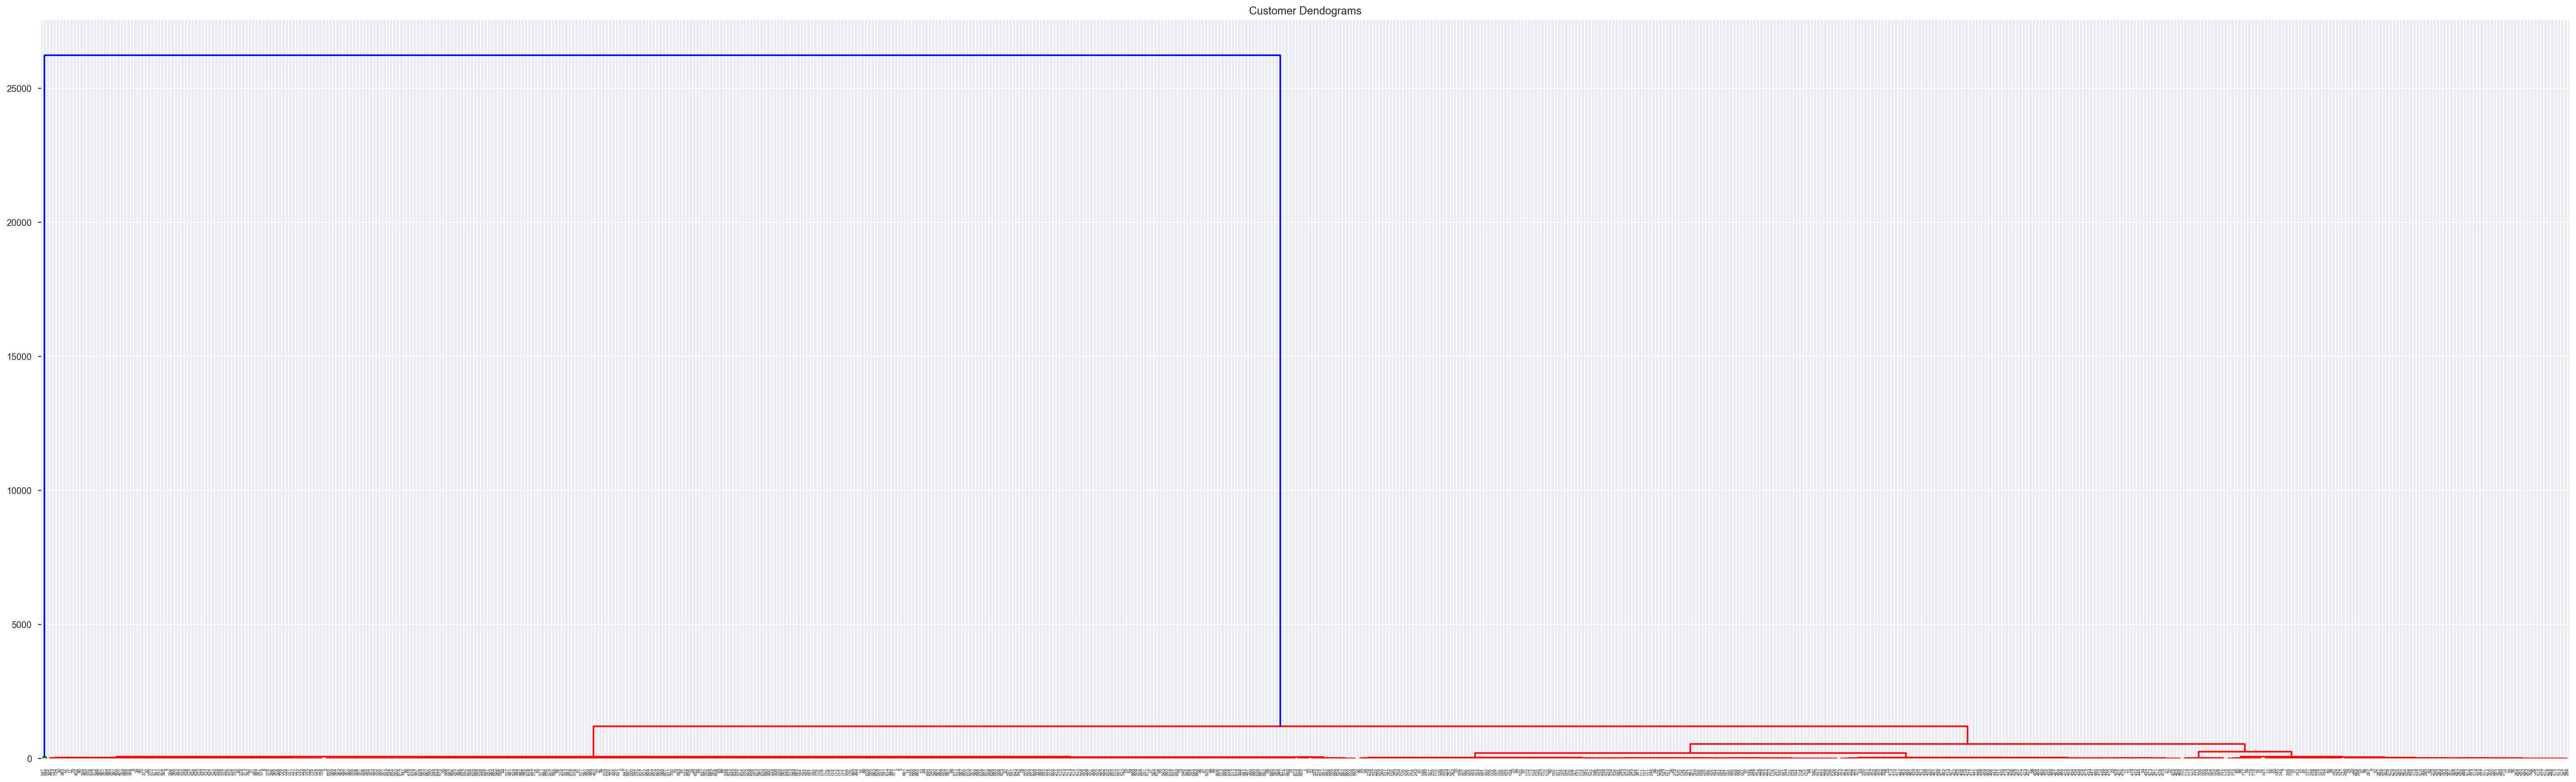

In [100]:
# Hierarchical clustering 예시2 (실제 data로 응용하는 법)
import scipy.cluster.hierarchy as shc
data = df.iloc[:, 4:-2].values    # iloc 의미, 전체 row와 3~4번째 column의 값을 nparray 형식으로 반환

plt.figure(figsize=(50, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))    # dendrogram에서 적정 군집 수를 파악하고

In [106]:
data = df.iloc[:, 4:-2].values    # iloc 의미, 전체 row와 3~4번째 column의 값을 nparray 형식으로 반환

In [111]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')    # 그 군집 수를 적용시켜줌
cluster.fit_predict(data)
df['Clusters_5'] = cluster.labels_

In [113]:
df.groupby(['Clusters_3','브랜드'])[['브랜드']].count()

브랜드
Clusters_3 브랜드           
0          돌배기집        24
           백스비어        11
           본가          13
           한신포차        67
1          미정국수0410    15
           빽다방        308
           역전우동0410    67
2          새마을식당       87
           원조쌈밥집       15
           홍콩반점0410+  144

In [114]:
df.groupby(['Clusters_4','브랜드'])[['브랜드']].count()

브랜드
Clusters_4 브랜드           
0          새마을식당       87
           원조쌈밥집       15
           홍콩반점0410+  144
1          미정국수0410    15
           빽다방        308
           역전우동0410    67
2          돌배기집        24
           백스비어        11
           한신포차        67
3          본가          13

In [115]:
df.groupby(['Clusters_5','브랜드'])[['브랜드']].count()

브랜드
Clusters_5 브랜드           
0          미정국수0410    15
           빽다방        308
           역전우동0410    67
1          새마을식당       87
           원조쌈밥집       15
2          돌배기집        24
           백스비어        11
           한신포차        67
3          본가          13
4          홍콩반점0410+  144

In [90]:
df.head()

,주소,브랜드,지역,매장명,좌석수,distance,주거/직장인,Clusters_4,Clusters_3
0,서울특별시 중랑구 면목로 330-1 1층,빽다방,서울특별시,사가정역점,16.708333,0.06670,2.259892,2,2
1,경기도 김포시 통진읍 조강로 39,빽다방,경기도,김포통진마송점,16.708333,13.00699,1.308804,2,2
2,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,16.708333,0.11225,5.866737,2,2
3,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,16.708333,0.11225,5.866737,2,2
4,서울시 송파구 송파대로 111 파크하비오 202동 131호,역전우동0410,서울특별시,장지역하비오점,22.954545,0.42986,1.661666,2,2


In [95]:
data=df.groupby(['Clusters_4','브랜드'])['브랜드'].count().unstack()
temp=df.groupby('브랜드')['브랜드'].count()

print(data.iloc[0] / temp, data.iloc[1] / temp, data.iloc[2] / temp)

브랜드
돌배기집         1.0
미정국수0410     NaN
백스비어         1.0
본가           1.0
빽다방          NaN
새마을식당        NaN
역전우동0410     NaN
원조쌈밥집        NaN
한신포차         1.0
홍콩반점0410+    NaN
dtype: float64 브랜드
돌배기집              NaN
미정국수0410          NaN
백스비어              NaN
본가                NaN
빽다방               NaN
새마을식당        1.000000
역전우동0410          NaN
원조쌈밥집        1.000000
한신포차              NaN
홍콩반점0410+    0.993056
dtype: float64 브랜드
돌배기집              NaN
미정국수0410     1.000000
백스비어              NaN
본가                NaN
빽다방          0.996753
새마을식당             NaN
역전우동0410     1.000000
원조쌈밥집             NaN
한신포차              NaN
홍콩반점0410+         NaN
dtype: float64


In [120]:
df.to_csv("끝!.csv")

## 각 클러스터별 column 특징

In [2]:
df = pd.read_csv("자료들 모음/끝!.csv", index_col=[0])

In [3]:
df

,주소,브랜드,지역,매장명,좌석수,distance,주거/직장인,Clusters_3,Clusters_4,Clusters_5
0,서울특별시 중랑구 면목로 330-1 1층,빽다방,서울특별시,사가정역점,16.708333,0.06670,2.259892,1,1,0
1,경기도 김포시 통진읍 조강로 39,빽다방,경기도,김포통진마송점,16.708333,13.00699,1.308804,1,1,0
2,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,16.708333,0.11225,5.866737,1,1,0
3,인천광역시 계양구 장제로 885-1,빽다방,인천광역시,인천임학역점,16.708333,0.11225,5.866737,1,1,0
4,서울시 송파구 송파대로 111 파크하비오 202동 131호,역전우동0410,서울특별시,장지역하비오점,22.954545,0.42986,1.661666,1,1,0
...,...,...,...,...,...,...,...,...,...,...
810,"경기도 수원시 팔달구 권광로 188번길 35, 1층",돌배기집,경기도,수원나혜석거리점,95.473684,0.45179,1.006335,0,2,2
811,"경기도 평택시 비전5로 21, 2층 (평택 소사벌 메가박스 인근 위치)",돌배기집,경기도,평택소사벌점,95.473684,2.72764,0.924023,0,2,2
812,서울시 송파구 백제고분로7길 42,돌배기집,서울특별시,잠실신천점,95.473684,0.26346,1.661666,0,2,2
813,경기도 고양시 일산서구 일현로 37,돌배기집,경기도,일산탄현역점,95.473684,1.16639,4.184863,0,2,2


In [4]:
df.groupby(['Clusters_4','브랜드'])[['브랜드']].count()

브랜드
Clusters_4 브랜드           
0          새마을식당       87
           원조쌈밥집       15
           홍콩반점0410+  144
1          미정국수0410    15
           빽다방        308
           역전우동0410    67
2          돌배기집        24
           백스비어        11
           한신포차        67
3          본가          13

In [53]:
df.groupby('Clusters_4')[['좌석수','distance','주거/직장인']].median()

,좌석수,distance,주거/직장인
Clusters_4,,,
0,58.166667,0.29222,2.008775
1,16.708333,0.28385,2.008775
2,103.523810,0.33232,1.972822
3,156.000000,0.65426,1.314324


In [54]:
df['좌석수'].median(), df['distance'].median(), df['주거/직장인'].median()

(22.954545, 0.29336, 1.977395825810645)

### 좌석수
- Cluster_0: 평균보다 2배 가량 좌석수가 많음
- **Cluster_1: 평균보다 좌석수가 적음. 가볍게 음식을 먹는 공간 혹은 빠른 회전율을 목표로 함**
- Cluster_2: 평균보다 4배 이상 좌석수가 많음
- Cluster_3: 평균보다 6배 가량 좌석수가 많음

### 지하철 역과의 거리
- Cluster_0: 300m 내외로 비교적 지하철 역 주변에 위치
- **Cluster_1: 유일하게 평균보다 낮음. 지하철 역 주변 유동인구를 타겟고객으로 하며**
- Cluster_2: 300m 내외로 비교적 지하철 역 주변에 위치
- Cluster_3: 다른 군집과는 다르게 지하철 역에서 비교적 멀리 떨어져있는 경향을 보임

### 주거/직장인
- Cluster_0: 평균과 뚜렷한 차이를 보이지 않음
- Cluster_1: 평균과 뚜렷한 차이를 보이지 않음
- Cluster_2: 평균과 뚜렷한 차이를 보이지 않음
- **Cluster_3: 다른 군집에 비해서 현격하게 떨어짐. 유동인구가 많은 곳을 대상으로 하지 않고 전반적으로 주거지역 주변에 위치한다는 것을 알 수 있음.**